## python programming language

In [0]:
df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/fight_data.csv")

In [0]:
df1.show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|    1|
|       United States|            Ireland|  264|
|       United States|              India|   69|
|               Egypt|      United States|   24|
|   Equatorial Guinea|      United States|    1|
|       United States|          Singapore|   25|
|       United States|            Grenada|   54|
|          Costa Rica|      United States|  477|
|             Senegal|      United States|   29|
|       United States|   Marshall Islands|   44|
|              Guyana|      United States|   17|
|       United States|       Sint Maarten|   53|
|               Malta|      United States|    1|
|             Bolivia|      United States|   46|
|            Anguilla|      United States|   21|
|Turks and Caicos ...|      United States|  136|
|       United States|        Afghanistan|    2|
|Saint Vincent and..

#**Read modes in spark**

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
flight = spark.read.format("csv")\
        .option("header","false")\
        .option("inferschema","false")\
        .option("mode","FAILFAST")\
        .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/fight_data.csv")


flight.show(5)

+-----------------+-------------------+-----+
|              _c0|                _c1|  _c2|
+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
|    United States|            Romania|    1|
|    United States|            Ireland|  264|
|    United States|              India|   69|
|            Egypt|      United States|   24|
+-----------------+-------------------+-----+
only showing top 5 rows



In [0]:
flight.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)



In [0]:
flight_df = spark.read.format("csv")\
        .option("header","true")\
        .option("inferschema","false")\
        .option("mode","FAILFAST")\
        .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/fight_data.csv")


flight_df.show(5)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|    1|
|    United States|            Ireland|  264|
|    United States|              India|   69|
|            Egypt|      United States|   24|
|Equatorial Guinea|      United States|    1|
+-----------------+-------------------+-----+
only showing top 5 rows



In [0]:
flight_df.printSchema()

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- count: string (nullable = true)



In [0]:
flight_df_schema = spark.read.format("csv")\
        .option("header","true")\
        .option("inferschema","true")\
        .option("mode","FAILFAST")\
        .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/fight_data.csv")


flight_df_schema.show(5)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|    1|
|    United States|            Ireland|  264|
|    United States|              India|   69|
|            Egypt|      United States|   24|
|Equatorial Guinea|      United States|    1|
+-----------------+-------------------+-----+
only showing top 5 rows



In [0]:
flight_df_schema.printSchema()

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- count: integer (nullable = true)



## scala programming language

In [0]:
%scala
import org.apache.spark.sql.SparkSession

// Initialize Spark session
val spark = SparkSession.builder()
  .appName("Flight Data")
  .getOrCreate()

// Read the CSV file with specified options
val flight_df_scala = spark.read.format("csv")
  .option("header", "true")
  .option("inferSchema", "true")
  .option("mode", "FAILFAST")
  .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/fight_data.csv")

// Show the first 5 rows of the DataFrame
flight_df_scala.show(5)

+-----------------+-------------------+-----+
DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
 United States| Romania| 1|
 United States| Ireland| 264|
 United States| India| 69|
 Egypt| United States| 24|
Equatorial Guinea| United States| 1|
+-----------------+-------------------+-----+
only showing top 5 rows

import org.apache.spark.sql.SparkSession
spark: org.apache.spark.sql.SparkSession = org.apache.spark.sql.SparkSession@5ae2dedf
flight_df_scala: org.apache.spark.sql.DataFrame = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]

In [0]:
%scala
flight_df_scala.printSchema()

root
-- DEST_COUNTRY_NAME: string (nullable = true)
-- ORIGIN_COUNTRY_NAME: string (nullable = true)
-- count: integer (nullable = true)

## schema in spark with Python 

In [0]:
flight_my_schema = spark.read.format("csv")\
        .option("header","true")\
        .option("inferschema","false")\
        .schema(my_schema)\
        .option("mode","FAILFAST")\
        .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/fight_data.csv")


flight_my_schema.show(5)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|    1|
|    United States|            Ireland|  264|
|    United States|              India|   69|
|            Egypt|      United States|   24|
|Equatorial Guinea|      United States|    1|
+-----------------+-------------------+-----+
only showing top 5 rows



In [0]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType 

# Define the schema
my_schema = StructType([
    StructField("DEST_COUNTRY_NAME", StringType(), True),
    StructField("ORIGIN_COUNTRY_NAME", StringType(), True),
    StructField("count", IntegerType(), True)
])


###########################
flight_my_schema = spark.read.format("csv")\
        .option("header","true")\
        .option("inferschema","false")\
        .schema(my_schema)\
        .option("mode","FAILFAST")\
        .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/fight_data.csv")


flight_my_schema.show(5)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|    1|
|    United States|            Ireland|  264|
|    United States|              India|   69|
|            Egypt|      United States|   24|
|Equatorial Guinea|      United States|    1|
+-----------------+-------------------+-----+
only showing top 5 rows



## drop the index column with python


In [0]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
from pyspark.sql.functions import col, monotonically_increasing_id

# Define the schema
my_schema = StructType([
    StructField("DEST_COUNTRY_NAME", StringType(), True),
    StructField("ORIGIN_COUNTRY_NAME", StringType(), True),
    StructField("count", IntegerType(), True)
])

# Load the CSV file using the schema
flight_my_schema = spark.read.format("csv")\
    .option("header", "true")\
    .option("inferschema", "false")\
    .schema(my_schema)\
    .option("mode", "FAILFAST")\
    .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/fight_data.csv")

# Show the first 5 rows of the original data
print("Original Data:")
flight_my_schema.show(5, truncate=False)

# Add an index column
indexed = flight_my_schema.withColumn("index", monotonically_increasing_id())

# Filter out the first two rows (index > 1) and drop the index column
filtered = indexed.filter(col("index") > 1).drop("index")

# Show the filtered data
print("Filtered Data:")
filtered.show(5, truncate=False)


Original Data:
+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|United States    |Romania            |1    |
|United States    |Ireland            |264  |
|United States    |India              |69   |
|Egypt            |United States      |24   |
|Equatorial Guinea|United States      |1    |
+-----------------+-------------------+-----+
only showing top 5 rows

Filtered Data:
+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|United States    |India              |69   |
|Egypt            |United States      |24   |
|Equatorial Guinea|United States      |1    |
|United States    |Singapore          |25   |
|United States    |Grenada            |54   |
+-----------------+-------------------+-----+
only showing top 5 rows



## schema in spark with Scala

In [0]:
%scala
import org.apache.spark.sql.SparkSession
import org.apache.spark.sql.types.{StructType, StructField, StringType, IntegerType}

// Initialize Spark session
val spark = SparkSession.builder()
  .appName("Flight Data")
  .getOrCreate()

// Define the schema
val mySchema = StructType(Array(
    StructField("DEST_COUNTRY_NAME", StringType, true),
    StructField("ORIGIN_COUNTRY_NAME", StringType, true),
    StructField("count", IntegerType, true)
))

// Read the CSV file with the defined schema
  val flightData = spark.read.format("csv")
    .option("header", "true") // Use the first row as the header
    .option("inferSchema", "false") // Do not infer schema
    .schema(mySchema) // Use the defined schema
    .option("mode", "FAILFAST") // Fail fast on any read errors
    .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/fight_data.csv")

  // Show the first 5 rows of the DataFrame
  flightData.show(5)

+-----------------+-------------------+-----+
DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
 United States| Romania| 1|
 United States| Ireland| 264|
 United States| India| 69|
 Egypt| United States| 24|
Equatorial Guinea| United States| 1|
+-----------------+-------------------+-----+
only showing top 5 rows

import org.apache.spark.sql.SparkSession
import org.apache.spark.sql.types.{StructType, StructField, StringType, IntegerType}
spark: org.apache.spark.sql.SparkSession = org.apache.spark.sql.SparkSession@70c95251
mySchema: org.apache.spark.sql.types.StructType = StructType(StructField(DEST_COUNTRY_NAME,StringType,true),StructField(ORIGIN_COUNTRY_NAME,StringType,true),StructField(count,IntegerType,true))
flightData: org.apache.spark.sql.DataFrame = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]

## drop the index with scala 

In [0]:
%scala
import org.apache.spark.sql.SparkSession
import org.apache.spark.sql.types.{StructType, StructField, StringType, IntegerType}
import org.apache.spark.sql.functions.{col, monotonicallyIncreasingId}

// Initialize Spark session
val spark = SparkSession.builder()
  .appName("Flight Data")
  .getOrCreate()

import spark.implicits._ // Import implicits for DataFrame conversions

// Define the schema
val mySchema = StructType(Array(
  StructField("DEST_COUNTRY_NAME", StringType, true),
  StructField("ORIGIN_COUNTRY_NAME", StringType, true),
  StructField("count", IntegerType, true)
))

// Read the CSV file with the defined schema
val flightData = spark.read.format("csv")
  .option("header", "true") // Use the first row as the header
  .option("inferSchema", "false") // Do not infer schema
  .option("delimiter", ",") // Set delimiter
  .option("quote", "\"") // Handle quoted strings
  .schema(mySchema) // Use the defined schema
  .option("mode", "PERMISSIVE") // Allow for partial errors
  .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/fight_data.csv")

// Show the first 5 rows of the original data
println("Original Data:")
flightData.show(5, truncate = false)

// Add an index column
val indexed = flightData.withColumn("index", monotonicallyIncreasingId())

// Filter out the first two rows (index > 2) and drop the index column
val filtered = indexed.filter(col("index") > 1).drop("index")

// Show the filtered data
println("Filtered Data:")
filtered.show(5, false)

Original Data:
+-----------------+-------------------+-----+
DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
United States |Romania |1 |
United States |Ireland |264 |
United States |India |69 |
Egypt |United States |24 |
Equatorial Guinea|United States |1 |
+-----------------+-------------------+-----+
only showing top 5 rows

Filtered Data:
+-----------------+-------------------+-----+
DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
United States |India |69 |
Egypt |United States |24 |
Equatorial Guinea|United States |1 |
United States |Singapore |25 |
United States |Grenada |54 |
+-----------------+-------------------+-----+
only showing top 5 rows

command-1438412362699132:34: warning: method monotonicallyIncreasingId in object functions is deprecated (since 2.0.0): Use monotonically_increasing_id()
val indexed = flightData.withColumn("index", monotonicallyIncreasingId())
 ^
import org.apache.spark.sql.SparkSession
import org.apache.spark.sql.types.{StructType, StructField, StringType, IntegerType}
import org.apache.spark.sql.functions.{col, monotonicallyIncreasingId}
spark: org.apache.spark.sql.SparkSession = org.apache.spark.sql.SparkSession@70c95251
import spark.implicits._
mySchema: org.apache.spark.sql.types.StructType = StructType(StructField(DEST_COUNTRY_NAME,StringType,true),StructField(ORIGIN_COUNTRY_NAME,StringType,true),StructField(count,IntegerType,true))
flightData: org.apache.spark.sql.DataFrame = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]
indexed: org.apache.spark.sql.DataFrame = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 2 more fields]
filtered: org.apache.spark.sql.DataFrame = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]

In [0]:
%scala
print("hello")
print("hi")

hellohi

In [0]:
%scala
println("hello")
println("hi")

hello
hi

In [0]:
%scala
import org.apache.spark.sql.SparkSession
import org.apache.spark.sql.types.{StructType, StructField, StringType, IntegerType}

object FlightDataApp {
  def main(args: Array[String]): Unit = {
    // Initialize Spark session
    val spark = SparkSession.builder()
      .appName("Flight Data")
      .master("local[*]") // Use all available cores locally
      .getOrCreate()

    // Define the schema
    val mySchema = StructType(Array(
      StructField("DEST_COUNTRY_NAME", StringType, true),
      StructField("ORIGIN_COUNTRY_NAME", StringType, true),
      StructField("count", IntegerType, true)
    ))

    // Read the CSV file with the defined schema
    val flightData = spark.read.format("csv")
      .option("header", "true") // Use the first row as the header
      .option("inferSchema", "false") // Do not infer schema
      .schema(mySchema) // Use the defined schema
      .option("mode", "FAILFAST") // Fail fast on any read errors
      .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/fight_data.csv")

    // Show the first 5 rows of the DataFrame
    flightData.show(5)

    // Stop the Spark session
    spark.stop()
  }
}


import org.apache.spark.sql.SparkSession
import org.apache.spark.sql.types.{StructType, StructField, StringType, IntegerType}
defined object FlightDataApp

## Handling corrupted records in python


In [0]:
# df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/employee.csv")

In [0]:
employee_df = spark.read.format("csv")\
        .option("header","true")\
        .option("inferschema","true")\
        .option("mode","PERMISSIVE")\
        .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/employee.csv")


employee_df.show(5)

+---+--------+---+------+------------+--------+
| id|    name|age|salary|     address| nominee|
+---+--------+---+------+------------+--------+
|  1|  Manish| 26| 75000|       bihar|nominee1|
|  2|  Nikita| 23|100000|uttarpradesh|nominee2|
|  3|  Pritam| 22|150000|   Bangalore|   India|
|  4|Prantosh| 17|200000|     Kolkata|   India|
|  5|  Vikash| 31|300000|        null|nominee5|
+---+--------+---+------+------------+--------+



In [0]:
employee_df = spark.read.format("csv")\
        .option("header","true")\
        .option("inferschema","true")\
        .option("mode","DROPMALFORMED")\
        .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/employee.csv")


employee_df.show(5)

+---+------+---+------+------------+--------+
| id|  name|age|salary|     address| nominee|
+---+------+---+------+------------+--------+
|  1|Manish| 26| 75000|       bihar|nominee1|
|  2|Nikita| 23|100000|uttarpradesh|nominee2|
|  5|Vikash| 31|300000|        null|nominee5|
+---+------+---+------+------------+--------+



In [0]:
employee_df = spark.read.format("csv")\
        .option("header","true")\
        .option("inferschema","true")\
        .option("mode","FAILFAST")\
        .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/employee.csv")


employee_df.show(5)

---------------------------------------------------------------------------
Py4JJavaError                             Traceback (most recent call last)
File <command-1438412362699140>:8
      1 employee_df = spark.read.format("csv")\
      2         .option("header","true")\
      3         .option("inferschema","true")\
      4         .option("mode","FAILFAST")\
      5         .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/employee.csv")
----> 8 employee_df.show(5)

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     46 start = time.perf_counter()
     47 try:
---> 48     res = func(*args, **kwargs)
     49     logger.log_success(
     50         module_name, class_name, function_name, time.perf_counter() - start, signature
     51     )
     52     return res

File /databricks/spark/python/pyspark/sql/dataframe.py:920, in DataFrame.show(self, n, truncate, vertical)
    914     raise PySparkTy

In [0]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType



emp_schema = StructType(
                [
                    StructField("id",IntegerType(),True),
                    StructField("name",StringType(),True),
                    StructField("age",IntegerType(),True),
                    StructField("salary",IntegerType(),True),
                    StructField("address",StringType(),True),
                    StructField("nominee",StringType(),True),
                    StructField("_corrupt_record",StringType(),True)
                ])

In [0]:
employee_df = spark.read.format("csv")\
        .option("header","true")\
        .option("inferschema","true")\
        .option("mode","PERMISSIVE")\
        .schema(emp_schema)\
        .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/employee.csv")


employee_df.show(truncate = False)

+---+--------+---+------+------------+--------+-------------------------------------------+
|id |name    |age|salary|address     |nominee |_corrupt_record                            |
+---+--------+---+------+------------+--------+-------------------------------------------+
|1  |Manish  |26 |75000 |bihar       |nominee1|null                                       |
|2  |Nikita  |23 |100000|uttarpradesh|nominee2|null                                       |
|3  |Pritam  |22 |150000|Bangalore   |India   |3,Pritam,22,150000,Bangalore,India,nominee3|
|4  |Prantosh|17 |200000|Kolkata     |India   |4,Prantosh,17,200000,Kolkata,India,nominee4|
|5  |Vikash  |31 |300000|null        |nominee5|null                                       |
+---+--------+---+------+------------+--------+-------------------------------------------+



In [0]:
employee_df = spark.read.format("csv")\
        .option("header","true")\
        .option("inferschema","true")\
        .schema(emp_schema)\
        .option("badRecordsPath","dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/bad_recods")\
        .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/employee.csv")


employee_df.show(truncate = False)

+---+------+---+------+------------+--------+---------------+
|id |name  |age|salary|address     |nominee |_corrupt_record|
+---+------+---+------+------------+--------+---------------+
|1  |Manish|26 |75000 |bihar       |nominee1|null           |
|2  |Nikita|23 |100000|uttarpradesh|nominee2|null           |
|5  |Vikash|31 |300000|null        |nominee5|null           |
+---+------+---+------+------------+--------+---------------+



In [0]:
%fs
ls dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/

path,name,size,modificationTime
dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/employee.csv,employee.csv,230,1734016275000
dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/fight_data.csv,fight_data.csv,7375,1733994693000


In [0]:
%fs
ls dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/

path,name,size,modificationTime
dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/bad_recods/,bad_recods/,0,0
dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/employee.csv,employee.csv,230,1734016275000
dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/fight_data.csv,fight_data.csv,7375,1733994693000


In [0]:
%fs
ls dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/bad_recods

path,name,size,modificationTime
dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/bad_recods/20241212T153958/,20241212T153958/,0,0


#Handling corrupted records in Scala

In [0]:
%scala
// Import necessary Spark libraries
import org.apache.spark.sql.SparkSession

// Initialize SparkSession
val spark = SparkSession.builder()
  .appName("Employee Data")
  .getOrCreate()

// Read the CSV file into a DataFrame
val employee_df = spark.read
  .format("csv")
  .option("header", "true")         // File has a header row
  .option("inferSchema", "true")    // Infer schema automatically
  .option("mode", "PERMISSIVE")     // Handle corrupted records permissively
  .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/employee.csv")

// Display the first 5 rows of the DataFrame
employee_df.show(5)


+---+--------+---+------+------------+--------+
 id| name|age|salary| address| nominee|
+---+--------+---+------+------------+--------+
 1| Manish| 26| 75000| bihar|nominee1|
 2| Nikita| 23|100000|uttarpradesh|nominee2|
 3| Pritam| 22|150000| Bangalore| India|
 4|Prantosh| 17|200000| Kolkata| India|
 5| Vikash| 31|300000| null|nominee5|
+---+--------+---+------+------------+--------+

import org.apache.spark.sql.SparkSession
spark: org.apache.spark.sql.SparkSession = org.apache.spark.sql.SparkSession@2d382cb4
employee_df: org.apache.spark.sql.DataFrame = [id: int, name: string ... 4 more fields]

In [0]:
%scala
// Import necessary Spark libraries
import org.apache.spark.sql.SparkSession

// Initialize SparkSession
val spark = SparkSession.builder()
  .appName("Employee Data")
  .getOrCreate()

// Read the CSV file into a DataFrame
val employee_df = spark.read
  .format("csv")
  .option("header", "true")         // File has a header row
  .option("inferSchema", "true")    // Infer schema automatically
  .option("mode", "DROPMALFORMED")  // Drop malformed records
  .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/employee.csv")

// Display the first 5 rows of the DataFrame
employee_df.show(5)


+---+------+---+------+------------+--------+
 id| name|age|salary| address| nominee|
+---+------+---+------+------------+--------+
 1|Manish| 26| 75000| bihar|nominee1|
 2|Nikita| 23|100000|uttarpradesh|nominee2|
 5|Vikash| 31|300000| null|nominee5|
+---+------+---+------+------------+--------+

import org.apache.spark.sql.SparkSession
spark: org.apache.spark.sql.SparkSession = org.apache.spark.sql.SparkSession@2d382cb4
employee_df: org.apache.spark.sql.DataFrame = [id: int, name: string ... 4 more fields]

In [0]:
%scala
import org.apache.spark.sql.types._

// Define the schema using StructType
val emp_schema = StructType(
  Array(
    StructField("id", IntegerType, true),
    StructField("name", StringType, true),
    StructField("age", IntegerType, true),
    StructField("salary", IntegerType, true),
    StructField("address", StringType, true),
    StructField("nominee", StringType, true),
    StructField("_corrupt_record", StringType, true)
  )
)

emp_schema.printTreeString()


root
-- id: integer (nullable = true)
-- name: string (nullable = true)
-- age: integer (nullable = true)
-- salary: integer (nullable = true)
-- address: string (nullable = true)
-- nominee: string (nullable = true)
-- _corrupt_record: string (nullable = true)

import org.apache.spark.sql.types._
emp_schema: org.apache.spark.sql.types.StructType = StructType(StructField(id,IntegerType,true),StructField(name,StringType,true),StructField(age,IntegerType,true),StructField(salary,IntegerType,true),StructField(address,StringType,true),StructField(nominee,StringType,true),StructField(_corrupt_record,StringType,true))

## how to read json file in python


**df1 = spark.read.format("json").load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/single_file.json")
df2 = spark.read.format("json").load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/Multi_line_incorrect.json")
df3 = spark.read.format("json").load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/Multi_line_correct.json")
df4 = spark.read.format("json").load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/line_delimited.json")
df5 = spark.read.format("json").load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/corrupted.json")**

#line_delimited.json

In [0]:
spark.read.format("json")\
                .option("inferschema","true")\
                .option("mode","PERMISSIVE")\
                .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/line_delimited.json").show()

+---+--------+------+
|age|    name|salary|
+---+--------+------+
| 20|  Manish| 20000|
| 25|  Nikita| 21000|
| 16|  Pritam| 22000|
| 35|Prantosh| 25000|
| 67|  Vikash| 40000|
+---+--------+------+



In [0]:
spark.read.format("json")\
                .option("inferschema","true")\
                .option("mode","PERMISSIVE")\
                .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/single_file.json").show()

+---+------+--------+------+
|age|gender|    name|salary|
+---+------+--------+------+
| 20|  null|  Manish| 20000|
| 25|  null|  Nikita| 21000|
| 16|  null|  Pritam| 22000|
| 35|  null|Prantosh| 25000|
| 67|     M|  Vikash| 40000|
+---+------+--------+------+



In [0]:
spark.read.format("json")\
                .option("inferschema","true")\
                .option("mode","PERMISSIVE")\
                .option("multiline","True")\
                .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/Multi_line_correct.json").show()

+---+--------+------+
|age|    name|salary|
+---+--------+------+
| 20|  Manish| 20000|
| 25|  Nikita| 21000|
| 16|  Pritam| 22000|
| 35|Prantosh| 25000|
| 67|  Vikash| 40000|
+---+--------+------+



In [0]:
spark.read.format("json")\
                .option("inferschema","true")\
                .option("mode","PERMISSIVE")\
                .option("multiline","True")\
                .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/Multi_line_incorrect.json").show()

+---+------+------+
|age|  name|salary|
+---+------+------+
| 20|Manish| 20000|
+---+------+------+



In [0]:
spark.read.format("json")\
                .option("inferschema","true")\
                .option("mode","PERMISSIVE")\
                .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/corrupted.json").show(truncate = False)

+----------------------------------------+----+--------+------+
|_corrupt_record                         |age |name    |salary|
+----------------------------------------+----+--------+------+
|null                                    |20  |Manish  |20000 |
|null                                    |25  |Nikita  |21000 |
|null                                    |16  |Pritam  |22000 |
|null                                    |35  |Prantosh|25000 |
|{"name":"Vikash","age":67,"salary":40000|null|null    |null  |
+----------------------------------------+----+--------+------+



**df1 = spark.read.format("json").load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/file5.json")**

In [0]:
# this is Multiline json format
spark.read.format("json")\
                .option("inferschema","true")\
                .option("mode","PERMISSIVE")\
                .option("multiline","True")\
                .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/file5.json").show()

+----+-------+--------------------+-------------+-------------+-------------+------+
|code|message|         restaurants|results_found|results_shown|results_start|status|
+----+-------+--------------------+-------------+-------------+-------------+------+
|null|   null|                  []|            0|            0|            1|  null|
|null|   null|[{{{17066603}, b9...|         6835|           20|            1|  null|
|null|   null|                  []|            0|            0|            1|  null|
|null|   null|                  []|            0|            0|            1|  null|
|null|   null|[{{{17093124}, b9...|         8680|           20|            1|  null|
|null|   null|                  []|            0|            0|            1|  null|
|null|   null|                  []|            0|            0|            1|  null|
|null|   null|[{{{17580142}, b9...|          943|           20|            1|  null|
|null|   null|                  []|            0|            0|  

**df1 = spark.read.format("json").load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/file6.json")**

In [0]:
spark.read.format("json")\
                .option("inferschema","true")\
                .option("mode","PERMISSIVE")\
                .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/file6.json").show()

+----+-------+--------------------+-------------+-------------+-------------+------+
|code|message|         restaurants|results_found|results_shown|results_start|status|
+----+-------+--------------------+-------------+-------------+-------------+------+
|null|   null|                  []|            0|            0|            1|  null|
|null|   null|[{{{17066603}, b9...|         6835|           20|            1|  null|
|null|   null|                  []|            0|            0|            1|  null|
|null|   null|                  []|            0|            0|            1|  null|
|null|   null|[{{{17093124}, b9...|         8680|           20|            1|  null|
|null|   null|                  []|            0|            0|            1|  null|
|null|   null|                  []|            0|            0|            1|  null|
|null|   null|[{{{17580142}, b9...|          943|           20|            1|  null|
|null|   null|                  []|            0|            0|  

In [0]:
spark.read.format("json")\
                .option("inferschema","true")\
                .option("mode","PERMISSIVE")\
                .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/file6.json").printSchema()

root
 |-- code: long (nullable = true)
 |-- message: string (nullable = true)
 |-- restaurants: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- restaurant: struct (nullable = true)
 |    |    |    |-- R: struct (nullable = true)
 |    |    |    |    |-- res_id: long (nullable = true)
 |    |    |    |-- apikey: string (nullable = true)
 |    |    |    |-- average_cost_for_two: long (nullable = true)
 |    |    |    |-- cuisines: string (nullable = true)
 |    |    |    |-- currency: string (nullable = true)
 |    |    |    |-- deeplink: string (nullable = true)
 |    |    |    |-- establishment_types: array (nullable = true)
 |    |    |    |    |-- element: string (containsNull = true)
 |    |    |    |-- events_url: string (nullable = true)
 |    |    |    |-- featured_image: string (nullable = true)
 |    |    |    |-- has_online_delivery: long (nullable = true)
 |    |    |    |-- has_table_booking: long (nullable = true)
 |    |    |    |-- i

## what is Apache Parquet file with python

**dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/part_r_00000_1a9822ba_b8fb_4d8e_844a_ea30d0801b9e_gz.parquet**

In [0]:
df = spark.read.parquet("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/part_r_00000_1a9822ba_b8fb_4d8e_844a_ea30d0801b9e_gz.parquet")

df.show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|    1|
|       United States|            Ireland|  264|
|       United States|              India|   69|
|               Egypt|      United States|   24|
|   Equatorial Guinea|      United States|    1|
|       United States|          Singapore|   25|
|       United States|            Grenada|   54|
|          Costa Rica|      United States|  477|
|             Senegal|      United States|   29|
|       United States|   Marshall Islands|   44|
|              Guyana|      United States|   17|
|       United States|       Sint Maarten|   53|
|               Malta|      United States|    1|
|             Bolivia|      United States|   46|
|            Anguilla|      United States|   21|
|Turks and Caicos ...|      United States|  136|
|       United States|        Afghanistan|    2|
|Saint Vincent and..

#what is Apache Parquet file with Scala

In [0]:
%scala
// Read the Parquet file
val df = spark.read.parquet("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/part_r_00000_1a9822ba_b8fb_4d8e_844a_ea30d0801b9e_gz.parquet")

// Display the DataFrame
df.show()


+--------------------+-------------------+-----+
 DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
 United States| Romania| 1|
 United States| Ireland| 264|
 United States| India| 69|
 Egypt| United States| 24|
 Equatorial Guinea| United States| 1|
 United States| Singapore| 25|
 United States| Grenada| 54|
 Costa Rica| United States| 477|
 Senegal| United States| 29|
 United States| Marshall Islands| 44|
 Guyana| United States| 17|
 United States| Sint Maarten| 53|
 Malta| United States| 1|
 Bolivia| United States| 46|
 Anguilla| United States| 21|
Turks and Caicos ...| United States| 136|
 United States| Afghanistan| 2|
Saint Vincent and...| United States| 1|
 Italy| United States| 390|
 United States| Russia| 156|
+--------------------+-------------------+-----+
only showing top 20 rows

df: org.apache.spark.sql.DataFrame = [DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string ... 1 more field]

#**How to write dataframe to disk in python**

In [0]:
df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/len_8.csv")
df1.show()

+---+----------+--------+---------+----------+-----------+
| id|      name|     age|   salary|   address|     gender|
+---+----------+--------+---------+----------+-----------+
|  1|    Manish|      26|    75000|     INDIA|          m|
|  2|    Nikita|      23|   100000|       USA|          f|
|  3|    Pritam|      22|   150000|     INDIA|          m|
|  4|  Prantosh|      17|   200000|     JAPAN|          m|
|  5|    Vikash|      31|   300000|       USA|          m|
|  6|     Rahul|      55|   300000|     INDIA|          m|
|  7|      Raju|      67|   540000|       USA|          m|
|  8|   Praveen|      28|    70000|     JAPAN|          m|
|  9|       Dev|      32|   150000|     JAPAN|          m|
| 10|    Sherin|      16|    25000|    RUSSIA|          f|
| 11|      Ragu|      12|    35000|     INDIA|          f|
| 12|     Sweta|      43|   200000|     INDIA|          f|
| 13|   Raushan|      48|   650000|       USA|          m|
| 14|    Mukesh|      36|    95000|    RUSSIA|          

In [0]:
df1.write.format("csv")\
          .option("header","true")\
          .option("mode","overwrite")\
          .option("path","dbfs:/FileStore/shared_uploads/     mechinelearningai@gmail.com/csv_write/")\
            .save()

In [0]:
dbutils.fs.ls("dbfs:/FileStore/shared_uploads/     mechinelearningai@gmail.com/csv_write/")

Out[6]: [FileInfo(path='dbfs:/FileStore/shared_uploads/     mechinelearningai@gmail.com/csv_write/_SUCCESS', name='_SUCCESS', size=0, modificationTime=1734193759000),
 FileInfo(path='dbfs:/FileStore/shared_uploads/     mechinelearningai@gmail.com/csv_write/_committed_4859565657023037198', name='_committed_4859565657023037198', size=111, modificationTime=1734193759000),
 FileInfo(path='dbfs:/FileStore/shared_uploads/     mechinelearningai@gmail.com/csv_write/_started_4859565657023037198', name='_started_4859565657023037198', size=0, modificationTime=1734193758000),
 FileInfo(path='dbfs:/FileStore/shared_uploads/     mechinelearningai@gmail.com/csv_write/part-00000-tid-4859565657023037198-a31b5ab9-5a66-4d23-8714-9b3256ed68ae-3-1-c000.csv', name='part-00000-tid-4859565657023037198-a31b5ab9-5a66-4d23-8714-9b3256ed68ae-3-1-c000.csv', size=430, modificationTime=1734193758000)]

In [0]:
df1.repartition(3).write.format("csv")\
          .option("header","true")\
          .option("mode","overwrite")\
          .option("path","dbfs:/FileStore/shared_uploads/     mechinelearningai@gmail.com/csv_write_repaetition/")\
            .save()

In [0]:
dbutils.fs.ls("dbfs:/FileStore/shared_uploads/     mechinelearningai@gmail.com/csv_write_repaetition/")

Out[8]: [FileInfo(path='dbfs:/FileStore/shared_uploads/     mechinelearningai@gmail.com/csv_write_repaetition/_SUCCESS', name='_SUCCESS', size=0, modificationTime=1734194014000),
 FileInfo(path='dbfs:/FileStore/shared_uploads/     mechinelearningai@gmail.com/csv_write_repaetition/_committed_6865247282531692029', name='_committed_6865247282531692029', size=285, modificationTime=1734194014000),
 FileInfo(path='dbfs:/FileStore/shared_uploads/     mechinelearningai@gmail.com/csv_write_repaetition/_started_6865247282531692029', name='_started_6865247282531692029', size=0, modificationTime=1734194013000),
 FileInfo(path='dbfs:/FileStore/shared_uploads/     mechinelearningai@gmail.com/csv_write_repaetition/part-00000-tid-6865247282531692029-51cf997e-3d0f-4b11-9317-7b7fbcfc1b77-5-1-c000.csv', name='part-00000-tid-6865247282531692029-51cf997e-3d0f-4b11-9317-7b7fbcfc1b77-5-1-c000.csv', size=165, modificationTime=1734194013000),
 FileInfo(path='dbfs:/FileStore/shared_uploads/     mechinelearninga

# How to write dataframe to disk in Scala

#**Partitioning and bucketing in python**

In [0]:
df1.write.format("csv")\
          .option("header","true")\
          .option("mode","overwrite")\
          .option("path","dbfs:/FileStore/shared_uploads/     mechinelearningai@gmail.com/partition_by_address/")\
            .partitionBy("address")\
            .save()

---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
File <command-2437921458481389>:1
----> 1 df1.write.format("csv")\
      2           .option("header","true")\
      3           .option("mode","overwrite")\
      4           .option("path","dbfs:/FileStore/shared_uploads/     mechinelearningai@gmail.com/partition_by_address/")\
      5             .partitionBy("address")\
      6             .save()

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     46 start = time.perf_counter()
     47 try:
---> 48     res = func(*args, **kwargs)
     49     logger.log_success(
     50         module_name, class_name, function_name, time.perf_counter() - start, signature
     51     )
     52     return res

File /databricks/spark/python/pyspark/sql/readwriter.py:1395, in DataFrameWriter.save(self, path, format, mode, partitio

**df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/Lec_9.csv")**

In [0]:
df = spark.read.format("csv")\
                .option("header","true")\
                .option("mode","overwrite")\
                .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/Lec_9.csv")

In [0]:
print(df)  # Check if df is a valid DataFrame
df.show()  # Display a few rows of the DataFrame


DataFrame[id: string, name: string, age: string, salary: string, address: string, gender: string]
+---+--------+---+------+-------+------+
| id|    name|age|salary|address|gender|
+---+--------+---+------+-------+------+
|  1|  Manish| 26| 75000|  INDIA|     m|
|  2|  Nikita| 23|100000|    USA|     f|
|  3|  Pritam| 22|150000|  INDIA|     m|
|  4|Prantosh| 17|200000|  JAPAN|     m|
|  5|  Vikash| 31|300000|    USA|     m|
|  6|   Rahul| 55|300000|  INDIA|     m|
|  7|    Raju| 67|540000|    USA|     m|
|  8| Praveen| 28| 70000|  JAPAN|     m|
|  9|     Dev| 32|150000|  JAPAN|     m|
| 10|  Sherin| 16| 25000| RUSSIA|     f|
| 11|    Ragu| 12| 35000|  INDIA|     f|
| 12|   Sweta| 43|200000|  INDIA|     f|
| 13| Raushan| 48|650000|    USA|     m|
| 14|  Mukesh| 36| 95000| RUSSIA|     m|
| 15| Prakash| 52|750000|  INDIA|     m|
+---+--------+---+------+-------+------+



In [0]:
df.write.format("csv") \
    .option("header", "true") \
    .option("mode", "overwrite") \
    .option("path", "dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_address/") \
    .partitionBy("address") \
    .save()


In [0]:
dbutils.fs.ls("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_address/")

Out[22]: [FileInfo(path='dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_address/_SUCCESS', name='_SUCCESS', size=0, modificationTime=1734194994000),
 FileInfo(path='dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_address/address=INDIA/', name='address=INDIA/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_address/address=JAPAN/', name='address=JAPAN/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_address/address=RUSSIA/', name='address=RUSSIA/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_address/address=USA/', name='address=USA/', size=0, modificationTime=0)]

In [0]:
india_data = spark.read.format("csv") \
    .option("header", "true") \
    .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_address/address=INDIA/")

india_data.show()


+---+-------+---+------+------+
| id|   name|age|salary|gender|
+---+-------+---+------+------+
|  1| Manish| 26| 75000|     m|
|  3| Pritam| 22|150000|     m|
|  6|  Rahul| 55|300000|     m|
| 11|   Ragu| 12| 35000|     f|
| 12|  Sweta| 43|200000|     f|
| 15|Prakash| 52|750000|     m|
+---+-------+---+------+------+



In [0]:
df.write.format("csv") \
    .option("header", "true") \
    .option("mode", "overwrite") \
    .option("path", "dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_id/") \
    .partitionBy("id") \
    .save()


In [0]:
dbutils.fs.ls("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_id/")

Out[25]: [FileInfo(path='dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_id/_SUCCESS', name='_SUCCESS', size=0, modificationTime=1734195597000),
 FileInfo(path='dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_id/id=1/', name='id=1/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_id/id=10/', name='id=10/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_id/id=11/', name='id=11/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_id/id=12/', name='id=12/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_id/id=13/', name='id=13/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_id/id=14/', name='id=14/'

In [0]:
df.write.format("csv") \
    .option("header", "true") \
    .option("mode", "overwrite") \
    .option("path", "dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_address_gender/") \
    .partitionBy("address","gender") \
    .save()

In [0]:
dbutils.fs.ls("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_address_gender/")

Out[27]: [FileInfo(path='dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_address_gender/_SUCCESS', name='_SUCCESS', size=0, modificationTime=1734196862000),
 FileInfo(path='dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_address_gender/address=INDIA/', name='address=INDIA/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_address_gender/address=JAPAN/', name='address=JAPAN/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_address_gender/address=RUSSIA/', name='address=RUSSIA/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_address_gender/address=USA/', name='address=USA/', size=0, modificationTime=0)]

In [0]:
india_data = spark.read.format("csv") \
    .option("header", "true") \
    .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/partition_by_address/address=INDIA/")

india_data.show()

+---+-------+---+------+------+
| id|   name|age|salary|gender|
+---+-------+---+------+------+
|  1| Manish| 26| 75000|     m|
|  3| Pritam| 22|150000|     m|
|  6|  Rahul| 55|300000|     m|
| 11|   Ragu| 12| 35000|     f|
| 12|  Sweta| 43|200000|     f|
| 15|Prakash| 52|750000|     m|
+---+-------+---+------+------+



In [0]:
df.write.format("csv") \
    .option("header", "true") \
    .option("mode", "overwrite") \
    .option("path", "dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/bucket_by_id/") \
    .bucketBy(3,"id")\
    .saveAsTable("bucket_by_id_table")

In [0]:
dbutils.fs.ls("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/bucket_by_id/")

Out[34]: [FileInfo(path='dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/bucket_by_id/_SUCCESS', name='_SUCCESS', size=0, modificationTime=1734197733000),
 FileInfo(path='dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/bucket_by_id/_committed_1055241032637836853', name='_committed_1055241032637836853', size=306, modificationTime=1734197733000),
 FileInfo(path='dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/bucket_by_id/_started_1055241032637836853', name='_started_1055241032637836853', size=0, modificationTime=1734197733000),
 FileInfo(path='dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/bucket_by_id/part-00000-tid-1055241032637836853-081be8c0-42eb-494d-b9ad-29ec031d129a-36-1_00000.c000.csv', name='part-00000-tid-1055241032637836853-081be8c0-42eb-494d-b9ad-29ec031d129a-36-1_00000.c000.csv', size=239, modificationTime=1734197733000),
 FileInfo(path='dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/bucket_by_id/part-00000-tid-105524

#**how to create dataframe in python**

In [0]:
my_data = [
    (1 , 1),
    (2 , 1),
    (3 , 1),
    (4 , 2),
    (5 , 1),
    (6 , 2),
    (7 , 2)
]

In [0]:
my_schema = ['id','num']

In [0]:
spark.createDataFrame(data=my_data,schema=my_schema).show()

+---+---+
| id|num|
+---+---+
|  1|  1|
|  2|  1|
|  3|  1|
|  4|  2|
|  5|  1|
|  6|  2|
|  7|  2|
+---+---+



# how to create dataframe in scala

In [0]:
%scala
import org.apache.spark.sql.Row
import org.apache.spark.sql.types.{StructType, StructField, IntegerType}



val myData = (
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 2),
  (7, 2)
)


import org.apache.spark.sql.Row
import org.apache.spark.sql.types.{StructType, StructField, IntegerType}
myData: ((Int, Int), (Int, Int), (Int, Int), (Int, Int), (Int, Int), (Int, Int), (Int, Int)) = ((1,1),(2,1),(3,1),(4,2),(5,1),(6,2),(7,2))

In [0]:
%scala
val schema = StructType(Array(
  StructField("id", IntegerType, nullable = true),
  StructField("num", IntegerType, nullable = true)
))

schema: org.apache.spark.sql.types.StructType = StructType(StructField(id,IntegerType,true),StructField(num,IntegerType,true))

In [0]:
%scala
val df = spark.createDataFrame(spark.sparkContext.parallelize(myData), schema)
df.show()

In [0]:
%scala
import org.apache.spark.sql.Row
import org.apache.spark.sql.types.{StructType, StructField, IntegerType}

val schema = StructType(Array(
  StructField("id", IntegerType, nullable = true),
  StructField("num", IntegerType, nullable = true)
))

val myData = Seq(
  Row(1, 1),
  Row(2, 1),
  Row(3, 1),
  Row(4, 2),
  Row(5, 1),
  Row(6, 2),
  Row(7, 2)
)

val df = spark.createDataFrame(spark.sparkContext.parallelize(myData), schema)
df.show()


+---+---+
 id|num|
+---+---+
 1| 1|
 2| 1|
 3| 1|
 4| 2|
 5| 1|
 6| 2|
 7| 2|
+---+---+

import org.apache.spark.sql.Row
import org.apache.spark.sql.types.{StructType, StructField, IntegerType}
schema: org.apache.spark.sql.types.StructType = StructType(StructField(id,IntegerType,true),StructField(num,IntegerType,true))
myData: Seq[org.apache.spark.sql.Row] = List([1,1], [2,1], [3,1], [4,2], [5,1], [6,2], [7,2])
df: org.apache.spark.sql.DataFrame = [id: int, num: int]

#**dataframe transformations in python**

In [0]:
 employee_df = spark.read.format("csv")\
        .option("header","true")\
        .option("inferschema","true")\
        .option("mode","PERMISSIVE")\
        .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/employee.csv")


employee_df.show(5)

+---+--------+---+------+------------+--------+
| id|    name|age|salary|     address| nominee|
+---+--------+---+------+------------+--------+
|  1|  Manish| 26| 75000|       bihar|nominee1|
|  2|  Nikita| 23|100000|uttarpradesh|nominee2|
|  3|  Pritam| 22|150000|   Bangalore|   India|
|  4|Prantosh| 17|200000|     Kolkata|   India|
|  5|  Vikash| 31|300000|        null|nominee5|
+---+--------+---+------+------------+--------+



In [0]:
employee_df.schema

Out[51]: StructType([StructField('id', IntegerType(), True), StructField('name', StringType(), True), StructField('age', IntegerType(), True), StructField('salary', IntegerType(), True), StructField('address', StringType(), True), StructField('nominee', StringType(), True)])

In [0]:
employee_df.printSchema

Out[52]: <bound method DataFrame.printSchema of DataFrame[id: int, name: string, age: int, salary: int, address: string, nominee: string]>

In [0]:
employee_df.columns

Out[53]: ['id', 'name', 'age', 'salary', 'address', 'nominee']

In [0]:
# // Assuming employee_df is a DataFrame
employee_df.select("salary").show()

+------+
|salary|
+------+
| 75000|
|100000|
|150000|
|200000|
|300000|
+------+



In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, col

# Create Spark session
spark = SparkSession.builder.appName("Example").getOrCreate()

# Convert the "salary" column to a numeric type
employee_df = employee_df.withColumn("salary", col("salary").cast("float"))

# Calculate the total salary
total_salary = employee_df.select(sum("salary")).collect()[0][0]

print(f"Total Salary: {total_salary}")

Total Salary: 825000.0


In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, col

# Create Spark session
spark = SparkSession.builder.appName("Example").getOrCreate()

# Convert the "salary" column to a numeric type
employee_df = employee_df.withColumn("salary", col("salary").cast("float"))

# Calculate the total salary
total_salary = employee_df.select(sum("salary")).collect()[0][0]

print(f"Total Salary: {total_salary}")

Total Salary: 825000.0


In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import max, col

# Create Spark session
spark = SparkSession.builder.appName("Example").getOrCreate()

# Convert the "salary" column to a numeric type if needed
employee_df = employee_df.withColumn("salary", col("salary").cast("float"))

# Calculate the maximum salary
max_salary = employee_df.select(max("salary")).collect()[0][0]

print(f"Maximum Salary: {max_salary}")

Maximum Salary: 300000.0


In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import min, col

# Create Spark session
spark = SparkSession.builder.appName("Example").getOrCreate()

# Convert the "salary" column to a numeric type if needed
employee_df = employee_df.withColumn("salary", col("salary").cast("float"))

# Calculate the min salary
max_salary = employee_df.select(min("salary")).collect()[0][0]

print(f"Maximum Salary: {max_salary}")

Maximum Salary: 75000.0


In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create Spark session
spark = SparkSession.builder.appName("Example").getOrCreate()

# Assuming employee_df is already defined

# Calculate (age / salary) * 100
result_df = employee_df.withColumn("age_salary_ratio", (col("age") / col("salary")) * 100)

# Show the result
result_df.select("age", "salary", "age_salary_ratio").show()

+---+--------+--------------------+
|age|  salary|    age_salary_ratio|
+---+--------+--------------------+
| 26| 75000.0|0.034666666666666665|
| 23|100000.0|               0.023|
| 22|150000.0|0.014666666666666666|
| 17|200000.0|              0.0085|
| 31|300000.0|0.010333333333333333|
+---+--------+--------------------+



In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create Spark session
spark = SparkSession.builder.appName("Example").getOrCreate()

# Assuming employee_df is already defined

# Calculate (age / salary) 
result_df = employee_df.withColumn("age_salary", (col("salary") / col("age")))

# Show the result
result_df.select("age", "salary", "age_salary").show()

+---+------+------------------+
|age|salary|        age_salary|
+---+------+------------------+
| 26| 75000|2884.6153846153848|
| 23|100000| 4347.826086956522|
| 22|150000| 6818.181818181818|
| 17|200000| 11764.70588235294|
| 31|300000|  9677.41935483871|
+---+------+------------------+



In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, round

# Create Spark session
spark = SparkSession.builder.appName("Example").getOrCreate()

# Assuming employee_df is already defined

# Calculate (age / salary) 
result_df = employee_df.withColumn("age_salary", round((col("salary") / col("age")),1))

# Show the result
result_df.select("age", "salary", "age_salary").show()

+---+------+----------+
|age|salary|age_salary|
+---+------+----------+
| 26| 75000|    2884.6|
| 23|100000|    4347.8|
| 22|150000|    6818.2|
| 17|200000|   11764.7|
| 31|300000|    9677.4|
+---+------+----------+



# This code convert with scala code

In [0]:
%scala
import org.apache.spark.sql.SparkSession
import org.apache.spark.sql.functions.{col, round}

val spark = SparkSession.builder.appName("Example").getOrCreate()

// Assuming employee_df is already defined

// Calculate (age / salary) 
val result_df = employee_df.withColumn("age_salary", round(col("salary") / col("age"), 1))

// Show the result
result_df.select("age", "salary", "age_salary").show()


+---+------+----------+
age|salary|age_salary|
+---+------+----------+
 26| 75000| 2884.6|
 23|100000| 4347.8|
 22|150000| 6818.2|
 17|200000| 11764.7|
 31|300000| 9677.4|
+---+------+----------+

import org.apache.spark.sql.SparkSession
import org.apache.spark.sql.functions.{col, round}
spark: org.apache.spark.sql.SparkSession = org.apache.spark.sql.SparkSession@2d382cb4
result_df: org.apache.spark.sql.DataFrame = [id: int, name: string ... 5 more fields]

# Continue code

In [0]:
 employee_df = spark.read.format("csv")\
        .option("header","true")\
        .option("inferschema","true")\
        .option("mode","PERMISSIVE")\
        .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/employee.csv")


employee_df.show(5)

+---+--------+---+------+------------+--------+
| id|    name|age|salary|     address| nominee|
+---+--------+---+------+------------+--------+
|  1|  Manish| 26| 75000|       bihar|nominee1|
|  2|  Nikita| 23|100000|uttarpradesh|nominee2|
|  3|  Pritam| 22|150000|   Bangalore|   India|
|  4|Prantosh| 17|200000|     Kolkata|   India|
|  5|  Vikash| 31|300000|        null|nominee5|
+---+--------+---+------+------------+--------+



In [0]:
employee_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- salary: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- nominee: string (nullable = true)



In [0]:
employee_df.select('name').show()

+--------+
|    name|
+--------+
|  Manish|
|  Nikita|
|  Pritam|
|Prantosh|
|  Vikash|
+--------+



In [0]:
from pyspark.sql.functions import *
from pyspark.sql.types import * 
employee_df.select(col('name')).show()

+--------+
|    name|
+--------+
|  Manish|
|  Nikita|
|  Pritam|
|Prantosh|
|  Vikash|
+--------+



In [0]:
employee_df.select('id + 5').show()

---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
File <command-687541412142204>:1
----> 1 employee_df.select('id + 5').show()

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     46 start = time.perf_counter()
     47 try:
---> 48     res = func(*args, **kwargs)
     49     logger.log_success(
     50         module_name, class_name, function_name, time.perf_counter() - start, signature
     51     )
     52     return res

File /databricks/spark/python/pyspark/sql/dataframe.py:3023, in DataFrame.select(self, *cols)
   2978 def select(self, *cols: "ColumnOrName") -> "DataFrame":  # type: ignore[misc]
   2979     """Projects a set of expressions and returns a new :class:`DataFrame`.
   2980 
   2981     .. versionadded:: 1.3.0
   (...)
   3021     +-----+---+
   3022     """
-> 3023     jdf = self._jdf.select(self.

In [0]:
employee_df.select(col('id') + 5).show()

+--------+
|(id + 5)|
+--------+
|       6|
|       7|
|       8|
|       9|
|      10|
+--------+



In [0]:
employee_df.select("id","name","age").show()

+---+--------+---+
| id|    name|age|
+---+--------+---+
|  1|  Manish| 26|
|  2|  Nikita| 23|
|  3|  Pritam| 22|
|  4|Prantosh| 17|
|  5|  Vikash| 31|
+---+--------+---+



In [0]:
employee_df.select("id",col("name"),employee_df["salary"],employee_df.address).show()

+---+--------+------+------------+
| id|    name|salary|     address|
+---+--------+------+------------+
|  1|  Manish| 75000|       bihar|
|  2|  Nikita|100000|uttarpradesh|
|  3|  Pritam|150000|   Bangalore|
|  4|Prantosh|200000|     Kolkata|
|  5|  Vikash|300000|        null|
+---+--------+------+------------+



expression

In [0]:
employee_df.select(expr('id + 5')).show()

+--------+
|(id + 5)|
+--------+
|       6|
|       7|
|       8|
|       9|
|      10|
+--------+



In [0]:
employee_df.select(expr('id + 5').alias('id_plus_5')).show()

+---------+
|id_plus_5|
+---------+
|        6|
|        7|
|        8|
|        9|
|       10|
+---------+



In [0]:
employee_df.select(expr("id as employee_id"),expr("name as employee_name"),expr("concat(name, address) as full_info")).show()

+-----------+-------------+------------------+
|employee_id|employee_name|         full_info|
+-----------+-------------+------------------+
|          1|       Manish|       Manishbihar|
|          2|       Nikita|Nikitauttarpradesh|
|          3|       Pritam|   PritamBangalore|
|          4|     Prantosh|   PrantoshKolkata|
|          5|       Vikash|              null|
+-----------+-------------+------------------+



In [0]:
 employee_df.select(
    expr("id as employee_id"),
    expr("name as employee_name"),
    concat(expr("name"), lit(" "), expr("address")).alias("full_info")  # Add space between name and address
).show()

+-----------+-------------+-------------------+
|employee_id|employee_name|          full_info|
+-----------+-------------+-------------------+
|          1|       Manish|       Manish bihar|
|          2|       Nikita|Nikita uttarpradesh|
|          3|       Pritam|   Pritam Bangalore|
|          4|     Prantosh|   Prantosh Kolkata|
|          5|       Vikash|               null|
+-----------+-------------+-------------------+



In [0]:
employee_df.select("*").show()

+---+--------+---+------+------------+--------+
| id|    name|age|salary|     address| nominee|
+---+--------+---+------+------------+--------+
|  1|  Manish| 26| 75000|       bihar|nominee1|
|  2|  Nikita| 23|100000|uttarpradesh|nominee2|
|  3|  Pritam| 22|150000|   Bangalore|   India|
|  4|Prantosh| 17|200000|     Kolkata|   India|
|  5|  Vikash| 31|300000|        null|nominee5|
+---+--------+---+------+------------+--------+



CODE SCALA

In [0]:

%scala
import org.apache.spark.sql.functions.{expr, concat, lit}

// 
employee_df.select(
  expr("id as employee_id"),
  expr("name as employee_name"),
  concat(expr("name"), lit(" "), expr("address")).alias("full_info")  // Add space between name and address
).show()

+-----------+-------------+-------------------+
employee_id|employee_name| full_info|
+-----------+-------------+-------------------+
 1| Manish| Manish bihar|
 2| Nikita|Nikita uttarpradesh|
 3| Pritam| Pritam Bangalore|
 4| Prantosh| Prantosh Kolkata|
 5| Vikash| null|
+-----------+-------------+-------------------+

import org.apache.spark.sql.functions.{expr, concat, lit}

Spark SQL

In [0]:
employee_df.createOrReplaceTempView("emplooyee_tbl")

In [0]:
spark.sql("""

select * from emplooyee_tbl

""").show()

+---+--------+---+------+------------+--------+
| id|    name|age|salary|     address| nominee|
+---+--------+---+------+------------+--------+
|  1|  Manish| 26| 75000|       bihar|nominee1|
|  2|  Nikita| 23|100000|uttarpradesh|nominee2|
|  3|  Pritam| 22|150000|   Bangalore|   India|
|  4|Prantosh| 17|200000|     Kolkata|   India|
|  5|  Vikash| 31|300000|        null|nominee5|
+---+--------+---+------+------------+--------+



In [0]:
spark.sql("""
          
          select sum(salary) as sum_salary from emplooyee_tbl
          
          """).show()

+----------+
|sum_salary|
+----------+
|    825000|
+----------+



In [0]:
spark.sql("""
          
select name,age,address from emplooyee_tbl

          """).show()

+--------+---+------------+
|    name|age|     address|
+--------+---+------------+
|  Manish| 26|       bihar|
|  Nikita| 23|uttarpradesh|
|  Pritam| 22|   Bangalore|
|Prantosh| 17|     Kolkata|
|  Vikash| 31|        null|
+--------+---+------------+



In [0]:
from pyspark.sql.functions import *
from pyspark.sql.types import * 

In [0]:
 employee_df.select(col("id").alias("employee_id"),"name","age").show()

+-----------+--------+---+
|employee_id|    name|age|
+-----------+--------+---+
|          1|  Manish| 26|
|          2|  Nikita| 23|
|          3|  Pritam| 22|
|          4|Prantosh| 17|
|          5|  Vikash| 31|
+-----------+--------+---+



In [0]:
employee_df.filter(col("salary")>150000).show()

+---+--------+---+------+-------+--------+
| id|    name|age|salary|address| nominee|
+---+--------+---+------+-------+--------+
|  4|Prantosh| 17|200000|Kolkata|   India|
|  5|  Vikash| 31|300000|   null|nominee5|
+---+--------+---+------+-------+--------+



In [0]:
employee_df.where(col("salary")>150000).show()

+---+--------+---+------+-------+--------+
| id|    name|age|salary|address| nominee|
+---+--------+---+------+-------+--------+
|  4|Prantosh| 17|200000|Kolkata|   India|
|  5|  Vikash| 31|300000|   null|nominee5|
+---+--------+---+------+-------+--------+



In [0]:
employee_df.filter((col("salary")>150000) & (col("age")<18)).show()

+---+--------+---+------+-------+-------+
| id|    name|age|salary|address|nominee|
+---+--------+---+------+-------+-------+
|  4|Prantosh| 17|200000|Kolkata|  India|
+---+--------+---+------+-------+-------+



SCALA CODE


In [0]:
%scala
employee_df.filter((col("salary") > 150000) && (col("age") < 18)).show()


+---+----+---+------+-------+-------+
 id|name|age|salary|address|nominee|
+---+----+---+------+-------+-------+
+---+----+---+------+-------+-------+

In [0]:
employee_df.select("*", lit("kumar").alias("last_name")).show()

+---+--------+---+------+------------+--------+---------+
| id|    name|age|salary|     address| nominee|last_name|
+---+--------+---+------+------------+--------+---------+
|  1|  Manish| 26| 75000|       bihar|nominee1|    kumar|
|  2|  Nikita| 23|100000|uttarpradesh|nominee2|    kumar|
|  3|  Pritam| 22|150000|   Bangalore|   India|    kumar|
|  4|Prantosh| 17|200000|     Kolkata|   India|    kumar|
|  5|  Vikash| 31|300000|        null|nominee5|    kumar|
+---+--------+---+------+------------+--------+---------+



In [0]:
df.show()

+---+--------+---+------+------------+--------+---------+--------------+
| id|    name|age|salary|     address| nominee|last_name|     full_name|
+---+--------+---+------+------------+--------+---------+--------------+
|  1|  Manish| 26| 75000|       bihar|nominee1|    kumar|  Manish kumar|
|  2|  Nikita| 23|100000|uttarpradesh|nominee2|    kumar|  Nikita kumar|
|  3|  Pritam| 22|150000|   Bangalore|   India|    kumar|  Pritam kumar|
|  4|Prantosh| 17|200000|     Kolkata|   India|    kumar|Prantosh kumar|
|  5|  Vikash| 31|300000|        null|nominee5|    kumar|  Vikash kumar|
+---+--------+---+------+------------+--------+---------+--------------+



In [0]:
df = employee_df.select("*", lit("kumar").alias("last_name"),concat(expr("name"), lit(" "), expr("last_name")).alias("full_name"))

In [0]:
df.show()

+---+--------+---+------+------------+--------+---------+--------------+
| id|    name|age|salary|     address| nominee|last_name|     full_name|
+---+--------+---+------+------------+--------+---------+--------------+
|  1|  Manish| 26| 75000|       bihar|nominee1|    kumar|  Manish kumar|
|  2|  Nikita| 23|100000|uttarpradesh|nominee2|    kumar|  Nikita kumar|
|  3|  Pritam| 22|150000|   Bangalore|   India|    kumar|  Pritam kumar|
|  4|Prantosh| 17|200000|     Kolkata|   India|    kumar|Prantosh kumar|
|  5|  Vikash| 31|300000|        null|nominee5|    kumar|  Vikash kumar|
+---+--------+---+------+------------+--------+---------+--------------+



In [0]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- salary: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- nominee: string (nullable = true)
 |-- last_name: string (nullable = false)
 |-- full_name: string (nullable = true)



In [0]:
employee_df

In [0]:
df.select(concat(expr("name"), lit(" "), expr("last_name")).alias("full_name")).show()

+--------------+
|     full_name|
+--------------+
|  Manish kumar|
|  Nikita kumar|
|  Pritam kumar|
|Prantosh kumar|
|  Vikash kumar|
+--------------+



In [0]:
employee_df.withColumn("sur_name",lit("singh")).show()

+---+--------+---+------+------------+--------+--------+
| id|    name|age|salary|     address| nominee|sur_name|
+---+--------+---+------+------------+--------+--------+
|  1|  Manish| 26| 75000|       bihar|nominee1|   singh|
|  2|  Nikita| 23|100000|uttarpradesh|nominee2|   singh|
|  3|  Pritam| 22|150000|   Bangalore|   India|   singh|
|  4|Prantosh| 17|200000|     Kolkata|   India|   singh|
|  5|  Vikash| 31|300000|        null|nominee5|   singh|
+---+--------+---+------+------------+--------+--------+



In [0]:
# Assuming employee_df is already defined

# Add the "sur_name" column and then create "full_name"
result_df = employee_df.withColumn("sur_name", lit("singh")) \
    .withColumn("full_name", concat(expr("name"), lit(" "), expr("sur_name")))

# Show the result
#result_df.select("name", "sur_name", "full_name").show()
result_df.show()

+---+--------+---+------+------------+--------+--------+--------------+
| id|    name|age|salary|     address| nominee|sur_name|     full_name|
+---+--------+---+------+------------+--------+--------+--------------+
|  1|  Manish| 26| 75000|       bihar|nominee1|   singh|  Manish singh|
|  2|  Nikita| 23|100000|uttarpradesh|nominee2|   singh|  Nikita singh|
|  3|  Pritam| 22|150000|   Bangalore|   India|   singh|  Pritam singh|
|  4|Prantosh| 17|200000|     Kolkata|   India|   singh|Prantosh singh|
|  5|  Vikash| 31|300000|        null|nominee5|   singh|  Vikash singh|
+---+--------+---+------+------------+--------+--------+--------------+



In [0]:
result_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- salary: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- nominee: string (nullable = true)
 |-- sur_name: string (nullable = false)
 |-- full_name: string (nullable = true)



In [0]:
new_employess = employee_df.withColumnRenamed("id","employee_id")

In [0]:
new_employess.show()

+-----------+--------+---+------+------------+--------+
|employee_id|    name|age|salary|     address| nominee|
+-----------+--------+---+------+------------+--------+
|          1|  Manish| 26| 75000|       bihar|nominee1|
|          2|  Nikita| 23|100000|uttarpradesh|nominee2|
|          3|  Pritam| 22|150000|   Bangalore|   India|
|          4|Prantosh| 17|200000|     Kolkata|   India|
|          5|  Vikash| 31|300000|        null|nominee5|
+-----------+--------+---+------+------------+--------+



In [0]:
employee_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- salary: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- nominee: string (nullable = true)



In [0]:
employee_df.withColumn("id",col("id").cast("string"))\
            .withColumn("salary",col("salary").cast("long"))\
    .printSchema()

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- salary: long (nullable = true)
 |-- address: string (nullable = true)
 |-- nominee: string (nullable = true)



In [0]:
employee_df.drop("id",col("name")).show()

+---+------+------------+--------+
|age|salary|     address| nominee|
+---+------+------------+--------+
| 26| 75000|       bihar|nominee1|
| 23|100000|uttarpradesh|nominee2|
| 22|150000|   Bangalore|   India|
| 17|200000|     Kolkata|   India|
| 31|300000|        null|nominee5|
+---+------+------------+--------+



In [0]:
employee_df.drop(col("id")).show()

+--------+---+------+------------+--------+
|    name|age|salary|     address| nominee|
+--------+---+------+------------+--------+
|  Manish| 26| 75000|       bihar|nominee1|
|  Nikita| 23|100000|uttarpradesh|nominee2|
|  Pritam| 22|150000|   Bangalore|   India|
|Prantosh| 17|200000|     Kolkata|   India|
|  Vikash| 31|300000|        null|nominee5|
+--------+---+------+------------+--------+



Spark SQL

In [0]:
employee_df.createOrReplaceTempView("employee_tbl")

In [0]:
spark.sql("""
          
          select * from employee_tbl where salary > 150000 and age < 18

          """).show()

+---+--------+---+------+-------+-------+
| id|    name|age|salary|address|nominee|
+---+--------+---+------+-------+-------+
|  4|Prantosh| 17|200000|Kolkata|  India|
+---+--------+---+------+-------+-------+



In [0]:
spark.sql("""
          
          select *, "kumar" as last_name,concat(name,last_name) as full_name, id as employee_id from employee_tbl where salary > 150000 and age < 18

          """).show()

+---+--------+---+------+-------+-------+---------+-------------+-----------+
| id|    name|age|salary|address|nominee|last_name|    full_name|employee_id|
+---+--------+---+------+-------+-------+---------+-------------+-----------+
|  4|Prantosh| 17|200000|Kolkata|  India|    kumar|Prantoshkumar|          4|
+---+--------+---+------+-------+-------+---------+-------------+-----------+



In [0]:
# Using Spark SQL
spark.sql("""
    SELECT *, 
           "kumar" AS last_name, 
           CONCAT(name, " ", last_name) AS full_name, 
           id AS employee_id 
    FROM employee_tbl 
    WHERE salary > 150000 AND age < 18
""").show()

+---+--------+---+------+-------+-------+---------+--------------+-----------+
| id|    name|age|salary|address|nominee|last_name|     full_name|employee_id|
+---+--------+---+------+-------+-------+---------+--------------+-----------+
|  4|Prantosh| 17|200000|Kolkata|  India|    kumar|Prantosh kumar|          4|
+---+--------+---+------+-------+-------+---------+--------------+-----------+



In [0]:
# Using Spark SQL
spark.sql("""
    SELECT *, 
           "kumar" AS last_name, 
           CONCAT(name, " ", last_name) AS full_name, 
           cast(id as STRING) 
    FROM employee_tbl 
    WHERE salary > 150000 AND age < 18
""").printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- salary: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- nominee: string (nullable = true)
 |-- last_name: string (nullable = false)
 |-- full_name: string (nullable = true)
 |-- id: string (nullable = true)



In [0]:
# Using Spark SQL
spark.sql("""
    SELECT 
           "kumar" AS last_name, 
           CONCAT(name, " ", last_name) AS full_name, 
           cast(id as STRING) 
    FROM employee_tbl 
    WHERE salary > 150000 AND age < 18
""").printSchema()

root
 |-- last_name: string (nullable = false)
 |-- full_name: string (nullable = true)
 |-- id: string (nullable = true)



In [0]:
# Using Spark SQL
df = spark.sql("""
    SELECT 
           "kumar" AS last_name, 
           CONCAT(name, " ", last_name) AS full_name, 
           cast(id as STRING) 
    FROM employee_tbl 
    WHERE salary > 150000 AND age < 18
""")

In [0]:
df.printSchema()

root
 |-- last_name: string (nullable = false)
 |-- full_name: string (nullable = true)
 |-- id: string (nullable = true)



#***union vs unionAll with python***

In [0]:
# Define the data
data = [
    (10, 'Anil', 50000, 18),
    (11, 'Vikas', 75000, 16),
    (12, 'Nisha', 40000, 18),
    (13, 'Nidhi', 60000, 17),
    (14, 'Priya', 80000, 18),
    (15, 'Mohit', 45000, 18),
    (16, 'Rajesh', 90000, 10),
    (17, 'Raman', 55000, 16),
    (18, 'Sam', 65000, 17)
]

# Define the schema
columns = ["id", "Name", "sal", "mngr_id"]

# Create the DataFrame
manager_df = spark.createDataFrame(data, schema=columns)

# Show the DataFrame
manager_df.show()

+---+------+-----+-------+
| id|  Name|  sal|mngr_id|
+---+------+-----+-------+
| 10|  Anil|50000|     18|
| 11| Vikas|75000|     16|
| 12| Nisha|40000|     18|
| 13| Nidhi|60000|     17|
| 14| Priya|80000|     18|
| 15| Mohit|45000|     18|
| 16|Rajesh|90000|     10|
| 17| Raman|55000|     16|
| 18|   Sam|65000|     17|
+---+------+-----+-------+



In [0]:
manager_df.count()

Out[73]: 9

In [0]:
data1=[(19 ,'Sohan',50000, 18),
(20 ,'Sima',75000,  17)]

# Define the schema
columns = ["id", "Name", "sal", "mngr_id"]

# Create the DataFrame
manager_df1 = spark.createDataFrame(data=data1, schema=columns)

# Show the DataFrame
manager_df1.show()

+---+-----+-----+-------+
| id| Name|  sal|mngr_id|
+---+-----+-----+-------+
| 19|Sohan|50000|     18|
| 20| Sima|75000|     17|
+---+-----+-----+-------+



In [0]:
manager_df.union(manager_df1).show()

+---+------+-----+-------+
| id|  Name|  sal|mngr_id|
+---+------+-----+-------+
| 10|  Anil|50000|     18|
| 11| Vikas|75000|     16|
| 12| Nisha|40000|     18|
| 13| Nidhi|60000|     17|
| 14| Priya|80000|     18|
| 15| Mohit|45000|     18|
| 16|Rajesh|90000|     10|
| 17| Raman|55000|     16|
| 18|   Sam|65000|     17|
| 19| Sohan|50000|     18|
| 20|  Sima|75000|     17|
+---+------+-----+-------+



In [0]:
manager_df.union(manager_df1).count()

Out[86]: 11

In [0]:
manager_df.unionAll(manager_df1).count()

Out[87]: 11

In [0]:
 # Define the data
data = [
    (10, 'Anil', 50000, 18),
    (11, 'Vikas', 75000, 16),
    (12, 'Nisha', 40000, 18),
    (13, 'Nidhi', 60000, 17),
    (14, 'Priya', 80000, 18),
    (15, 'Mohit', 45000, 18),
    (16, 'Rajesh', 90000, 10),
    (17, 'Raman', 55000, 16),
    (18, 'Sam', 65000, 17),
    (18, 'Sam', 55000, 17),
    (18, 'Sam', 65000, 17)
]

# Define the schema
columns = ["id", "Name", "sal", "mngr_id"]

# Create the DataFrame
duplicate_manager_df = spark.createDataFrame(data, schema=columns)

# Show the DataFrame
duplicate_manager_df.show()

+---+------+-----+-------+
| id|  Name|  sal|mngr_id|
+---+------+-----+-------+
| 10|  Anil|50000|     18|
| 11| Vikas|75000|     16|
| 12| Nisha|40000|     18|
| 13| Nidhi|60000|     17|
| 14| Priya|80000|     18|
| 15| Mohit|45000|     18|
| 16|Rajesh|90000|     10|
| 17| Raman|55000|     16|
| 18|   Sam|65000|     17|
| 18|   Sam|55000|     17|
| 18|   Sam|65000|     17|
+---+------+-----+-------+



In [0]:
duplicate_manager_df.union(manager_df1).count()

Out[89]: 13

In [0]:
duplicate_manager_df.unionAll(manager_df1).count()

Out[90]: 13

scala code

In [0]:
%scala
import org.apache.spark.sql.SparkSession
import org.apache.spark.sql.Row
import org.apache.spark.sql.types.{StructType, StructField, IntegerType, StringType}

val spark = SparkSession.builder.appName("Example").getOrCreate()

// Define the data
val data = Seq(
  (10, "Anil", 50000, 18),
  (11, "Vikas", 75000, 16),
  (12, "Nisha", 40000, 18),
  (13, "Nidhi", 60000, 17),
  (14, "Priya", 80000, 18),
  (15, "Mohit", 45000, 18),
  (16, "Rajesh", 90000, 10),
  (17, "Raman", 55000, 16),
  (18, "Sam", 65000, 17)
)

// Define the schema
val schema = StructType(Array(
  StructField("id", IntegerType, nullable = true),
  StructField("Name", StringType, nullable = true),
  StructField("sal", IntegerType, nullable = true),
  StructField("mngr_id", IntegerType, nullable = true)
))

// Create the DataFrame
val manager_df = spark.createDataFrame(spark.sparkContext.parallelize(data.map(Row.fromTuple)), schema)

// Show the DataFrame
manager_df.show()


+---+------+-----+-------+
 id| Name| sal|mngr_id|
+---+------+-----+-------+
 10| Anil|50000| 18|
 11| Vikas|75000| 16|
 12| Nisha|40000| 18|
 13| Nidhi|60000| 17|
 14| Priya|80000| 18|
 15| Mohit|45000| 18|
 16|Rajesh|90000| 10|
 17| Raman|55000| 16|
 18| Sam|65000| 17|
+---+------+-----+-------+

import org.apache.spark.sql.SparkSession
import org.apache.spark.sql.Row
import org.apache.spark.sql.types.{StructType, StructField, IntegerType, StringType}
spark: org.apache.spark.sql.SparkSession = org.apache.spark.sql.SparkSession@2d382cb4
data: Seq[(Int, String, Int, Int)] = List((10,Anil,50000,18), (11,Vikas,75000,16), (12,Nisha,40000,18), (13,Nidhi,60000,17), (14,Priya,80000,18), (15,Mohit,45000,18), (16,Rajesh,90000,10), (17,Raman,55000,16), (18,Sam,65000,17))
schema: org.apache.spark.sql.types.StructType = StructType(StructField(id,IntegerType,true),StructField(Name,StringType,true),StructField(sal,IntegerType,true),StructField(mngr_id,IntegerType,true))
manager_df: org.apache.spark.sql.DataFrame = [id: int, Name: string ... 2 more fields]

In [0]:
%scala
manager_df.count()

res24: Long = 9

In [0]:
%scala
import org.apache.spark.sql.SparkSession
import org.apache.spark.sql.Row
import org.apache.spark.sql.types.{StructType, StructField, IntegerType, StringType}

val spark = SparkSession.builder.appName("Example").getOrCreate()

// Define the data
val data1 = Seq(
  (19, "Sohan", 50000, 18),
  (20, "Sima", 75000, 17)
)

// Define the schema
val schema = StructType(Array(
  StructField("id", IntegerType, nullable = true),
  StructField("Name", StringType, nullable = true),
  StructField("sal", IntegerType, nullable = true),
  StructField("mngr_id", IntegerType, nullable = true)
))

// Create the DataFrame
val manager_df1 = spark.createDataFrame(spark.sparkContext.parallelize(data1.map(Row.fromTuple)), schema)

// Show the DataFrame
manager_df1.show()


+---+-----+-----+-------+
 id| Name| sal|mngr_id|
+---+-----+-----+-------+
 19|Sohan|50000| 18|
 20| Sima|75000| 17|
+---+-----+-----+-------+

import org.apache.spark.sql.SparkSession
import org.apache.spark.sql.Row
import org.apache.spark.sql.types.{StructType, StructField, IntegerType, StringType}
spark: org.apache.spark.sql.SparkSession = org.apache.spark.sql.SparkSession@2d382cb4
data1: Seq[(Int, String, Int, Int)] = List((19,Sohan,50000,18), (20,Sima,75000,17))
schema: org.apache.spark.sql.types.StructType = StructType(StructField(id,IntegerType,true),StructField(Name,StringType,true),StructField(sal,IntegerType,true),StructField(mngr_id,IntegerType,true))
manager_df1: org.apache.spark.sql.DataFrame = [id: int, Name: string ... 2 more fields]

In [0]:
%scala
manager_df.union(manager_df1).show()


+---+------+-----+-------+
 id| Name| sal|mngr_id|
+---+------+-----+-------+
 10| Anil|50000| 18|
 11| Vikas|75000| 16|
 12| Nisha|40000| 18|
 13| Nidhi|60000| 17|
 14| Priya|80000| 18|
 15| Mohit|45000| 18|
 16|Rajesh|90000| 10|
 17| Raman|55000| 16|
 18| Sam|65000| 17|
 19| Sohan|50000| 18|
 20| Sima|75000| 17|
+---+------+-----+-------+

spark sql

In [0]:
manager_df1.createOrReplaceTempView("manager_df1_tbl")
duplicate_manager_df.createOrReplaceTempView("duplicate_manager_df_tbl")

In [0]:
spark.sql("""
          
          select * from manager_df1_tbl
          union
          select * from duplicate_manager_df_tbl
          
          """).count()

Out[92]: 12

In [0]:
spark.sql("""
          
          select * from manager_df1_tbl
          union all
          select * from duplicate_manager_df_tbl
          
          """).count()

Out[93]: 13

In [0]:
spark.sql("""
          
          select * from duplicate_manager_df_tbl
          union
          select * from duplicate_manager_df_tbl
          
          """).count()

Out[94]: 10

In [0]:
wrong_column_data=[(19 ,50000, 18,'Sohan'),
(20 ,75000,  17,'Sima')]

wrong_schema=["id","sal","mngr_id","Name"]

wrong_manager_df=spark.createDataFrame(data=wrong_column_data, schema=wrong_schema)

# Show the DataFrame
wrong_manager_df.show()

+---+-----+-------+-----+
| id|  sal|mngr_id| Name|
+---+-----+-------+-----+
| 19|50000|     18|Sohan|
| 20|75000|     17| Sima|
+---+-----+-------+-----+



In [0]:
manager_df1.union(wrong_manager_df).show()

+---+-----+-----+-------+
| id| Name|  sal|mngr_id|
+---+-----+-----+-------+
| 19|Sohan|50000|     18|
| 20| Sima|75000|     17|
| 19|50000|   18|  Sohan|
| 20|75000|   17|   Sima|
+---+-----+-----+-------+



In [0]:
manager_df1.unionByName(wrong_manager_df).show()

+---+-----+-----+-------+
| id| Name|  sal|mngr_id|
+---+-----+-----+-------+
| 19|Sohan|50000|     18|
| 20| Sima|75000|     17|
| 19|Sohan|50000|     18|
| 20| Sima|75000|     17|
+---+-----+-----+-------+



In [0]:
wrong_column_data=[(19 ,50000, 18,'Sohan',10),
(20 ,75000,  17,'Sima',20)]

wrong_schema=["id","sal","mngr_id","Name","bonus"]

wrong_manager_df=spark.createDataFrame(data=wrong_column_data, schema=wrong_schema)

# Show the DataFrame
wrong_manager_df.show()

+---+-----+-------+-----+-----+
| id|  sal|mngr_id| Name|bonus|
+---+-----+-------+-----+-----+
| 19|50000|     18|Sohan|   10|
| 20|75000|     17| Sima|   20|
+---+-----+-------+-----+-----+



In [0]:
wrong_manager_df.union(manager_df1).show()

---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
File <command-1616845809871965>:1
----> 1 wrong_manager_df.union(manager_df1).show()

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     46 start = time.perf_counter()
     47 try:
---> 48     res = func(*args, **kwargs)
     49     logger.log_success(
     50         module_name, class_name, function_name, time.perf_counter() - start, signature
     51     )
     52     return res

File /databricks/spark/python/pyspark/sql/dataframe.py:3646, in DataFrame.union(self, other)
   3598 def union(self, other: "DataFrame") -> "DataFrame":
   3599     """Return a new :class:`DataFrame` containing union of rows in this and another
   3600     :class:`DataFrame`.
   3601 
   (...)
   3644     +----+----+----+
   3645     """
-> 3646     return DataFrame(self._jdf.union(othe

In [0]:
wrong_manager_df.select("id","sal","mngr_id","Name").union(manager_df1).show()

+---+-----+-------+-----+
| id|  sal|mngr_id| Name|
+---+-----+-------+-----+
| 19|50000|     18|Sohan|
| 20|75000|     17| Sima|
| 19|Sohan|  50000|   18|
| 20| Sima|  75000|   17|
+---+-----+-------+-----+



In [0]:
wrong_column_data2=[(19 ,50000, 18,'Sohan'),
(20 ,75000,  17,'Sima')]

wrong_schema=["id","sal","mngr_id","Nam"]

wrong_manager_df2=spark.createDataFrame(data=wrong_column_data2, schema=wrong_schema)

# Show the DataFrame
wrong_manager_df2.show()

+---+-----+-------+-----+
| id|  sal|mngr_id|  Nam|
+---+-----+-------+-----+
| 19|50000|     18|Sohan|
| 20|75000|     17| Sima|
+---+-----+-------+-----+



In [0]:
wrong_manager_df.unionByName(wrong_manager_df2).show()

---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
File <command-1616845809871968>:1
----> 1 wrong_manager_df.unionByName(wrong_manager_df2).show()

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     46 start = time.perf_counter()
     47 try:
---> 48     res = func(*args, **kwargs)
     49     logger.log_success(
     50         module_name, class_name, function_name, time.perf_counter() - start, signature
     51     )
     52     return res

File /databricks/spark/python/pyspark/sql/dataframe.py:3738, in DataFrame.unionByName(self, other, allowMissingColumns)
   3682 def unionByName(self, other: "DataFrame", allowMissingColumns: bool = False) -> "DataFrame":
   3683     """Returns a new :class:`DataFrame` containing union of rows in this and another
   3684     :class:`DataFrame`.
   3685 
   (...)
   3736     +

#***if else in pyspark***

In [0]:
emp_data = [
(1,'manish',26,20000,'india','IT'),
(2,'rahul',None,40000,'germany','engineering'),
(3,'pawan',12,60000,'india','sales'),
(4,'roshini',44,None,'uk','engineering'),
(5,'raushan',35,70000,'india','sales'),
(6,None,29,200000,'uk','IT'),
(7,'adam',37,65000,'us','IT'),
(8,'chris',16,40000,'us','sales'),
(None,None,None,None,None,None),
(7,'adam',37,65000,'us','IT')
]


wrong_schema=["id","name","age","salary","country","dept"]

emp_df=spark.createDataFrame(data=emp_data, schema=wrong_schema)

# Show the DataFrame
emp_df.show()


+----+-------+----+------+-------+-----------+
|  id|   name| age|salary|country|       dept|
+----+-------+----+------+-------+-----------+
|   1| manish|  26| 20000|  india|         IT|
|   2|  rahul|null| 40000|germany|engineering|
|   3|  pawan|  12| 60000|  india|      sales|
|   4|roshini|  44|  null|     uk|engineering|
|   5|raushan|  35| 70000|  india|      sales|
|   6|   null|  29|200000|     uk|         IT|
|   7|   adam|  37| 65000|     us|         IT|
|   8|  chris|  16| 40000|     us|      sales|
|null|   null|null|  null|   null|       null|
|   7|   adam|  37| 65000|     us|         IT|
+----+-------+----+------+-------+-----------+



In [0]:
emp_df.createOrReplaceTempView("table")

In [0]:
emp_df.withColumn("adult",when(col("age")<18 , "No")
                            .when(col("age")>18, "Yes")
                            .otherwise("Novalue")).show()

+----+-------+----+------+-------+-----------+-------+
|  id|   name| age|salary|country|       dept|  adult|
+----+-------+----+------+-------+-----------+-------+
|   1| manish|  26| 20000|  india|         IT|    Yes|
|   2|  rahul|null| 40000|germany|engineering|Novalue|
|   3|  pawan|  12| 60000|  india|      sales|     No|
|   4|roshini|  44|  null|     uk|engineering|    Yes|
|   5|raushan|  35| 70000|  india|      sales|    Yes|
|   6|   null|  29|200000|     uk|         IT|    Yes|
|   7|   adam|  37| 65000|     us|         IT|    Yes|
|   8|  chris|  16| 40000|     us|      sales|     No|
|null|   null|null|  null|   null|       null|Novalue|
|   7|   adam|  37| 65000|     us|         IT|    Yes|
+----+-------+----+------+-------+-----------+-------+



In [0]:
emp_df.withColumn("age",when(col("age").isNull(),lit(19))
                  .otherwise(col("age")))\
        .withColumn("adult",when(col("age")>18,"Yes")
                    .otherwise("No")).show()

+----+-------+---+------+-------+-----------+-----+
|  id|   name|age|salary|country|       dept|adult|
+----+-------+---+------+-------+-----------+-----+
|   1| manish| 26| 20000|  india|         IT|  Yes|
|   2|  rahul| 19| 40000|germany|engineering|  Yes|
|   3|  pawan| 12| 60000|  india|      sales|   No|
|   4|roshini| 44|  null|     uk|engineering|  Yes|
|   5|raushan| 35| 70000|  india|      sales|  Yes|
|   6|   null| 29|200000|     uk|         IT|  Yes|
|   7|   adam| 37| 65000|     us|         IT|  Yes|
|   8|  chris| 16| 40000|     us|      sales|   No|
|null|   null| 19|  null|   null|       null|  Yes|
|   7|   adam| 37| 65000|     us|         IT|  Yes|
+----+-------+---+------+-------+-----------+-----+



In [0]:
# poe chatbord
emp_df.withColumn(
        "age", when(col("age").isNull(), lit(19)).otherwise(col("age"))
    ).withColumn(
        "adult", when(col("age") > 18, "Yes").otherwise("No")
    ).show()

+----+-------+---+------+-------+-----------+-----+
|  id|   name|age|salary|country|       dept|adult|
+----+-------+---+------+-------+-----------+-----+
|   1| manish| 26| 20000|  india|         IT|  Yes|
|   2|  rahul| 19| 40000|germany|engineering|  Yes|
|   3|  pawan| 12| 60000|  india|      sales|   No|
|   4|roshini| 44|  null|     uk|engineering|  Yes|
|   5|raushan| 35| 70000|  india|      sales|  Yes|
|   6|   null| 29|200000|     uk|         IT|  Yes|
|   7|   adam| 37| 65000|     us|         IT|  Yes|
|   8|  chris| 16| 40000|     us|      sales|   No|
|null|   null| 19|  null|   null|       null|  Yes|
|   7|   adam| 37| 65000|     us|         IT|  Yes|
+----+-------+---+------+-------+-----------+-----+



In [0]:
emp_df.withColumn("age_wise",when((col("age")>0) & (col     
                    ("age")<10), "Minor")
        .when((col("age")>18) & (col("age")<30) , "Mid")
        .otherwise("Major"))\
        .show()

+----+-------+----+------+-------+-----------+--------+
|  id|   name| age|salary|country|       dept|age_wise|
+----+-------+----+------+-------+-----------+--------+
|   1| manish|  26| 20000|  india|         IT|     Mid|
|   2|  rahul|null| 40000|germany|engineering|   Major|
|   3|  pawan|  12| 60000|  india|      sales|   Major|
|   4|roshini|  44|  null|     uk|engineering|   Major|
|   5|raushan|  35| 70000|  india|      sales|   Major|
|   6|   null|  29|200000|     uk|         IT|     Mid|
|   7|   adam|  37| 65000|     us|         IT|   Major|
|   8|  chris|  16| 40000|     us|      sales|   Major|
|null|   null|null|  null|   null|       null|   Major|
|   7|   adam|  37| 65000|     us|         IT|   Major|
+----+-------+----+------+-------+-----------+--------+



scala code

In [0]:
%scala
import org.apache.spark.sql.SparkSession
import org.apache.spark.sql.functions.{col, when}
import org.apache.spark.sql.Row
import org.apache.spark.sql.types.{StructType, StructField, IntegerType, StringType}

val spark = SparkSession.builder.appName("Example").getOrCreate()

// Define the data
val emp_data = Seq(
  (1, "manish", 26, 20000, "india", "IT"),
  (2, "rahul", null.asInstanceOf[Int], 40000, "germany", "engineering"),
  (3, "pawan", 12, 60000, "india", "sales"),
  (4, "roshini", 44, null.asInstanceOf[Int], "uk", "engineering"),
  (5, "raushan", 35, 70000, "india", "sales"),
  (6, null.asInstanceOf[String], 29, 200000, "uk", "IT"),
  (7, "adam", 37, 65000, "us", "IT"),
  (8, "chris", 16, 40000, "us", "sales"),
  (null.asInstanceOf[Int], null.asInstanceOf[String], null.asInstanceOf[Int], null.asInstanceOf[Int], null.asInstanceOf[String], null.asInstanceOf[String]),
  (7, "adam", 37, 65000, "us", "IT")
)

// Define the schema
val wrong_schema = StructType(Array(
  StructField("id", IntegerType, nullable = true),
  StructField("name", StringType, nullable = true),
  StructField("age", IntegerType, nullable = true),
  StructField("salary", IntegerType, nullable = true),
  StructField("country", StringType, nullable = true),
  StructField("dept", StringType, nullable = true)
))

// Create the DataFrame
val emp_df = spark.createDataFrame(spark.sparkContext.parallelize(emp_data.map(Row.fromTuple)), wrong_schema)

// Show the DataFrame
emp_df.show()

// Create a temporary view for SQL queries
emp_df.createOrReplaceTempView("table")

// Add a new column "adult" based on age
emp_df.withColumn("adult", when(col("age") < 18, "No")
  .when(col("age") > 18, "Yes")
  .otherwise("Novalue"))
  .show()


+---+-------+---+------+-------+-----------+
 id| name|age|salary|country| dept|
+---+-------+---+------+-------+-----------+
 1| manish| 26| 20000| india| IT|
 2| rahul| 0| 40000|germany|engineering|
 3| pawan| 12| 60000| india| sales|
 4|roshini| 44| 0| uk|engineering|
 5|raushan| 35| 70000| india| sales|
 6| null| 29|200000| uk| IT|
 7| adam| 37| 65000| us| IT|
 8| chris| 16| 40000| us| sales|
 0| null| 0| 0| null| null|
 7| adam| 37| 65000| us| IT|
+---+-------+---+------+-------+-----------+

+---+-------+---+------+-------+-----------+-----+
 id| name|age|salary|country| dept|adult|
+---+-------+---+------+-------+-----------+-----+
 1| manish| 26| 20000| india| IT| Yes|
 2| rahul| 0| 40000|germany|engineering| No|
 3| pawan| 12| 60000| india| sales| No|
 4|roshini| 44| 0| uk|engineering| Yes|
 5|raushan| 35| 70000| india| sales| Yes|
 6| null| 29|200000| uk| IT| Yes|
 7| adam| 37| 65000| us| IT| Yes|
 8| chris| 16| 40000| us| sales| No|
 0| null| 0| 0| null| null| No|
 7| adam| 37| 65000| us| IT| Yes|
+---+-------+---+------+-------+-----------+-----+

import org.apache.spark.sql.SparkSession
import org.apache.spark.sql.functions.{col, when}
import org.apache.spark.sql.Row
import org.apache.spark.sql.types.{StructType, StructField, IntegerType, StringType}
spark: org.apache.spark.sql.SparkSession = org.apache.spark.sql.SparkSession@2d382cb4
emp_data: Seq[(Int, String, Int, Int, String, String)] = List((1,manish,26,20000,india,IT), (2,rahul,0,40000,germany,engineering), (3,pawan,12,60000,india,sales), (4,roshini,44,0,uk,engineering), (5,raushan,35,70000,india,sales), (6,null,29,200000,uk,IT), (7,adam,37,65000,us,IT), (8,chris,16,40000,us,sales), (0,null,0,0,null,null), (7,adam,37,65000,us,IT))
wrong_schema: org.apache.spark.sql.types.StructType = StructType(StructField(id,IntegerType,true),StructField(name,StringType,true),StructField(age,IntegerType,true),StructField(salary,IntegerType,true),StructField(country,StringType,true),StructField(dept,StringType,true))
emp_df: org.apache.spark.sql.DataFrame = [id: int, name: string ... 4 more fields]

spark sql code

In [0]:
spark.sql("""
          
          select * ,
          case when age<18 then "minor"
          when age>18 then "major"
          else "novalue"
          end as adult

          from table
          
          """).show()

+----+-------+----+------+-------+-----------+-------+
|  id|   name| age|salary|country|       dept|  adult|
+----+-------+----+------+-------+-----------+-------+
|   1| manish|  26| 20000|  india|         IT|  major|
|   2|  rahul|null| 40000|germany|engineering|novalue|
|   3|  pawan|  12| 60000|  india|      sales|  minor|
|   4|roshini|  44|  null|     uk|engineering|  major|
|   5|raushan|  35| 70000|  india|      sales|  major|
|   6|   null|  29|200000|     uk|         IT|  major|
|   7|   adam|  37| 65000|     us|         IT|  major|
|   8|  chris|  16| 40000|     us|      sales|  minor|
|null|   null|null|  null|   null|       null|novalue|
|   7|   adam|  37| 65000|     us|         IT|  major|
+----+-------+----+------+-------+-----------+-------+



#***Unique & sorted records with python***

In [0]:

data=[(10 ,'Anil',50000, 18),
(11 ,'Vikas',75000,  16),
(12 ,'Nisha',40000,  18),
(13 ,'Nidhi',60000,  17),
(14 ,'Priya',80000,  18),
(15 ,'Mohit',45000,  18),
(16 ,'Rajesh',90000, 10),
(17 ,'Raman',55000, 16),
(18 ,'Sam',65000,   17),
(15 ,'Mohit',45000,  18),
(13 ,'Nidhi',60000,  17),      
(14 ,'Priya',90000,  18),  
(18 ,'Sam',65000,   17)
     ]

# Define the schema
columns = ["id", "Name", "sal", "mngr_id"]

# Create the DataFrame
manager_df = spark.createDataFrame(data=data, schema=columns)

# Show the DataFrame
manager_df.show()

+---+------+-----+-------+
| id|  Name|  sal|mngr_id|
+---+------+-----+-------+
| 10|  Anil|50000|     18|
| 11| Vikas|75000|     16|
| 12| Nisha|40000|     18|
| 13| Nidhi|60000|     17|
| 14| Priya|80000|     18|
| 15| Mohit|45000|     18|
| 16|Rajesh|90000|     10|
| 17| Raman|55000|     16|
| 18|   Sam|65000|     17|
| 15| Mohit|45000|     18|
| 13| Nidhi|60000|     17|
| 14| Priya|90000|     18|
| 18|   Sam|65000|     17|
+---+------+-----+-------+



In [0]:
manager_df.printSchema()

root
 |-- id: long (nullable = true)
 |-- Name: string (nullable = true)
 |-- sal: long (nullable = true)
 |-- mngr_id: long (nullable = true)



In [0]:
manager_df.count()

Out[28]: 13

In [0]:
manager_df.distinct().show()

+---+------+-----+-------+
| id|  Name|  sal|mngr_id|
+---+------+-----+-------+
| 10|  Anil|50000|     18|
| 12| Nisha|40000|     18|
| 11| Vikas|75000|     16|
| 13| Nidhi|60000|     17|
| 15| Mohit|45000|     18|
| 14| Priya|80000|     18|
| 16|Rajesh|90000|     10|
| 17| Raman|55000|     16|
| 18|   Sam|65000|     17|
| 14| Priya|90000|     18|
+---+------+-----+-------+



In [0]:
manager_df.distinct().count()

Out[27]: 10

In [0]:
manager_df.distinct("id","name"),show()

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
File <command-1616845809871979>:1
----> 1 manager_df.distinct("id","name"),show()

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     46 start = time.perf_counter()
     47 try:
---> 48     res = func(*args, **kwargs)
     49     logger.log_success(
     50         module_name, class_name, function_name, time.perf_counter() - start, signature
     51     )
     52     return res

TypeError: distinct() takes 1 positional argument but 3 were given

In [0]:
manager_df.select("id","name").distinct().show()

+---+------+
| id|  name|
+---+------+
| 10|  Anil|
| 11| Vikas|
| 12| Nisha|
| 13| Nidhi|
| 15| Mohit|
| 14| Priya|
| 17| Raman|
| 16|Rajesh|
| 18|   Sam|
+---+------+



In [0]:
manager_df.drop_duplicates(["id","name","sal","mngr_id"]).show()

+---+------+-----+-------+
| id|  Name|  sal|mngr_id|
+---+------+-----+-------+
| 10|  Anil|50000|     18|
| 12| Nisha|40000|     18|
| 11| Vikas|75000|     16|
| 13| Nidhi|60000|     17|
| 15| Mohit|45000|     18|
| 14| Priya|80000|     18|
| 16|Rajesh|90000|     10|
| 17| Raman|55000|     16|
| 18|   Sam|65000|     17|
| 14| Priya|90000|     18|
+---+------+-----+-------+



In [0]:
manager_df.sort(col("sal")).show()

+---+------+-----+-------+
| id|  Name|  sal|mngr_id|
+---+------+-----+-------+
| 12| Nisha|40000|     18|
| 15| Mohit|45000|     18|
| 15| Mohit|45000|     18|
| 10|  Anil|50000|     18|
| 17| Raman|55000|     16|
| 13| Nidhi|60000|     17|
| 13| Nidhi|60000|     17|
| 18|   Sam|65000|     17|
| 18|   Sam|65000|     17|
| 11| Vikas|75000|     16|
| 14| Priya|80000|     18|
| 14| Priya|90000|     18|
| 16|Rajesh|90000|     10|
+---+------+-----+-------+



In [0]:
manager_df.sort(col("sal").desc(),col("name").desc()).show()

+---+------+-----+-------+
| id|  Name|  sal|mngr_id|
+---+------+-----+-------+
| 16|Rajesh|90000|     10|
| 14| Priya|90000|     18|
| 14| Priya|80000|     18|
| 11| Vikas|75000|     16|
| 18|   Sam|65000|     17|
| 18|   Sam|65000|     17|
| 13| Nidhi|60000|     17|
| 13| Nidhi|60000|     17|
| 17| Raman|55000|     16|
| 10|  Anil|50000|     18|
| 15| Mohit|45000|     18|
| 15| Mohit|45000|     18|
| 12| Nisha|40000|     18|
+---+------+-----+-------+



In [0]:
leet_code_data = [
    (1, 'Will', None),
    (2, 'Jane', None),
    (3, 'Alex', 2),
    (4, 'Bill', None),
    (5, 'Zack', 1),
    (6, 'Mark', 2)
]

# Define the schema
columns = ["id", "Name", "ref"]

# Create the DataFrame
leet_code = spark.createDataFrame(data=leet_code_data, schema=columns)

# Show the DataFrame
leet_code.show()

+---+----+----+
| id|Name| ref|
+---+----+----+
|  1|Will|null|
|  2|Jane|null|
|  3|Alex|   2|
|  4|Bill|null|
|  5|Zack|   1|
|  6|Mark|   2|
+---+----+----+



In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Customer Referral") \
    .getOrCreate()

# Sample data
data = [
    (1, "Will", None),
    (2, "Jane", None),
    (3, "Alex", 2),
    (4, "Bill", None),
    (5, "Zack", 1),
    (6, "Mark", 2)
]

# Create DataFrame
columns = ["id", "name", "referee_id"]
customer_df = spark.createDataFrame(data, columns)

# Find ids of customers referred by customer with id = 2
referred_ids = customer_df.filter(col("referee_id") == 2).select("id")

# Find names of customers not referred by customer with id = 2
result_df = customer_df.join(referred_ids, customer_df.id == referred_ids.id, "left_anti").select("name")

# Show the result
result_df.show()

+----+
|name|
+----+
|Will|
|Jane|
|Bill|
|Zack|
+----+



In [0]:
# Find ids of customers referred by customer with id = 2
referred_ids = customer_df.filter(col("referee_id") == 2).select("id")

In [0]:
referred_ids.show()

+---+
| id|
+---+
|  3|
|  6|
+---+



In [0]:
# Find names of customers not referred by customer with id = 2
result_df = customer_df.join(referred_ids, customer_df.id == referred_ids.id, "left_anti").select("name")

In [0]:
result_df.show()

+----+
|name|
+----+
|Will|
|Jane|
|Bill|
|Zack|
+----+



In [0]:
# Create a temporary view for SQL queries
customer_df.createOrReplaceTempView("Customer")

In [0]:
# Execute the SQL query
result_df = spark.sql("""
    SELECT *, 
    name as ref_name
    FROM Customer
    WHERE id NOT IN (
        SELECT id 
        FROM Customer 
        WHERE referee_id = 2
    )
""").show()

+---+----+----------+--------+
| id|name|referee_id|ref_name|
+---+----+----------+--------+
|  1|Will|      null|    Will|
|  2|Jane|      null|    Jane|
|  4|Bill|      null|    Bill|
|  5|Zack|         1|    Zack|
+---+----+----------+--------+



#***aggregate function | sum,min,max,avg etc with python***

In [0]:
emp_data = [
(1,'manish',26,20000,'india','IT'),
(2,'rahul',None,40000,'germany','engineering'),
(3,'pawan',12,60000,'india','sales'),
(4,'roshini',44,None,'uk','engineering'),
(5,'raushan',35,70000,'india','sales'),
(6,None,29,200000,'uk','IT'),
(7,'adam',37,65000,'us','IT'),
(8,'chris',16,40000,'us','sales'),
(None,None,None,None,None,None),
(7,'adam',37,65000,'us','IT')
]


# Create DataFrame
columns_schema = ["id","name","age","salary","country","dept"]
emp_df = spark.createDataFrame(data=emp_data , schema=columns_schema)

In [0]:
emp_df.show()

+----+-------+----+------+-------+-----------+
|  id|   name| age|salary|country|       dept|
+----+-------+----+------+-------+-----------+
|   1| manish|  26| 20000|  india|         IT|
|   2|  rahul|null| 40000|germany|engineering|
|   3|  pawan|  12| 60000|  india|      sales|
|   4|roshini|  44|  null|     uk|engineering|
|   5|raushan|  35| 70000|  india|      sales|
|   6|   null|  29|200000|     uk|         IT|
|   7|   adam|  37| 65000|     us|         IT|
|   8|  chris|  16| 40000|     us|      sales|
|null|   null|null|  null|   null|       null|
|   7|   adam|  37| 65000|     us|         IT|
+----+-------+----+------+-------+-----------+



In [0]:
emp_df.count()

Out[27]: 10

In [0]:
# Count the number of entries in the 'name' column
emp_df.select(count("name")).show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/databricks/python/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<command-1616845809871992>", line 2, in <module>
    emp_df.select(count("name")).show()
NameError: name 'count' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/databricks/python/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 1997, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/databricks/python/lib/python3.9/site-packages/IPython/core/ultratb.py", line 1112, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/databricks/python/lib/python3.9/site-packages/IPython/core/ultratb.py", line 1006, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/databricks/python/lib/python3.9/site-packages/IPython/core/

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import * 

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Employee DataFrame") \
    .getOrCreate()

# Sample employee data
emp_data = [
    (1, 'manish', 26, 20000, 'india', 'IT'),
    (2, 'rahul', None, 40000, 'germany', 'engineering'),
    (3, 'pawan', 12, 60000, 'india', 'sales'),
    (4, 'roshini', 44, None, 'uk', 'engineering'),
    (5, 'raushan', 35, 70000, 'india', 'sales'),
    (6, None, 29, 200000, 'uk', 'IT'),
    (7, 'adam', 37, 65000, 'us', 'IT'),
    (8, 'chris', 16, 40000, 'us', 'sales'),
    (None, None, None, None, None, None),
    (7, 'adam', 37, 65000, 'us', 'IT')
]

# Create DataFrame
columns_schema = ["id", "name", "age", "salary", "country", "dept"]
emp_df = spark.createDataFrame(data=emp_data, schema=columns_schema)

# Show the DataFrame
emp_df.show()

+----+-------+----+------+-------+-----------+
|  id|   name| age|salary|country|       dept|
+----+-------+----+------+-------+-----------+
|   1| manish|  26| 20000|  india|         IT|
|   2|  rahul|null| 40000|germany|engineering|
|   3|  pawan|  12| 60000|  india|      sales|
|   4|roshini|  44|  null|     uk|engineering|
|   5|raushan|  35| 70000|  india|      sales|
|   6|   null|  29|200000|     uk|         IT|
|   7|   adam|  37| 65000|     us|         IT|
|   8|  chris|  16| 40000|     us|      sales|
|null|   null|null|  null|   null|       null|
|   7|   adam|  37| 65000|     us|         IT|
+----+-------+----+------+-------+-----------+



In [0]:
emp_df.printSchema()

root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- age: long (nullable = true)
 |-- salary: long (nullable = true)
 |-- country: string (nullable = true)
 |-- dept: string (nullable = true)



In [0]:
from pyspark.sql.functions import count

# Count non-null names
emp_df.select(count("name")).show()

+-----------+
|count(name)|
+-----------+
|          8|
+-----------+



In [0]:
# Filter employees with salary greater than 50000
high_salary_df = emp_df.filter(emp_df.salary > 50000)
high_salary_df.show()

+---+-------+---+------+-------+-----+
| id|   name|age|salary|country| dept|
+---+-------+---+------+-------+-----+
|  3|  pawan| 12| 60000|  india|sales|
|  5|raushan| 35| 70000|  india|sales|
|  6|   null| 29|200000|     uk|   IT|
|  7|   adam| 37| 65000|     us|   IT|
|  7|   adam| 37| 65000|     us|   IT|
+---+-------+---+------+-------+-----+



In [0]:
# Group by department and count employees
dept_count_df = emp_df.groupBy("dept").count()
dept_count_df.show()

+-----------+-----+
|       dept|count|
+-----------+-----+
|         IT|    4|
|engineering|    2|
|      sales|    3|
|       null|    1|
+-----------+-----+



In [0]:
emp_df.select(sum("salary").alias("total_salary"),max("salary").alias("max_salary"),min("salary").alias("min_salary")).show()

+------------+----------+----------+
|total_salary|max_salary|min_salary|
+------------+----------+----------+
|      560000|    200000|     20000|
+------------+----------+----------+



In [0]:
emp_df.select(sum("salary").alias("sum_salary"),count("salary").alias("count_salary"),avg("salary").cast("int").alias("avg_salary")).show()

+----------+------------+----------+
|sum_salary|count_salary|avg_salary|
+----------+------------+----------+
|    560000|           8|     70000|
+----------+------------+----------+



#***group By in pyspark***

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import * 

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Employee DataFrame") \
    .getOrCreate()

# Sample employee data
emp_data = [
    (1, 'manish', 50000, 'IT'),
    (2, 'vikash', 60000, 'sales'),
    (3, 'raushan', 70000, 'marketing'),
    (4, 'mukesh', 80000, 'IT'),
    (5, 'pritam', 90000, 'sales'),
    (6, 'nikita', 45000, 'marketing'),
    (7, 'ragini', 55000, 'marketing'),
    (8, 'rakesh', 100000, 'IT'),
    (9, 'aditya', 65000, 'IT'),
    (10, 'rahul', 50000, 'marketing')
]

# Create DataFrame
columns_schema = ["id", "name", "salary", "dept"]
emp_df = spark.createDataFrame(data=emp_data, schema=columns_schema)

# Show the DataFrame
emp_df.show()

+---+-------+------+---------+
| id|   name|salary|     dept|
+---+-------+------+---------+
|  1| manish| 50000|       IT|
|  2| vikash| 60000|    sales|
|  3|raushan| 70000|marketing|
|  4| mukesh| 80000|       IT|
|  5| pritam| 90000|    sales|
|  6| nikita| 45000|marketing|
|  7| ragini| 55000|marketing|
|  8| rakesh|100000|       IT|
|  9| aditya| 65000|       IT|
| 10|  rahul| 50000|marketing|
+---+-------+------+---------+



In [0]:
emp_df.printSchema()

root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- dept: string (nullable = true)



In [0]:
# Group by department and sum the salaries
result_df = emp_df.groupBy("dept") \
    .agg(sum("salary").alias("total_salary"))

# Show the result
result_df.show()

+---------+------------+
|     dept|total_salary|
+---------+------------+
|       IT|      295000|
|    sales|      150000|
|marketing|      220000|
+---------+------------+



In [0]:
emp_df.groupBy("dept") \
    .agg(sum("salary").alias("total_salary"))\
    .show()

+---------+------------+
|     dept|total_salary|
+---------+------------+
|       IT|      295000|
|    sales|      150000|
|marketing|      220000|
+---------+------------+



In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, col, when

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Employee Salary Sum") \
    .getOrCreate()

# Sample employee data with country column
emp_data = [
    (1, 'manish', 50000, 'IT', 'India'),
    (2, 'vikash', 60000, 'sales', 'Germany'),
    (3, 'raushan', 70000, 'marketing', 'India'),
    (4, 'mukesh', 80000, 'IT', 'UK'),
    (5, 'pritam', 90000, 'sales', 'India'),
    (6, 'nikita', 45000, 'marketing', 'UK'),
    (7, 'ragini', 55000, 'marketing', 'India'),
    (8, 'rakesh', 100000, 'IT', 'US'),
    (9, 'aditya', 65000, 'IT', 'US'),
    (10, 'rahul', 50000, 'marketing', 'India')
]

# Create DataFrame with an additional country column
columns_schema = ["id", "name", "salary", "dept", "country"]
emp_df = spark.createDataFrame(data=emp_data, schema=columns_schema)

emp_df.show()

+---+-------+------+---------+-------+
| id|   name|salary|     dept|country|
+---+-------+------+---------+-------+
|  1| manish| 50000|       IT|  India|
|  2| vikash| 60000|    sales|Germany|
|  3|raushan| 70000|marketing|  India|
|  4| mukesh| 80000|       IT|     UK|
|  5| pritam| 90000|    sales|  India|
|  6| nikita| 45000|marketing|     UK|
|  7| ragini| 55000|marketing|  India|
|  8| rakesh|100000|       IT|     US|
|  9| aditya| 65000|       IT|     US|
| 10|  rahul| 50000|marketing|  India|
+---+-------+------+---------+-------+



In [0]:
# Group by department and country and sum the salaries
result_df = emp_df.groupBy("dept", "country") \
    .agg(sum("salary").alias("total_salary"))

# Show the result
result_df.show()

+---------+-------+------------+
|     dept|country|total_salary|
+---------+-------+------------+
|       IT|  India|       50000|
|    sales|Germany|       60000|
|marketing|  India|      175000|
|       IT|     UK|       80000|
|    sales|  India|       90000|
|marketing|     UK|       45000|
|       IT|     US|      165000|
+---------+-------+------------+



In [0]:
emp_df.createOrReplaceTempView("employees")

In [0]:
# Execute SQL query to sum salaries by department and country, then order by total_salary descending
result_df = spark.sql("""
    SELECT dept, country, SUM(salary) AS total_salary
    FROM employees
    GROUP BY dept, country
    ORDER BY total_salary DESC
""")

# Show the result
result_df.show()

+---------+-------+------------+
|     dept|country|total_salary|
+---------+-------+------------+
|marketing|  India|      175000|
|       IT|     US|      165000|
|    sales|  India|       90000|
|       IT|     UK|       80000|
|    sales|Germany|       60000|
|       IT|  India|       50000|
|marketing|     UK|       45000|
+---------+-------+------------+



#***join in pyspark***

In [0]:
from pyspark.sql.functions import *
from pyspark.sql.types import * 




In [0]:

customer_data = [(1,'manish','patna',"30-05-2022"),
(2,'vikash','kolkata',"12-03-2023"),
(3,'nikita','delhi',"25-06-2023"),
(4,'rahul','ranchi',"24-03-2023"),
(5,'mahesh','jaipur',"22-03-2023"),
(6,'prantosh','kolkata',"18-10-2022"),
(7,'raman','patna',"30-12-2022"),
(8,'prakash','ranchi',"24-02-2023"),
(9,'ragini','kolkata',"03-03-2023"),
(10,'raushan','jaipur',"05-02-2023")]

customer_schema=['customer_id','customer_name','address','date_of_joining']

customer_df = spark.createDataFrame(data=customer_data , schema=customer_schema)

customer_df.createOrReplaceTempView("customer_tbl")

In [0]:
sales_data = [(1,22,10,"01-06-2022"),
(1,27,5,"03-02-2023"),
(2,5,3,"01-06-2023"),
(5,22,1,"22-03-2023"),
(7,22,4,"03-02-2023"),
(9,5,6,"03-03-2023"),
(2,1,12,"15-06-2023"),
(1,56,2,"25-06-2023"),
(5,12,5,"15-04-2023"),
(11,12,76,"12-03-2023")]

sales_schema=['customer_id','product_id','quantity','date_of_purchase']

sales_df = spark.createDataFrame(data=sales_data , schema=sales_schema)

sales_df.createOrReplaceTempView("sales_tbl")

In [0]:
product_data = [(1, 'fanta',20),
(2, 'dew',22),
(5, 'sprite',40),
(7, 'redbull',100),
(12,'mazza',45),
(22,'coke',27),
(25,'limca',21),
(27,'pepsi',14),
(56,'sting',10)]

product_schema=['id','name','price']

product_df = spark.createDataFrame(data=product_data , schema=product_schema)

product_df.createOrReplaceTempView("product_tbl")

In [0]:
customer_df.show()

+-----------+-------------+-------+---------------+
|customer_id|customer_name|address|date_of_joining|
+-----------+-------------+-------+---------------+
|          1|       manish|  patna|     30-05-2022|
|          2|       vikash|kolkata|     12-03-2023|
|          3|       nikita|  delhi|     25-06-2023|
|          4|        rahul| ranchi|     24-03-2023|
|          5|       mahesh| jaipur|     22-03-2023|
|          6|     prantosh|kolkata|     18-10-2022|
|          7|        raman|  patna|     30-12-2022|
|          8|      prakash| ranchi|     24-02-2023|
|          9|       ragini|kolkata|     03-03-2023|
|         10|      raushan| jaipur|     05-02-2023|
+-----------+-------------+-------+---------------+



In [0]:
sales_df.show()

+-----------+----------+--------+----------------+
|customer_id|product_id|quantity|date_of_purchase|
+-----------+----------+--------+----------------+
|          1|        22|      10|      01-06-2022|
|          1|        27|       5|      03-02-2023|
|          2|         5|       3|      01-06-2023|
|          5|        22|       1|      22-03-2023|
|          7|        22|       4|      03-02-2023|
|          9|         5|       6|      03-03-2023|
|          2|         1|      12|      15-06-2023|
|          1|        56|       2|      25-06-2023|
|          5|        12|       5|      15-04-2023|
|         11|        12|      76|      12-03-2023|
+-----------+----------+--------+----------------+



In [0]:
customer_df.join(sales_df,sales_df["customer_id"]==customer_df["customer_id"],"inner").show()

+-----------+-------------+-------+---------------+-----------+----------+--------+----------------+
|customer_id|customer_name|address|date_of_joining|customer_id|product_id|quantity|date_of_purchase|
+-----------+-------------+-------+---------------+-----------+----------+--------+----------------+
|          1|       manish|  patna|     30-05-2022|          1|        22|      10|      01-06-2022|
|          1|       manish|  patna|     30-05-2022|          1|        27|       5|      03-02-2023|
|          1|       manish|  patna|     30-05-2022|          1|        56|       2|      25-06-2023|
|          2|       vikash|kolkata|     12-03-2023|          2|         5|       3|      01-06-2023|
|          2|       vikash|kolkata|     12-03-2023|          2|         1|      12|      15-06-2023|
|          5|       mahesh| jaipur|     22-03-2023|          5|        22|       1|      22-03-2023|
|          5|       mahesh| jaipur|     22-03-2023|          5|        12|       5|      15

In [0]:
 customer_df.join(sales_df,sales_df["customer_id"]==customer_df["customer_id"],"inner")\
     .select(sales_df["product_id"]).sort("product_id").show()

+----------+
|product_id|
+----------+
|         1|
|         5|
|         5|
|        12|
|        22|
|        22|
|        22|
|        27|
|        56|
+----------+



In [0]:
# Assuming customer_df and sales_df are already defined DataFrames
result_df = customer_df.join(sales_df, on="customer_id", how="inner") \
    .select(sales_df["product_id"]) \
    .orderBy("product_id")

# Show the result
result_df.show()

+----------+
|product_id|
+----------+
|         1|
|         5|
|         5|
|        12|
|        22|
|        22|
|        22|
|        27|
|        56|
+----------+



In [0]:
product_df.show()

+---+-------+-----+
| id|   name|price|
+---+-------+-----+
|  1|  fanta|   20|
|  2|    dew|   22|
|  5| sprite|   40|
|  7|redbull|  100|
| 12|  mazza|   45|
| 22|   coke|   27|
| 25|  limca|   21|
| 27|  pepsi|   14|
| 56|  sting|   10|
+---+-------+-----+



In [0]:
 customer_df.join(sales_df,(sales_df["customer_id"]==customer_df["customer_id"])&(sales_df["product_id"]==customer_df["product_id"])"inner")\
     .select(sales_df["product_id"]).sort("product_id").show()

  File <command-448388170835476>:1
    customer_df.join(sales_df,(sales_df["customer_id"]==customer_df["customer_id"])&(sales_df["product_id"]==customer_df["product_id"])"inner")\
                                                                                                                                       ^
SyntaxError: invalid syntax


In [0]:
 customer_df.join(sales_df,sales_df["customer_id"]==customer_df["customer_id"],"left").show()

+-----------+-------------+-------+---------------+-----------+----------+--------+----------------+
|customer_id|customer_name|address|date_of_joining|customer_id|product_id|quantity|date_of_purchase|
+-----------+-------------+-------+---------------+-----------+----------+--------+----------------+
|          1|       manish|  patna|     30-05-2022|          1|        56|       2|      25-06-2023|
|          1|       manish|  patna|     30-05-2022|          1|        27|       5|      03-02-2023|
|          1|       manish|  patna|     30-05-2022|          1|        22|      10|      01-06-2022|
|          2|       vikash|kolkata|     12-03-2023|          2|         1|      12|      15-06-2023|
|          2|       vikash|kolkata|     12-03-2023|          2|         5|       3|      01-06-2023|
|          3|       nikita|  delhi|     25-06-2023|       null|      null|    null|            null|
|          5|       mahesh| jaipur|     22-03-2023|          5|        12|       5|      15

In [0]:
 customer_df.join(sales_df,sales_df["customer_id"]==customer_df["customer_id"],"reght").show()

---------------------------------------------------------------------------
IllegalArgumentException                  Traceback (most recent call last)
File <command-448388170835478>:1
----> 1 customer_df.join(sales_df,sales_df["customer_id"]==customer_df["customer_id"],"reght").show()

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     46 start = time.perf_counter()
     47 try:
---> 48     res = func(*args, **kwargs)
     49     logger.log_success(
     50         module_name, class_name, function_name, time.perf_counter() - start, signature
     51     )
     52     return res

File /databricks/spark/python/pyspark/sql/dataframe.py:2364, in DataFrame.join(self, other, on, how)
   2362         on = self._jseq([])
   2363     assert isinstance(how, str), "how should be a string"
-> 2364     jdf = self._jdf.join(other._jdf, on, how)
   2365 return DataFrame(jdf, self.sparkSession)

File /databricks/spark/python/li

In [0]:
 customer_df.join(sales_df,sales_df["customer_id"]==customer_df["customer_id"],"right").show()

+-----------+-------------+-------+---------------+-----------+----------+--------+----------------+
|customer_id|customer_name|address|date_of_joining|customer_id|product_id|quantity|date_of_purchase|
+-----------+-------------+-------+---------------+-----------+----------+--------+----------------+
|          1|       manish|  patna|     30-05-2022|          1|        22|      10|      01-06-2022|
|          1|       manish|  patna|     30-05-2022|          1|        27|       5|      03-02-2023|
|          2|       vikash|kolkata|     12-03-2023|          2|         5|       3|      01-06-2023|
|          7|        raman|  patna|     30-12-2022|          7|        22|       4|      03-02-2023|
|          5|       mahesh| jaipur|     22-03-2023|          5|        22|       1|      22-03-2023|
|          9|       ragini|kolkata|     03-03-2023|          9|         5|       6|      03-03-2023|
|          2|       vikash|kolkata|     12-03-2023|          2|         1|      12|      15

In [0]:
sales_df.join(product_df,sales_df["product_id"]==product_df["id"],"right").show()

+-----------+----------+--------+----------------+---+-------+-----+
|customer_id|product_id|quantity|date_of_purchase| id|   name|price|
+-----------+----------+--------+----------------+---+-------+-----+
|          2|         1|      12|      15-06-2023|  1|  fanta|   20|
|       null|      null|    null|            null|  2|    dew|   22|
|          9|         5|       6|      03-03-2023|  5| sprite|   40|
|          2|         5|       3|      01-06-2023|  5| sprite|   40|
|       null|      null|    null|            null|  7|redbull|  100|
|         11|        12|      76|      12-03-2023| 12|  mazza|   45|
|          5|        12|       5|      15-04-2023| 12|  mazza|   45|
|          7|        22|       4|      03-02-2023| 22|   coke|   27|
|          5|        22|       1|      22-03-2023| 22|   coke|   27|
|          1|        22|      10|      01-06-2022| 22|   coke|   27|
|       null|      null|    null|            null| 25|  limca|   21|
|          1|        27|       5| 

In [0]:
product_df.join(sales_df,sales_df["product_id"]==product_df["id"],"left").show()

+---+-------+-----+-----------+----------+--------+----------------+
| id|   name|price|customer_id|product_id|quantity|date_of_purchase|
+---+-------+-----+-----------+----------+--------+----------------+
|  1|  fanta|   20|          2|         1|      12|      15-06-2023|
|  2|    dew|   22|       null|      null|    null|            null|
|  5| sprite|   40|          9|         5|       6|      03-03-2023|
|  5| sprite|   40|          2|         5|       3|      01-06-2023|
|  7|redbull|  100|       null|      null|    null|            null|
| 12|  mazza|   45|         11|        12|      76|      12-03-2023|
| 12|  mazza|   45|          5|        12|       5|      15-04-2023|
| 22|   coke|   27|          7|        22|       4|      03-02-2023|
| 22|   coke|   27|          5|        22|       1|      22-03-2023|
| 22|   coke|   27|          1|        22|      10|      01-06-2022|
| 25|  limca|   21|       null|      null|    null|            null|
| 27|  pepsi|   14|          1|   

In [0]:
 customer_df.join(sales_df,sales_df["customer_id"]==customer_df["customer_id"],"outer").show()

+-----------+-------------+-------+---------------+-----------+----------+--------+----------------+
|customer_id|customer_name|address|date_of_joining|customer_id|product_id|quantity|date_of_purchase|
+-----------+-------------+-------+---------------+-----------+----------+--------+----------------+
|          1|       manish|  patna|     30-05-2022|          1|        22|      10|      01-06-2022|
|          1|       manish|  patna|     30-05-2022|          1|        27|       5|      03-02-2023|
|          1|       manish|  patna|     30-05-2022|          1|        56|       2|      25-06-2023|
|          2|       vikash|kolkata|     12-03-2023|          2|         5|       3|      01-06-2023|
|          2|       vikash|kolkata|     12-03-2023|          2|         1|      12|      15-06-2023|
|          3|       nikita|  delhi|     25-06-2023|       null|      null|    null|            null|
|          4|        rahul| ranchi|     24-03-2023|       null|      null|    null|        

In [0]:
customer_df.show()

+-----------+-------------+-------+---------------+
|customer_id|customer_name|address|date_of_joining|
+-----------+-------------+-------+---------------+
|          1|       manish|  patna|     30-05-2022|
|          2|       vikash|kolkata|     12-03-2023|
|          3|       nikita|  delhi|     25-06-2023|
|          4|        rahul| ranchi|     24-03-2023|
|          5|       mahesh| jaipur|     22-03-2023|
|          6|     prantosh|kolkata|     18-10-2022|
|          7|        raman|  patna|     30-12-2022|
|          8|      prakash| ranchi|     24-02-2023|
|          9|       ragini|kolkata|     03-03-2023|
|         10|      raushan| jaipur|     05-02-2023|
+-----------+-------------+-------+---------------+



In [0]:
sales_df.show()

+-----------+----------+--------+----------------+
|customer_id|product_id|quantity|date_of_purchase|
+-----------+----------+--------+----------------+
|          1|        22|      10|      01-06-2022|
|          1|        27|       5|      03-02-2023|
|          2|         5|       3|      01-06-2023|
|          5|        22|       1|      22-03-2023|
|          7|        22|       4|      03-02-2023|
|          9|         5|       6|      03-03-2023|
|          2|         1|      12|      15-06-2023|
|          1|        56|       2|      25-06-2023|
|          5|        12|       5|      15-04-2023|
|         11|        12|      76|      12-03-2023|
+-----------+----------+--------+----------------+



In [0]:
 customer_df.join(sales_df,sales_df["customer_id"]==customer_df["customer_id"],"left_semi").show()

+-----------+-------------+-------+---------------+
|customer_id|customer_name|address|date_of_joining|
+-----------+-------------+-------+---------------+
|          1|       manish|  patna|     30-05-2022|
|          2|       vikash|kolkata|     12-03-2023|
|          5|       mahesh| jaipur|     22-03-2023|
|          7|        raman|  patna|     30-12-2022|
|          9|       ragini|kolkata|     03-03-2023|
+-----------+-------------+-------+---------------+



In [0]:
 customer_df.join(sales_df,sales_df["customer_id"]==customer_df["customer_id"],"left_anti").show()

+-----------+-------------+-------+---------------+
|customer_id|customer_name|address|date_of_joining|
+-----------+-------------+-------+---------------+
|          3|       nikita|  delhi|     25-06-2023|
|          4|        rahul| ranchi|     24-03-2023|
|          6|     prantosh|kolkata|     18-10-2022|
|          8|      prakash| ranchi|     24-02-2023|
|         10|      raushan| jaipur|     05-02-2023|
+-----------+-------------+-------+---------------+



In [0]:
 customer_df.crossJoin(sales_df).show()

+-----------+-------------+-------+---------------+-----------+----------+--------+----------------+
|customer_id|customer_name|address|date_of_joining|customer_id|product_id|quantity|date_of_purchase|
+-----------+-------------+-------+---------------+-----------+----------+--------+----------------+
|          1|       manish|  patna|     30-05-2022|          1|        22|      10|      01-06-2022|
|          1|       manish|  patna|     30-05-2022|          1|        27|       5|      03-02-2023|
|          1|       manish|  patna|     30-05-2022|          2|         5|       3|      01-06-2023|
|          1|       manish|  patna|     30-05-2022|          5|        22|       1|      22-03-2023|
|          1|       manish|  patna|     30-05-2022|          7|        22|       4|      03-02-2023|
|          1|       manish|  patna|     30-05-2022|          9|         5|       6|      03-03-2023|
|          1|       manish|  patna|     30-05-2022|          2|         1|      12|      15

In [0]:
customer_df.count()

Out[28]: 10

In [0]:
sales_df.count()

Out[27]: 10

In [0]:
# crossjoin = customer_df.count() * sales_df.count()
 customer_df.crossJoin(sales_df).count()

Out[25]: 100

In [0]:
from pyspark.sql import SparkSession

# Create Spark session
spark = SparkSession.builder.appName("Join Example").getOrCreate()

# Create the Person DataFrame
person_data = [
    (1, 'Wang', 'Allen'),
    (2, 'Alice', 'Bob')
]
person_columns = ["personId", "lastName", "firstName"]
person_df = spark.createDataFrame(person_data, schema=person_columns)

# Create the Address DataFrame
address_data = [
    (1, 2, 'New York City', 'New York'),
    (2, 3, 'Leetcode', 'California')
]
address_columns = ["addressId", "personId", "city", "state"]
address_df = spark.createDataFrame(address_data, schema=address_columns)

# Perform a left join
result_df = person_df.join(address_df, on="personId", how="left") \
    .select("firstName", "lastName", "city", "state")

# Show the result
result_df.show()

+---------+--------+-------------+--------+
|firstName|lastName|         city|   state|
+---------+--------+-------------+--------+
|    Allen|    Wang|         null|    null|
|      Bob|   Alice|New York City|New York|
+---------+--------+-------------+--------+



#***window function in pyspark***

In [0]:
from pyspark.sql.functions import *
from pyspark.sql.types import * 

emp_data = [(1,'manish',50000,'IT','m'),
(2,'vikash',60000,'sales','m'),
(3,'raushan',70000,'marketing','m'),
(4,'mukesh',80000,'IT','m'),
(5,'priti',90000,'sales','f'),
(6,'nikita',45000,'marketing','f'),
(7,'ragini',55000,'marketing','f'),
(8,'rashi',100000,'IT','f'),
(9,'aditya',65000,'IT','m'),
(10,'rahul',50000,'marketing','m'),
(11,'rakhi',50000,'IT','f'),
(12,'akhilesh',90000,'sales','m')]
 

emp_schema=["id","name","salary","dept","gender"]

emp_df = spark.createDataFrame(data=emp_data , schema=emp_schema)

emp_df = emp_df.select("id","name","salary","gender","dept")
emp_df.show()

+---+--------+------+------+---------+
| id|    name|salary|gender|     dept|
+---+--------+------+------+---------+
|  1|  manish| 50000|     m|       IT|
|  2|  vikash| 60000|     m|    sales|
|  3| raushan| 70000|     m|marketing|
|  4|  mukesh| 80000|     m|       IT|
|  5|   priti| 90000|     f|    sales|
|  6|  nikita| 45000|     f|marketing|
|  7|  ragini| 55000|     f|marketing|
|  8|   rashi|100000|     f|       IT|
|  9|  aditya| 65000|     m|       IT|
| 10|   rahul| 50000|     m|marketing|
| 11|   rakhi| 50000|     f|       IT|
| 12|akhilesh| 90000|     m|    sales|
+---+--------+------+------+---------+



In [0]:
group =  emp_df.groupBy("dept")\
    .agg(sum("salary").alias("total_salary"))

group.show()

+---------+------------+
|     dept|total_salary|
+---------+------------+
|       IT|      345000|
|marketing|      220000|
|    sales|      240000|
+---------+------------+



In [0]:
from pyspark.sql import SparkSession
from pyspark.sql import Window
from pyspark.sql.functions import col, sum

window_spec = Window.partitionBy("dept")

emp_df.withColumn("total_sal",sum(col("salary")).over(window_spec)).show(truncate=False)

+---+--------+------+------+---------+---------+
|id |name    |salary|gender|dept     |total_sal|
+---+--------+------+------+---------+---------+
|1  |manish  |50000 |m     |IT       |345000   |
|4  |mukesh  |80000 |m     |IT       |345000   |
|8  |rashi   |100000|f     |IT       |345000   |
|9  |aditya  |65000 |m     |IT       |345000   |
|11 |rakhi   |50000 |f     |IT       |345000   |
|3  |raushan |70000 |m     |marketing|220000   |
|6  |nikita  |45000 |f     |marketing|220000   |
|7  |ragini  |55000 |f     |marketing|220000   |
|10 |rahul   |50000 |m     |marketing|220000   |
|2  |vikash  |60000 |m     |sales    |240000   |
|5  |priti   |90000 |f     |sales    |240000   |
|12 |akhilesh|90000 |m     |sales    |240000   |
+---+--------+------+------+---------+---------+



In [0]:
# Define the window specification
window_spec = Window.partitionBy("dept")

# Calculate total salary per department
result_df = emp_df.withColumn("total_sal", sum(col("salary")).over(window_spec))

# Show the result
result_df.show(truncate=False)

+---+--------+------+------+---------+---------+
|id |name    |salary|gender|dept     |total_sal|
+---+--------+------+------+---------+---------+
|1  |manish  |50000 |m     |IT       |345000   |
|4  |mukesh  |80000 |m     |IT       |345000   |
|8  |rashi   |100000|f     |IT       |345000   |
|9  |aditya  |65000 |m     |IT       |345000   |
|11 |rakhi   |50000 |f     |IT       |345000   |
|3  |raushan |70000 |m     |marketing|220000   |
|6  |nikita  |45000 |f     |marketing|220000   |
|7  |ragini  |55000 |f     |marketing|220000   |
|10 |rahul   |50000 |m     |marketing|220000   |
|2  |vikash  |60000 |m     |sales    |240000   |
|5  |priti   |90000 |f     |sales    |240000   |
|12 |akhilesh|90000 |m     |sales    |240000   |
+---+--------+------+------+---------+---------+



In [0]:
# Perform a left join
result_dfs = group.join(result_df, on="dept", how="left") \
    .select("id","name", "salary", "gender","dept", "total_salary")

# Show the result
result_dfs.show()

+---+--------+------+------+---------+------------+
| id|    name|salary|gender|     dept|total_salary|
+---+--------+------+------+---------+------------+
| 11|   rakhi| 50000|     f|       IT|      345000|
|  9|  aditya| 65000|     m|       IT|      345000|
|  8|   rashi|100000|     f|       IT|      345000|
|  4|  mukesh| 80000|     m|       IT|      345000|
|  1|  manish| 50000|     m|       IT|      345000|
| 10|   rahul| 50000|     m|marketing|      220000|
|  7|  ragini| 55000|     f|marketing|      220000|
|  6|  nikita| 45000|     f|marketing|      220000|
|  3| raushan| 70000|     m|marketing|      220000|
| 12|akhilesh| 90000|     m|    sales|      240000|
|  5|   priti| 90000|     f|    sales|      240000|
|  2|  vikash| 60000|     m|    sales|      240000|
+---+--------+------+------+---------+------------+



In [0]:
from pyspark.sql.window import Window

window = Window.partitionBy("dept","gender").orderBy("salary")

emp_df.withColumn("row_number",row_number().over(window))\
    .show(truncate=False)

+---+--------+------+------+---------+----------+
|id |name    |salary|gender|dept     |row_number|
+---+--------+------+------+---------+----------+
|11 |rakhi   |50000 |f     |IT       |1         |
|8  |rashi   |100000|f     |IT       |2         |
|1  |manish  |50000 |m     |IT       |1         |
|9  |aditya  |65000 |m     |IT       |2         |
|4  |mukesh  |80000 |m     |IT       |3         |
|6  |nikita  |45000 |f     |marketing|1         |
|7  |ragini  |55000 |f     |marketing|2         |
|10 |rahul   |50000 |m     |marketing|1         |
|3  |raushan |70000 |m     |marketing|2         |
|5  |priti   |90000 |f     |sales    |1         |
|2  |vikash  |60000 |m     |sales    |1         |
|12 |akhilesh|90000 |m     |sales    |2         |
+---+--------+------+------+---------+----------+



In [0]:
from pyspark.sql.window import Window

window = Window.partitionBy("dept","gender").orderBy("salary")

emp_df.withColumn("row_number",row_number().over(window))\
    .withColumn("Rank",rank().over(window))\
    .withColumn("Desnse_Rank",dense_rank().over(window))\
    .show(truncate=False)


+---+--------+------+------+---------+----------+----+-----------+
|id |name    |salary|gender|dept     |row_number|Rank|Desnse_Rank|
+---+--------+------+------+---------+----------+----+-----------+
|11 |rakhi   |50000 |f     |IT       |1         |1   |1          |
|8  |rashi   |100000|f     |IT       |2         |2   |2          |
|1  |manish  |50000 |m     |IT       |1         |1   |1          |
|9  |aditya  |65000 |m     |IT       |2         |2   |2          |
|4  |mukesh  |80000 |m     |IT       |3         |3   |3          |
|6  |nikita  |45000 |f     |marketing|1         |1   |1          |
|7  |ragini  |55000 |f     |marketing|2         |2   |2          |
|10 |rahul   |50000 |m     |marketing|1         |1   |1          |
|3  |raushan |70000 |m     |marketing|2         |2   |2          |
|5  |priti   |90000 |f     |sales    |1         |1   |1          |
|2  |vikash  |60000 |m     |sales    |1         |1   |1          |
|12 |akhilesh|90000 |m     |sales    |2         |2   |2       

In [0]:
from pyspark.sql.window import Window

window = Window.partitionBy("dept").orderBy("salary")

emp_df.withColumn("row_number",row_number().over(window))\
    .withColumn("Rank",rank().over(window))\
    .withColumn("Desnse_Rank",dense_rank().over(window))\
    .show(truncate=False)

+---+--------+------+------+---------+----------+----+-----------+
|id |name    |salary|gender|dept     |row_number|Rank|Desnse_Rank|
+---+--------+------+------+---------+----------+----+-----------+
|1  |manish  |50000 |m     |IT       |1         |1   |1          |
|11 |rakhi   |50000 |f     |IT       |2         |1   |1          |
|9  |aditya  |65000 |m     |IT       |3         |3   |2          |
|4  |mukesh  |80000 |m     |IT       |4         |4   |3          |
|8  |rashi   |100000|f     |IT       |5         |5   |4          |
|6  |nikita  |45000 |f     |marketing|1         |1   |1          |
|10 |rahul   |50000 |m     |marketing|2         |2   |2          |
|7  |ragini  |55000 |f     |marketing|3         |3   |3          |
|3  |raushan |70000 |m     |marketing|4         |4   |4          |
|2  |vikash  |60000 |m     |sales    |1         |1   |1          |
|5  |priti   |90000 |f     |sales    |2         |2   |2          |
|12 |akhilesh|90000 |m     |sales    |3         |2   |2       

In [0]:
from pyspark.sql.window import Window

window = Window.partitionBy("dept").orderBy(desc("salary"))

emp_df.withColumn("row_number",row_number().over(window))\
    .withColumn("Rank",rank().over(window))\
    .withColumn("Desnse_Rank",dense_rank().over(window))\
        .filter(col("Desnse_Rank")<=2)\
    .show(truncate=False)

+---+--------+------+------+---------+----------+----+-----------+
|id |name    |salary|gender|dept     |row_number|Rank|Desnse_Rank|
+---+--------+------+------+---------+----------+----+-----------+
|8  |rashi   |100000|f     |IT       |1         |1   |1          |
|4  |mukesh  |80000 |m     |IT       |2         |2   |2          |
|3  |raushan |70000 |m     |marketing|1         |1   |1          |
|7  |ragini  |55000 |f     |marketing|2         |2   |2          |
|5  |priti   |90000 |f     |sales    |1         |1   |1          |
|12 |akhilesh|90000 |m     |sales    |2         |1   |1          |
|2  |vikash  |60000 |m     |sales    |3         |3   |2          |
+---+--------+------+------+---------+----------+----+-----------+



In [0]:
from pyspark.sql.window import Window

window = Window.partitionBy("dept","gender").orderBy(desc("salary"))

emp_df.withColumn("row_number",row_number().over(window))\
    .withColumn("Rank",rank().over(window))\
    .withColumn("Desnse_Rank",dense_rank().over(window))\
        .filter(col("Desnse_Rank")<=2)\
    .show(truncate=False)

+---+--------+------+------+---------+----------+----+-----------+
|id |name    |salary|gender|dept     |row_number|Rank|Desnse_Rank|
+---+--------+------+------+---------+----------+----+-----------+
|8  |rashi   |100000|f     |IT       |1         |1   |1          |
|11 |rakhi   |50000 |f     |IT       |2         |2   |2          |
|4  |mukesh  |80000 |m     |IT       |1         |1   |1          |
|9  |aditya  |65000 |m     |IT       |2         |2   |2          |
|7  |ragini  |55000 |f     |marketing|1         |1   |1          |
|6  |nikita  |45000 |f     |marketing|2         |2   |2          |
|3  |raushan |70000 |m     |marketing|1         |1   |1          |
|10 |rahul   |50000 |m     |marketing|2         |2   |2          |
|5  |priti   |90000 |f     |sales    |1         |1   |1          |
|12 |akhilesh|90000 |m     |sales    |1         |1   |1          |
|2  |vikash  |60000 |m     |sales    |2         |2   |2          |
+---+--------+------+------+---------+----------+----+--------

#***lead and lag in spark***

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.window import Window
from pyspark.sql.functions import *
from pyspark.sql.types import * 

# Create Spark session
spark = SparkSession.builder.appName("Product DataFrame Example").getOrCreate()

# Define the product data
product_data = [
    (1, "iphone", "01-01-2023", 1500000),
    (2, "samsung", "01-01-2023", 1100000),
    (3, "oneplus", "01-01-2023", 1100000),
    (1, "iphone", "01-02-2023", 1300000),
    (2, "samsung", "01-02-2023", 1120000),
    (3, "oneplus", "01-02-2023", 1120000),
    (1, "iphone", "01-03-2023", 1600000),
    (2, "samsung", "01-03-2023", 1080000),
    (3, "oneplus", "01-03-2023", 1160000),
    (1, "iphone", "01-04-2023", 1700000),
    (2, "samsung", "01-04-2023", 1800000),
    (3, "oneplus", "01-04-2023", 1170000),
    (1, "iphone", "01-05-2023", 1200000),
    (2, "samsung", "01-05-2023", 980000),
    (3, "oneplus", "01-05-2023", 1175000),
    (1, "iphone", "01-06-2023", 1100000),
    (2, "samsung", "01-06-2023", 1100000),
    (3, "oneplus", "01-06-2023", 1200000)
]

# Define the schema
columns = ["product_id", "product_name", "sales_date", "sales"]

# Create the DataFrame
product_df = spark.createDataFrame(product_data, schema=columns)

# Show the DataFrame
product_df.show(truncate=False)

+----------+------------+----------+-------+
|product_id|product_name|sales_date|sales  |
+----------+------------+----------+-------+
|1         |iphone      |01-01-2023|1500000|
|2         |samsung     |01-01-2023|1100000|
|3         |oneplus     |01-01-2023|1100000|
|1         |iphone      |01-02-2023|1300000|
|2         |samsung     |01-02-2023|1120000|
|3         |oneplus     |01-02-2023|1120000|
|1         |iphone      |01-03-2023|1600000|
|2         |samsung     |01-03-2023|1080000|
|3         |oneplus     |01-03-2023|1160000|
|1         |iphone      |01-04-2023|1700000|
|2         |samsung     |01-04-2023|1800000|
|3         |oneplus     |01-04-2023|1170000|
|1         |iphone      |01-05-2023|1200000|
|2         |samsung     |01-05-2023|980000 |
|3         |oneplus     |01-05-2023|1175000|
|1         |iphone      |01-06-2023|1100000|
|2         |samsung     |01-06-2023|1100000|
|3         |oneplus     |01-06-2023|1200000|
+----------+------------+----------+-------+



### > ***Q1***

In [0]:
# Convert sales_date to a date type
from pyspark.sql.functions import to_date

product_df = product_df.withColumn("sales_date", to_date(col("sales_date"), "MM-dd-yyyy"))

# Define the window specification for the last six months
window = Window.partitionBy("product_id").orderBy("sales_date").rowsBetween(-5, 0)

# Calculate total sales for the last six months
total_sales_last_six_months = product_df.withColumn("total_last_six_months", sum(col("sales")).over(window))

# Calculate the percentage of sales for each month
sales_percentage_df = total_sales_last_six_months.withColumn(
    "sales_percentage",
    round((col("sales") / col("total_last_six_months")) * 100, 2)
)

# Select relevant columns for output
result_df = sales_percentage_df.select("product_id", "product_name", "sales_date", "sales", "total_last_six_months", "sales_percentage")

# Show the result
result_df.show(truncate=False)

+----------+------------+----------+-------+---------------------+----------------+
|product_id|product_name|sales_date|sales  |total_last_six_months|sales_percentage|
+----------+------------+----------+-------+---------------------+----------------+
|1         |iphone      |2023-01-01|1500000|1500000              |100.0           |
|1         |iphone      |2023-01-02|1300000|2800000              |46.43           |
|1         |iphone      |2023-01-03|1600000|4400000              |36.36           |
|1         |iphone      |2023-01-04|1700000|6100000              |27.87           |
|1         |iphone      |2023-01-05|1200000|7300000              |16.44           |
|1         |iphone      |2023-01-06|1100000|8400000              |13.1            |
|2         |samsung     |2023-01-01|1100000|1100000              |100.0           |
|2         |samsung     |2023-01-02|1120000|2220000              |50.45           |
|2         |samsung     |2023-01-03|1080000|3300000              |32.73     

In [0]:
window.show()

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
File <command-1966221743026792>:1
----> 1 window.show()

AttributeError: 'WindowSpec' object has no attribute 'show'

In [0]:
product_df.show()

+----------+------------+----------+-------+
|product_id|product_name|sales_date|  sales|
+----------+------------+----------+-------+
|         1|      iphone|2023-01-01|1500000|
|         2|     samsung|2023-01-01|1100000|
|         3|     oneplus|2023-01-01|1100000|
|         1|      iphone|2023-01-02|1300000|
|         2|     samsung|2023-01-02|1120000|
|         3|     oneplus|2023-01-02|1120000|
|         1|      iphone|2023-01-03|1600000|
|         2|     samsung|2023-01-03|1080000|
|         3|     oneplus|2023-01-03|1160000|
|         1|      iphone|2023-01-04|1700000|
|         2|     samsung|2023-01-04|1800000|
|         3|     oneplus|2023-01-04|1170000|
|         1|      iphone|2023-01-05|1200000|
|         2|     samsung|2023-01-05| 980000|
|         3|     oneplus|2023-01-05|1175000|
|         1|      iphone|2023-01-06|1100000|
|         2|     samsung|2023-01-06|1100000|
|         3|     oneplus|2023-01-06|1200000|
+----------+------------+----------+-------+



In [0]:
total_sales_last_six_months.show()

+----------+------------+----------+-------+---------------------+
|product_id|product_name|sales_date|  sales|total_last_six_months|
+----------+------------+----------+-------+---------------------+
|         1|      iphone|2023-01-01|1500000|              1500000|
|         1|      iphone|2023-01-02|1300000|              2800000|
|         1|      iphone|2023-01-03|1600000|              4400000|
|         1|      iphone|2023-01-04|1700000|              6100000|
|         1|      iphone|2023-01-05|1200000|              7300000|
|         1|      iphone|2023-01-06|1100000|              8400000|
|         2|     samsung|2023-01-01|1100000|              1100000|
|         2|     samsung|2023-01-02|1120000|              2220000|
|         2|     samsung|2023-01-03|1080000|              3300000|
|         2|     samsung|2023-01-04|1800000|              5100000|
|         2|     samsung|2023-01-05| 980000|              6080000|
|         2|     samsung|2023-01-06|1100000|              7180

In [0]:
sales_percentage_df.show()

+----------+------------+----------+-------+---------------------+----------------+
|product_id|product_name|sales_date|  sales|total_last_six_months|sales_percentage|
+----------+------------+----------+-------+---------------------+----------------+
|         1|      iphone|2023-01-01|1500000|              1500000|           100.0|
|         1|      iphone|2023-01-02|1300000|              2800000|           46.43|
|         1|      iphone|2023-01-03|1600000|              4400000|           36.36|
|         1|      iphone|2023-01-04|1700000|              6100000|           27.87|
|         1|      iphone|2023-01-05|1200000|              7300000|           16.44|
|         1|      iphone|2023-01-06|1100000|              8400000|            13.1|
|         2|     samsung|2023-01-01|1100000|              1100000|           100.0|
|         2|     samsung|2023-01-02|1120000|              2220000|           50.45|
|         2|     samsung|2023-01-03|1080000|              3300000|          

## ***>Q2***

In [0]:
window = Window.partitionBy("product_id").orderBy("sales_date")

last_month_df = product_df.withColumn("previous_month_sales",lag(col("sales"),1).over(window))

last_month_df.show()

+----------+------------+----------+-------+--------------------+
|product_id|product_name|sales_date|  sales|previous_month_sales|
+----------+------------+----------+-------+--------------------+
|         1|      iphone|2023-01-01|1500000|                null|
|         1|      iphone|2023-01-02|1300000|             1500000|
|         1|      iphone|2023-01-03|1600000|             1300000|
|         1|      iphone|2023-01-04|1700000|             1600000|
|         1|      iphone|2023-01-05|1200000|             1700000|
|         1|      iphone|2023-01-06|1100000|             1200000|
|         2|     samsung|2023-01-01|1100000|                null|
|         2|     samsung|2023-01-02|1120000|             1100000|
|         2|     samsung|2023-01-03|1080000|             1120000|
|         2|     samsung|2023-01-04|1800000|             1080000|
|         2|     samsung|2023-01-05| 980000|             1800000|
|         2|     samsung|2023-01-06|1100000|              980000|
|         

In [0]:
last_month_df.withColumn("per_loss_gain",
                         round(((col("sales")-col("previous_month_sales"))/col("sales"))*100,2))\
                        .show()

+----------+------------+----------+-------+--------------------+-------------+
|product_id|product_name|sales_date|  sales|previous_month_sales|per_loss_gain|
+----------+------------+----------+-------+--------------------+-------------+
|         1|      iphone|2023-01-01|1500000|                null|         null|
|         1|      iphone|2023-01-02|1300000|             1500000|       -15.38|
|         1|      iphone|2023-01-03|1600000|             1300000|        18.75|
|         1|      iphone|2023-01-04|1700000|             1600000|         5.88|
|         1|      iphone|2023-01-05|1200000|             1700000|       -41.67|
|         1|      iphone|2023-01-06|1100000|             1200000|        -9.09|
|         2|     samsung|2023-01-01|1100000|                null|         null|
|         2|     samsung|2023-01-02|1120000|             1100000|         1.79|
|         2|     samsung|2023-01-03|1080000|             1120000|         -3.7|
|         2|     samsung|2023-01-04|1800

In [0]:
eda = last_month_df.withColumn("per_loss_gain",
                         round(((col("sales")-col("previous_month_sales"))/col("sales"))*100,2))

In [0]:
df = eda.select("product_name","sales_date","per_loss_gain")
df.show()

+------------+----------+-------------+
|product_name|sales_date|per_loss_gain|
+------------+----------+-------------+
|      iphone|2023-01-01|         null|
|      iphone|2023-01-02|       -15.38|
|      iphone|2023-01-03|        18.75|
|      iphone|2023-01-04|         5.88|
|      iphone|2023-01-05|       -41.67|
|      iphone|2023-01-06|        -9.09|
|     samsung|2023-01-01|         null|
|     samsung|2023-01-02|         1.79|
|     samsung|2023-01-03|         -3.7|
|     samsung|2023-01-04|         40.0|
|     samsung|2023-01-05|       -83.67|
|     samsung|2023-01-06|        10.91|
|     oneplus|2023-01-01|         null|
|     oneplus|2023-01-02|         1.79|
|     oneplus|2023-01-03|         3.45|
|     oneplus|2023-01-04|         0.85|
|     oneplus|2023-01-05|         0.43|
|     oneplus|2023-01-06|         2.08|
+------------+----------+-------------+



In [0]:
# Replace null values with 0
df = df.na.fill({"per_loss_gain": 0})

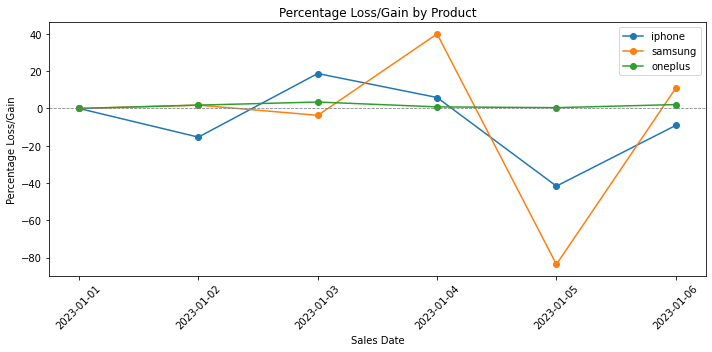

In [0]:
# Convert to Pandas DataFrame for plotting
pandas_df = df.toPandas()

# Plotting using Matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for product in pandas_df['product_name'].unique():
    subset = pandas_df[pandas_df['product_name'] == product]
    plt.plot(subset['sales_date'], subset['per_loss_gain'], marker='o', label=product)

plt.xlabel('Sales Date')
plt.ylabel('Percentage Loss/Gain')
plt.title('Percentage Loss/Gain by Product')
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0
plt.legend()
plt.tight_layout()
plt.show()

In [0]:
# Summary Statistics
mean_loss_gain = df.groupBy('product_name').agg({'per_loss_gain': 'avg'}).show()

# Filter Positive Gains
positive_gain = df.filter(df['per_loss_gain'] > 0)
positive_gain.show()

+------------+------------------+
|product_name|avg(per_loss_gain)|
+------------+------------------+
|      iphone|-6.918333333333334|
|     samsung|-5.778333333333333|
|     oneplus|1.4333333333333333|
+------------+------------------+

+------------+----------+-------------+
|product_name|sales_date|per_loss_gain|
+------------+----------+-------------+
|      iphone|2023-01-03|        18.75|
|      iphone|2023-01-04|         5.88|
|     samsung|2023-01-02|         1.79|
|     samsung|2023-01-04|         40.0|
|     samsung|2023-01-06|        10.91|
|     oneplus|2023-01-02|         1.79|
|     oneplus|2023-01-03|         3.45|
|     oneplus|2023-01-04|         0.85|
|     oneplus|2023-01-05|         0.43|
|     oneplus|2023-01-06|         2.08|
+------------+----------+-------------+



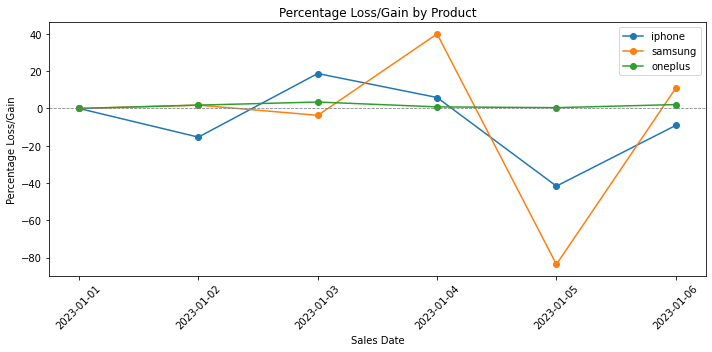

In [0]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Initialize Spark session
spark = SparkSession.builder.appName("Sales Data").getOrCreate()

# Sample data
data = [
    ("iphone", "2023-01-01", None),
    ("iphone", "2023-01-02", -15.38),
    ("iphone", "2023-01-03", 18.75),
    ("iphone", "2023-01-04", 5.88),
    ("iphone", "2023-01-05", -41.67),
    ("iphone", "2023-01-06", -9.09),
    ("samsung", "2023-01-01", None),
    ("samsung", "2023-01-02", 1.79),
    ("samsung", "2023-01-03", -3.7),
    ("samsung", "2023-01-04", 40.0),
    ("samsung", "2023-01-05", -83.67),
    ("samsung", "2023-01-06", 10.91),
    ("oneplus", "2023-01-01", None),
    ("oneplus", "2023-01-02", 1.79),
    ("oneplus", "2023-01-03", 3.45),
    ("oneplus", "2023-01-04", 0.85),
    ("oneplus", "2023-01-05", 0.43),
    ("oneplus", "2023-01-06", 2.08)
]

# Create DataFrame
columns = ["product_name", "sales_date", "per_loss_gain"]
df = spark.createDataFrame(data, schema=columns)

# Replace null values with 0
df = df.na.fill({"per_loss_gain": 0})

# Convert the sales_date to correct format for plotting
df = df.withColumn("sales_date", df["sales_date"].cast("date"))

# Convert to Pandas DataFrame for plotting
pandas_df = df.toPandas()

# Plotting using Matplotlib
plt.figure(figsize=(10, 5))
for product in pandas_df['product_name'].unique():
    subset = pandas_df[pandas_df['product_name'] == product]
    plt.plot(subset['sales_date'], subset['per_loss_gain'], marker='o', label=product)

plt.xlabel('Sales Date')
plt.ylabel('Percentage Loss/Gain')
plt.title('Percentage Loss/Gain by Product')
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0
plt.legend()
plt.tight_layout()
plt.show()

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql import Window
from pyspark.sql.functions import col, lead

window = Window.partitionBy("product_id").orderBy("sales_date")

last_month_df = product_df.withColumn("previous_month_sales",lead(col("sales"),1).over(window))

last_month_df.show()

+----------+------------+----------+-------+--------------------+
|product_id|product_name|sales_date|  sales|previous_month_sales|
+----------+------------+----------+-------+--------------------+
|         1|      iphone|2023-01-01|1500000|             1300000|
|         1|      iphone|2023-01-02|1300000|             1600000|
|         1|      iphone|2023-01-03|1600000|             1700000|
|         1|      iphone|2023-01-04|1700000|             1200000|
|         1|      iphone|2023-01-05|1200000|             1100000|
|         1|      iphone|2023-01-06|1100000|                null|
|         2|     samsung|2023-01-01|1100000|             1120000|
|         2|     samsung|2023-01-02|1120000|             1080000|
|         2|     samsung|2023-01-03|1080000|             1800000|
|         2|     samsung|2023-01-04|1800000|              980000|
|         2|     samsung|2023-01-05| 980000|             1100000|
|         2|     samsung|2023-01-06|1100000|                null|
|         

In [0]:
last_month_df.withColumn("per_loss_gain",col("sales")-col("previous_month_sales")).show()

+----------+------------+----------+-------+--------------------+-------------+
|product_id|product_name|sales_date|  sales|previous_month_sales|per_loss_gain|
+----------+------------+----------+-------+--------------------+-------------+
|         1|      iphone|2023-01-01|1500000|             1300000|       200000|
|         1|      iphone|2023-01-02|1300000|             1600000|      -300000|
|         1|      iphone|2023-01-03|1600000|             1700000|      -100000|
|         1|      iphone|2023-01-04|1700000|             1200000|       500000|
|         1|      iphone|2023-01-05|1200000|             1100000|       100000|
|         1|      iphone|2023-01-06|1100000|                null|         null|
|         2|     samsung|2023-01-01|1100000|             1120000|       -20000|
|         2|     samsung|2023-01-02|1120000|             1080000|        40000|
|         2|     samsung|2023-01-03|1080000|             1800000|      -720000|
|         2|     samsung|2023-01-04|1800

#***rows between in pyspark***

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql import Window
from pyspark.sql.functions import col, first, last


product_data = [
(2,"samsung","01-01-1995",11000),
(1,"iphone","01-02-2023",1300000),
(2,"samsung","01-02-2023",1120000),
(3,"oneplus","01-02-2023",1120000),
(1,"iphone","01-03-2023",1600000),
(2,"samsung","01-03-2023",1080000),
(3,"oneplus","01-03-2023",1160000),
(1,"iphone","01-01-2006",15000),
(1,"iphone","01-04-2023",1700000),
(2,"samsung","01-04-2023",1800000),
(3,"oneplus","01-04-2023",1170000),
(1,"iphone","01-05-2023",1200000),
(2,"samsung","01-05-2023",980000),
(3,"oneplus","01-05-2023",1175000),
(1,"iphone","01-06-2023",1100000),
(3,"oneplus","01-01-2010",23000),
(2,"samsung","01-06-2023",1100000),
(3,"oneplus","01-06-2023",1200000)
]

product_schema=["product_id","product_name","sales_date","sales"]

product_df = spark.createDataFrame(data=product_data,schema=product_schema)

product_df.show()

+----------+------------+----------+-------+
|product_id|product_name|sales_date|  sales|
+----------+------------+----------+-------+
|         2|     samsung|01-01-1995|  11000|
|         1|      iphone|01-02-2023|1300000|
|         2|     samsung|01-02-2023|1120000|
|         3|     oneplus|01-02-2023|1120000|
|         1|      iphone|01-03-2023|1600000|
|         2|     samsung|01-03-2023|1080000|
|         3|     oneplus|01-03-2023|1160000|
|         1|      iphone|01-01-2006|  15000|
|         1|      iphone|01-04-2023|1700000|
|         2|     samsung|01-04-2023|1800000|
|         3|     oneplus|01-04-2023|1170000|
|         1|      iphone|01-05-2023|1200000|
|         2|     samsung|01-05-2023| 980000|
|         3|     oneplus|01-05-2023|1175000|
|         1|      iphone|01-06-2023|1100000|
|         3|     oneplus|01-01-2010|  23000|
|         2|     samsung|01-06-2023|1100000|
|         3|     oneplus|01-06-2023|1200000|
+----------+------------+----------+-------+



In [0]:
window = Window.partitionBy("product_id").orderBy("sales_date").rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)

In [0]:
product_df.withColumn("first_sales", first("sales").over(window)) \
                       .withColumn("last_sales", last("sales").over(window)).show()

+----------+------------+----------+-------+-----------+----------+
|product_id|product_name|sales_date|  sales|first_sales|last_sales|
+----------+------------+----------+-------+-----------+----------+
|         1|      iphone|01-01-2006|  15000|      15000|   1100000|
|         1|      iphone|01-02-2023|1300000|      15000|   1100000|
|         1|      iphone|01-03-2023|1600000|      15000|   1100000|
|         1|      iphone|01-04-2023|1700000|      15000|   1100000|
|         1|      iphone|01-05-2023|1200000|      15000|   1100000|
|         1|      iphone|01-06-2023|1100000|      15000|   1100000|
|         2|     samsung|01-01-1995|  11000|      11000|   1100000|
|         2|     samsung|01-02-2023|1120000|      11000|   1100000|
|         2|     samsung|01-03-2023|1080000|      11000|   1100000|
|         2|     samsung|01-04-2023|1800000|      11000|   1100000|
|         2|     samsung|01-05-2023| 980000|      11000|   1100000|
|         2|     samsung|01-06-2023|1100000|    

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql import Window
from pyspark.sql.functions import col, first, last, to_timestamp, concat 

emp_data = [(1,"manish","11-07-2023","10:20"),
        (1,"manish","11-07-2023","11:20"),
        (2,"rajesh","11-07-2023","11:20"),
        (1,"manish","11-07-2023","11:50"),
        (2,"rajesh","11-07-2023","13:20"),
        (1,"manish","11-07-2023","19:20"),
        (2,"rajesh","11-07-2023","17:20"),
        (1,"manish","12-07-2023","10:32"),
        (1,"manish","12-07-2023","12:20"),
        (3,"vikash","12-07-2023","09:12"),
        (1,"manish","12-07-2023","16:23"),
        (3,"vikash","12-07-2023","18:08")]

emp_schema = ["id", "name", "date", "time"]
emp_df = spark.createDataFrame(data=emp_data, schema=emp_schema)

emp_df.show()

+---+------+----------+-----+
| id|  name|      date| time|
+---+------+----------+-----+
|  1|manish|11-07-2023|10:20|
|  1|manish|11-07-2023|11:20|
|  2|rajesh|11-07-2023|11:20|
|  1|manish|11-07-2023|11:50|
|  2|rajesh|11-07-2023|13:20|
|  1|manish|11-07-2023|19:20|
|  2|rajesh|11-07-2023|17:20|
|  1|manish|12-07-2023|10:32|
|  1|manish|12-07-2023|12:20|
|  3|vikash|12-07-2023|09:12|
|  1|manish|12-07-2023|16:23|
|  3|vikash|12-07-2023|18:08|
+---+------+----------+-----+



In [0]:
emp_df=emp_df.withColumn("timestamp",
                           from_unixtime(unix_timestamp(expr("CONCAT(date, ' ', time)"), "dd-MM-yyyy HH:mm")))


In [0]:
emp_df.show()

+---+------+----------+-----+-------------------+
| id|  name|      date| time|          timestamp|
+---+------+----------+-----+-------------------+
|  1|manish|11-07-2023|10:20|2023-07-11 10:20:00|
|  1|manish|11-07-2023|11:20|2023-07-11 11:20:00|
|  2|rajesh|11-07-2023|11:20|2023-07-11 11:20:00|
|  1|manish|11-07-2023|11:50|2023-07-11 11:50:00|
|  2|rajesh|11-07-2023|13:20|2023-07-11 13:20:00|
|  1|manish|11-07-2023|19:20|2023-07-11 19:20:00|
|  2|rajesh|11-07-2023|17:20|2023-07-11 17:20:00|
|  1|manish|12-07-2023|10:32|2023-07-12 10:32:00|
|  1|manish|12-07-2023|12:20|2023-07-12 12:20:00|
|  3|vikash|12-07-2023|09:12|2023-07-12 09:12:00|
|  1|manish|12-07-2023|16:23|2023-07-12 16:23:00|
|  3|vikash|12-07-2023|18:08|2023-07-12 18:08:00|
+---+------+----------+-----+-------------------+



In [0]:
window = Window.partitionBy("id","date").orderBy("date").rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)

In [0]:
new_df = emp_df.withColumn("login", first("timestamp").over(window))\
                .withColumn("logout",last("timestamp").over(window))\
                    .withColumn("login",to_timestamp("login","yyyy-MM-dd HH:mm:ss"))\
                        .withColumn("logout",to_timestamp("logout","yyyy-MM-dd HH:mm:ss"))\
                            .withColumn("total_time",col("logout")-col("login")).show(truncate = False)

+---+------+----------+-----+-------------------+-------------------+-------------------+-----------------------------------+
|id |name  |date      |time |timestamp          |login              |logout             |total_time                         |
+---+------+----------+-----+-------------------+-------------------+-------------------+-----------------------------------+
|1  |manish|11-07-2023|10:20|2023-07-11 10:20:00|2023-07-11 10:20:00|2023-07-11 19:20:00|INTERVAL '0 09:00:00' DAY TO SECOND|
|1  |manish|11-07-2023|11:20|2023-07-11 11:20:00|2023-07-11 10:20:00|2023-07-11 19:20:00|INTERVAL '0 09:00:00' DAY TO SECOND|
|1  |manish|11-07-2023|11:50|2023-07-11 11:50:00|2023-07-11 10:20:00|2023-07-11 19:20:00|INTERVAL '0 09:00:00' DAY TO SECOND|
|1  |manish|11-07-2023|19:20|2023-07-11 19:20:00|2023-07-11 10:20:00|2023-07-11 19:20:00|INTERVAL '0 09:00:00' DAY TO SECOND|
|1  |manish|12-07-2023|10:32|2023-07-12 10:32:00|2023-07-12 10:32:00|2023-07-12 16:23:00|INTERVAL '0 05:51:00' DAY TO 

In [0]:
from pyspark.sql import SparkSession, Window
from pyspark.sql.functions import col, first, last, to_timestamp, unix_timestamp, expr, when

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Employee Total Time Calculation") \
    .getOrCreate()

# Employee data
emp_data = [
    (1, "manish", "11-07-2023", "10:20"),
    (1, "manish", "11-07-2023", "11:20"),
    (2, "rajesh", "11-07-2023", "11:20"),
    (1, "manish", "11-07-2023", "11:50"),
    (2, "rajesh", "11-07-2023", "13:20"),
    (1, "manish", "11-07-2023", "19:20"),
    (2, "rajesh", "11-07-2023", "17:20"),
    (1, "manish", "12-07-2023", "10:32"),
    (1, "manish", "12-07-2023", "12:20"),
    (3, "vikash", "12-07-2023", "09:12"),
    (1, "manish", "12-07-2023", "16:23"),
    (3, "vikash", "12-07-2023", "18:08")
]

# Define schema
emp_schema = ["id", "name", "date", "time"]

# Create DataFrame
emp_df = spark.createDataFrame(data=emp_data, schema=emp_schema)

# Create timestamp column
emp_df = emp_df.withColumn(
    "timestamp",
    to_timestamp(unix_timestamp(expr("CONCAT(date, ' ', time)"), "dd-MM-yyyy HH:mm").cast("timestamp"))
)

# Define window
window = Window.partitionBy("id", "date").orderBy("timestamp").rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)

# Calculate login, logout, and total time
new_df = emp_df.withColumn("login", first("timestamp").over(window)) \
                .withColumn("logout", last("timestamp").over(window)) \
                .withColumn("total_time", round((col("logout").cast("long") - col("login").cast("long")) / 3600,2))  # Convert seconds to hours

# Show the DataFrame with total time
new_df.select("id", "name", "date", "login", "logout", "total_time").show(truncate=False)

# Determine who should receive an email
emails_to_send = new_df.filter(col("total_time") < 8).select("id", "name", "date", "total_time")


# Determine who should receive an good
emails_to_good = new_df.filter(col("total_time") >= 8).select("id", "name", "date", "total_time")

# Show employees to notify
emails_to_send.show(truncate=False)
emails_to_good.show(truncate=False)

+---+------+----------+-------------------+-------------------+----------+
|id |name  |date      |login              |logout             |total_time|
+---+------+----------+-------------------+-------------------+----------+
|1  |manish|11-07-2023|2023-07-11 10:20:00|2023-07-11 19:20:00|9.0       |
|1  |manish|11-07-2023|2023-07-11 10:20:00|2023-07-11 19:20:00|9.0       |
|1  |manish|11-07-2023|2023-07-11 10:20:00|2023-07-11 19:20:00|9.0       |
|1  |manish|11-07-2023|2023-07-11 10:20:00|2023-07-11 19:20:00|9.0       |
|1  |manish|12-07-2023|2023-07-12 10:32:00|2023-07-12 16:23:00|5.85      |
|1  |manish|12-07-2023|2023-07-12 10:32:00|2023-07-12 16:23:00|5.85      |
|1  |manish|12-07-2023|2023-07-12 10:32:00|2023-07-12 16:23:00|5.85      |
|2  |rajesh|11-07-2023|2023-07-11 11:20:00|2023-07-11 17:20:00|6.0       |
|2  |rajesh|11-07-2023|2023-07-11 11:20:00|2023-07-11 17:20:00|6.0       |
|2  |rajesh|11-07-2023|2023-07-11 11:20:00|2023-07-11 17:20:00|6.0       |
|3  |vikash|12-07-2023|20

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.window import Window
from pyspark.sql.functions import *
from pyspark.sql.types import * 


product_data = [
(1,"iphone","01-01-2023",1500000),
(2,"samsung","01-01-2023",1100000),
(3,"oneplus","01-01-2023",1100000),
(1,"iphone","01-02-2023",1300000),
(2,"samsung","01-02-2023",1120000),
(3,"oneplus","01-02-2023",1120000),
(1,"iphone","01-03-2023",1600000),
(2,"samsung","01-03-2023",1080000),
(3,"oneplus","01-03-2023",1160000),
(1,"iphone","01-04-2023",1700000),
(2,"samsung","01-04-2023",1800000),
(3,"oneplus","01-04-2023",1170000),
(1,"iphone","01-05-2023",1200000),
(2,"samsung","01-05-2023",980000),
(3,"oneplus","01-05-2023",1175000),
(1,"iphone","01-06-2023",1100000),
(2,"samsung","01-06-2023",1100000),
(3,"oneplus","01-06-2023",1200000)
]

product_schema=["product_id","product_name","sales_date","sales"]

product_df = spark.createDataFrame(data=product_data,schema=product_schema)


In [0]:
# DataFrame এর স্কিমা প্রিন্ট করা
product_df.printSchema()


root
 |-- product_id: long (nullable = true)
 |-- product_name: string (nullable = true)
 |-- sales_date: string (nullable = true)
 |-- sales: long (nullable = true)



In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.window import Window
from pyspark.sql.functions import col, sum, unix_timestamp, to_date

# Create a Spark session
spark = SparkSession.builder \
    .appName("Running Sum Example") \
    .getOrCreate()

# Input data
product_data = [
    (1, "iphone", "01-01-2023", 1500000),
    (2, "samsung", "01-01-2023", 1100000),
    (3, "oneplus", "01-01-2023", 1100000),
    (1, "iphone", "01-02-2023", 1300000),
    (2, "samsung", "01-02-2023", 1120000),
    (3, "oneplus", "01-02-2023", 1120000),
    (1, "iphone", "01-03-2023", 1600000),
    (2, "samsung", "01-03-2023", 1080000),
    (3, "oneplus", "01-03-2023", 1160000),
    (1, "iphone", "01-04-2023", 1700000),
    (2, "samsung", "01-04-2023", 1800000),
    (3, "oneplus", "01-04-2023", 1170000),
    (1, "iphone", "01-05-2023", 1200000),
    (2, "samsung", "01-05-2023", 980000),
    (3, "oneplus", "01-05-2023", 1175000),
    (1, "iphone", "01-06-2023", 1100000),
    (2, "samsung", "01-06-2023", 1100000),
    (3, "oneplus", "01-06-2023", 1200000)
]

# Schema
product_schema = ["product_id", "product_name", "sales_date", "sales"]

# Create DataFrame
product_df = spark.createDataFrame(data=product_data, schema=product_schema)

# Convert sales_date to DateType
product_df = product_df.withColumn("sales_date", to_date(col("sales_date"), "MM-dd-yyyy"))

# Convert sales_date to timestamp for RANGE operations
product_df = product_df.withColumn("sales_date_ts", unix_timestamp("sales_date"))

# Define window specifications
window_rows = (
    Window.partitionBy("product_id")
    .orderBy("sales_date")
    .rowsBetween(-2, 0)
)

window_range = (
    Window.partitionBy("product_id")
    .orderBy("sales_date_ts")
    .rangeBetween(-1000000, 0)
)

# Add running sum columns
product_df = product_df.withColumn("running_sum_rows", sum("sales").over(window_rows))
product_df = product_df.withColumn("running_sum_range", sum("sales").over(window_range))

# Show the results
product_df.show()


+----------+------------+----------+-------+-------------+----------------+-----------------+
|product_id|product_name|sales_date|  sales|sales_date_ts|running_sum_rows|running_sum_range|
+----------+------------+----------+-------+-------------+----------------+-----------------+
|         1|      iphone|2023-01-01|1500000|   1672531200|         1500000|          1500000|
|         1|      iphone|2023-01-02|1300000|   1672617600|         2800000|          2800000|
|         1|      iphone|2023-01-03|1600000|   1672704000|         4400000|          4400000|
|         1|      iphone|2023-01-04|1700000|   1672790400|         4600000|          6100000|
|         1|      iphone|2023-01-05|1200000|   1672876800|         4500000|          7300000|
|         1|      iphone|2023-01-06|1100000|   1672963200|         4000000|          8400000|
|         2|     samsung|2023-01-01|1100000|   1672531200|         1100000|          1100000|
|         2|     samsung|2023-01-02|1120000|   1672617600|  

In [0]:
# DataFrame এর স্কিমা প্রিন্ট করা
product_df.printSchema()


root
 |-- product_id: long (nullable = true)
 |-- product_name: string (nullable = true)
 |-- sales_date: date (nullable = true)
 |-- sales: long (nullable = true)
 |-- sales_date_ts: long (nullable = true)
 |-- running_sum_rows: long (nullable = true)
 |-- running_sum_range: long (nullable = true)



#***flatten nested json in pyspark***

In [0]:
from pyspark.sql.functions import *
from pyspark.sql.types import * 

In [0]:
# df1 = spark.read.format("json").load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/resturant_json_data.json")

from pyspark.sql.functions import *
from pyspark.sql.types import * 

resturant_json = spark.read.format("json")\
            .option("multiline","true")\
            .option("inferschema","true")\
            .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/resturant_json_data.json")

In [0]:
resturant_json.show()

+----+-------+--------------------+-------------+-------------+-------------+------+
|code|message|         restaurants|results_found|results_shown|results_start|status|
+----+-------+--------------------+-------------+-------------+-------------+------+
|null|   null|                  []|            0|            0|            1|  null|
|null|   null|[{{{17066603}, b9...|         6835|           20|            1|  null|
|null|   null|                  []|            0|            0|            1|  null|
|null|   null|                  []|            0|            0|            1|  null|
|null|   null|[{{{17093124}, b9...|         8680|           20|            1|  null|
|null|   null|                  []|            0|            0|            1|  null|
|null|   null|                  []|            0|            0|            1|  null|
|null|   null|[{{{17580142}, b9...|          943|           20|            1|  null|
|null|   null|                  []|            0|            0|  

In [0]:
resturant_json.printSchema()

root
 |-- code: long (nullable = true)
 |-- message: string (nullable = true)
 |-- restaurants: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- restaurant: struct (nullable = true)
 |    |    |    |-- R: struct (nullable = true)
 |    |    |    |    |-- res_id: long (nullable = true)
 |    |    |    |-- apikey: string (nullable = true)
 |    |    |    |-- average_cost_for_two: long (nullable = true)
 |    |    |    |-- cuisines: string (nullable = true)
 |    |    |    |-- currency: string (nullable = true)
 |    |    |    |-- deeplink: string (nullable = true)
 |    |    |    |-- establishment_types: array (nullable = true)
 |    |    |    |    |-- element: string (containsNull = true)
 |    |    |    |-- events_url: string (nullable = true)
 |    |    |    |-- featured_image: string (nullable = true)
 |    |    |    |-- has_online_delivery: long (nullable = true)
 |    |    |    |-- has_table_booking: long (nullable = true)
 |    |    |    |-- i

In [0]:
resturant_json.select("*",explode("restaurants").alias("new_restaurants")).drop("restaurants").printSchema()

root
 |-- code: long (nullable = true)
 |-- message: string (nullable = true)
 |-- results_found: long (nullable = true)
 |-- results_shown: long (nullable = true)
 |-- results_start: string (nullable = true)
 |-- status: string (nullable = true)
 |-- new_restaurants: struct (nullable = true)
 |    |-- restaurant: struct (nullable = true)
 |    |    |-- R: struct (nullable = true)
 |    |    |    |-- res_id: long (nullable = true)
 |    |    |-- apikey: string (nullable = true)
 |    |    |-- average_cost_for_two: long (nullable = true)
 |    |    |-- cuisines: string (nullable = true)
 |    |    |-- currency: string (nullable = true)
 |    |    |-- deeplink: string (nullable = true)
 |    |    |-- establishment_types: array (nullable = true)
 |    |    |    |-- element: string (containsNull = true)
 |    |    |-- events_url: string (nullable = true)
 |    |    |-- featured_image: string (nullable = true)
 |    |    |-- has_online_delivery: long (nullable = true)
 |    |    |-- has_tab

In [0]:
resturant_json.select("*",explode("restaurants").alias("new_restaurants")).drop("restaurants")\
                .select("new_restaurants.restaurant.R.res_id").show()

+--------+
|  res_id|
+--------+
|17066603|
|17059541|
|17064405|
|17057797|
|17057591|
|17064266|
|17060516|
|17060320|
|17059060|
|17059012|
|17060869|
|17061231|
|17058534|
|17057925|
|17064031|
|17061237|
|17061253|
|17061296|
|17061205|
|17057397|
+--------+
only showing top 20 rows



In [0]:
resturant_json.select("*",explode("restaurants").alias("new_restaurants")).drop("restaurants")\
                .select("*","new_restaurants.restaurant.R.res_id",
                       explode("new_restaurants.restaurant.establishment_types").alias("establishment_types"),explode("new_restaurants.restaurant.establishment_types.element").alias("element"),"new_restaurants.restaurant.name",
                       "new_restaurants.restaurant.location.address",
                       "new_restaurants.restaurant.location.city",
                       "new_restaurants.restaurant.price_range",
                       "new_restaurants.restaurant.user_rating"
                       ).printSchema()

---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
File <command-1733041662803272>:1
----> 1 resturant_json.select("*",explode("restaurants").alias("new_restaurants")).drop("restaurants")\
      2                 .select("*","new_restaurants.restaurant.R.res_id",
      3                        explode("new_restaurants.restaurant.establishment_types").alias("establishment_types"),explode("new_restaurants.restaurant.establishment_types.element").alias("element"),"new_restaurants.restaurant.name",
      4                        "new_restaurants.restaurant.location.address",
      5                        "new_restaurants.restaurant.location.city",
      6                        "new_restaurants.restaurant.price_range",
      7                        "new_restaurants.restaurant.user_rating"
      8                        ).printSchema()

File /databricks/spark/python/pyspark/instrumentation

In [0]:
resturant_json.printSchema()

root
 |-- code: long (nullable = true)
 |-- message: string (nullable = true)
 |-- restaurants: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- restaurant: struct (nullable = true)
 |    |    |    |-- R: struct (nullable = true)
 |    |    |    |    |-- res_id: long (nullable = true)
 |    |    |    |-- apikey: string (nullable = true)
 |    |    |    |-- average_cost_for_two: long (nullable = true)
 |    |    |    |-- cuisines: string (nullable = true)
 |    |    |    |-- currency: string (nullable = true)
 |    |    |    |-- deeplink: string (nullable = true)
 |    |    |    |-- establishment_types: array (nullable = true)
 |    |    |    |    |-- element: string (containsNull = true)
 |    |    |    |-- events_url: string (nullable = true)
 |    |    |    |-- featured_image: string (nullable = true)
 |    |    |    |-- has_online_delivery: long (nullable = true)
 |    |    |    |-- has_table_booking: long (nullable = true)
 |    |    |    |-- i

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, explode

# Create Spark session
spark = SparkSession.builder.appName("Flatten Nested JSON").getOrCreate()

# Sample DataFrame creation (replace with actual DataFrame loading)
# Assume `data` is your input JSON data loaded as a DataFrame
# Example: data = spark.read.json("your_file_path.json")

# Flattening the structure
restaurants_df = resturant_json.select(
    col("code"),
    col("message"),
    col("results_found"),
    col("results_shown"),
    col("results_start"),
    col("status"),
    explode("restaurants").alias("restaurant_info")
).select(
    col("code"),
    col("message"),
    col("results_found"),
    col("results_shown"),
    col("results_start"),
    col("status"),
    col("restaurant_info.restaurant.R.res_id").alias("restaurant_id"),
    col("restaurant_info.restaurant.name").alias("restaurant_name"),
    col("restaurant_info.restaurant.cuisines").alias("cuisines"),
    col("restaurant_info.restaurant.average_cost_for_two").alias("avg_cost_for_two"),
    col("restaurant_info.restaurant.location.address").alias("address"),
    col("restaurant_info.restaurant.location.city").alias("city"),
    col("restaurant_info.restaurant.location.latitude").alias("latitude"),
    col("restaurant_info.restaurant.location.longitude").alias("longitude"),
    col("restaurant_info.restaurant.user_rating.aggregate_rating").alias("rating"),
    col("restaurant_info.restaurant.user_rating.votes").alias("votes"),
    col("restaurant_info.restaurant.has_online_delivery").alias("online_delivery"),
    col("restaurant_info.restaurant.has_table_booking").alias("table_booking"),
    col("restaurant_info.restaurant.price_range").alias("price_range"),
    col("restaurant_info.restaurant.thumb").alias("thumbnail_url"),
    col("restaurant_info.restaurant.url").alias("restaurant_url")
)

# Show flattened DataFrame
restaurants_df.show(truncate=False)

+----+-------+-------------+-------------+-------------+------+-------------+------------------------------------+---------------------------------+----------------+----------------------------------------------------+-------+-------------+--------------+------+-----+---------------+-------------+-----------+----------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------+
|code|message|results_found|results_shown|results_start|status|restaurant_id|restaurant_name                     |cuisines                         |avg_cost_for_two|address                                             |city   |latitude     |longitude     |rating|votes|online_delivery|table_booking|price_range|thumbnail_url                                                                                 |restaurant_url                         

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, explode

# Create Spark session
spark = SparkSession.builder.appName("Flatten Nested JSON").getOrCreate()



# Flattening the structure
restaurants_df = resturant_json.select(
    col("code"),
    col("message"),
    col("results_found"),
    col("results_shown"),
    col("results_start"),
    col("status"),
    explode_outer("restaurants").alias("restaurant_info")
).select(
    col("restaurant_info.restaurant.R.res_id").alias("restaurant_id"),
    col("restaurant_info.restaurant.name").alias("restaurant_name"),
    explode_outer(col("restaurant_info.restaurant.establishment_types")).alias("establishment_types"),
    col("restaurant_info.restaurant.average_cost_for_two").alias("avg_cost_for_two"),
    col("restaurant_info.restaurant.location.address").alias("address"),
    col("restaurant_info.restaurant.location.city").alias("city"),
    
    col("restaurant_info.restaurant.user_rating.aggregate_rating").alias("rating"),
    col("restaurant_info.restaurant.user_rating.votes").alias("votes"),
    col("restaurant_info.restaurant.has_online_delivery").alias("online_delivery"),
    col("restaurant_info.restaurant.has_table_booking").alias("table_booking"),
    col("restaurant_info.restaurant.price_range").alias("price_range"),

)

# Show flattened DataFrame
restaurants_df.show(truncate=False)


+-------------+------------------------------------+-------------------+----------------+----------------------------------------------------+-------+------+-----+---------------+-------------+-----------+
|restaurant_id|restaurant_name                     |establishment_types|avg_cost_for_two|address                                             |city   |rating|votes|online_delivery|table_booking|price_range|
+-------------+------------------------------------+-------------------+----------------+----------------------------------------------------+-------+------+-----+---------------+-------------+-----------+
|null         |null                                |null               |null            |null                                                |null   |null  |null |null           |null         |null       |
|17066603     |The Coop                            |null               |25              |610 W Morse Boulevard, Winter Park, FL 32789        |Orlando|3.6   |432  |0            

In [0]:
restaurants_df.printSchema()

root
 |-- restaurant_id: long (nullable = true)
 |-- restaurant_name: string (nullable = true)
 |-- establishment_types: string (nullable = true)
 |-- avg_cost_for_two: long (nullable = true)
 |-- address: string (nullable = true)
 |-- city: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- votes: string (nullable = true)
 |-- online_delivery: long (nullable = true)
 |-- table_booking: long (nullable = true)
 |-- price_range: long (nullable = true)



In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, explode_outer

# Create Spark session
spark = SparkSession.builder.appName("Flatten Nested JSON").getOrCreate()

# Assume `resturant_json` is the DataFrame holding your JSON data
# Flattening the structure
restaurants_df = resturant_json.select(
    col("code"),
    col("message"),
    col("results_found"),
    col("results_shown"),
    col("results_start"),
    col("status"),
    explode_outer("restaurants").alias("restaurant_info")
).select(
    col("restaurant_info.restaurant.R.res_id").alias("restaurant_id"),
    col("restaurant_info.restaurant.name").alias("restaurant_name"),
    explode_outer(col("restaurant_info.restaurant.establishment_types")).alias("establishment_type_element")
)

# Show flattened DataFrame
restaurants_df.show(truncate=False)


+-------------+------------------------------------+--------------------------+
|restaurant_id|restaurant_name                     |establishment_type_element|
+-------------+------------------------------------+--------------------------+
|null         |null                                |null                      |
|17066603     |The Coop                            |null                      |
|17059541     |Maggiano's Little Italy             |null                      |
|17064405     |Tako Cheena by Pom Pom              |null                      |
|17057797     |Bosphorous Turkish Cuisine          |null                      |
|17057591     |Bahama Breeze Island Grille         |null                      |
|17064266     |Hawkers Asian Street Fare           |null                      |
|17060516     |Seasons 52 Fresh Grill              |null                      |
|17060320     |Raglan Road Irish Pub and Restaurant|null                      |
|17059060     |Hillstone                

In [0]:
restaurants_df.printSchema()

root
 |-- restaurant_id: long (nullable = true)
 |-- restaurant_name: string (nullable = true)
 |-- establishment_type_element: string (nullable = true)



#***scala code*** 

In [0]:
%scala
import org.apache.spark.sql.functions._
import org.apache.spark.sql.SparkSession

// Initialize Spark session
val spark = SparkSession.builder()
    .appName("Restaurant JSON Reader")
    .getOrCreate()

// Read JSON data
val restaurantJson = spark.read.format("json")
    .option("multiline", "true")
    .option("inferschema", "true")
    .load("dbfs:/FileStore/shared_uploads/mechinelearningai@gmail.com/resturant_json_data.json")

// Flattening the structure
val restaurantsDf = restaurantJson.select(
    col("code"),
    col("message"),
    col("results_found"),
    col("results_shown"),
    col("results_start"),
    col("status"),
    explode_outer(col("restaurants")).alias("restaurant_info")
).select(
    col("restaurant_info.restaurant.R.res_id").alias("restaurant_id"),
    col("restaurant_info.restaurant.name").alias("restaurant_name"),
    explode_outer(col("restaurant_info.restaurant.establishment_types")).alias("establishment_type_element")
)

// Show flattened DataFrame
restaurantsDf.show(truncate = false)

+-------------+------------------------------------+--------------------------+
restaurant_id|restaurant_name |establishment_type_element|
+-------------+------------------------------------+--------------------------+
null |null |null |
17066603 |The Coop |null |
17059541 |Maggiano's Little Italy |null |
17064405 |Tako Cheena by Pom Pom |null |
17057797 |Bosphorous Turkish Cuisine |null |
17057591 |Bahama Breeze Island Grille |null |
17064266 |Hawkers Asian Street Fare |null |
17060516 |Seasons 52 Fresh Grill |null |
17060320 |Raglan Road Irish Pub and Restaurant|null |
17059060 |Hillstone |null |
17059012 |Hollerbach's Willow Tree Café |null |
17060869 |Texas de Brazil |null |
17061231 |The Ravenous Pig |null |
17058534 |Earl of Sandwich |null |
17057925 |Café Tu Tu Tango |null |
17064031 |Tibby's New Orleans Kitchen |null |
17061237 |Cevíche Tapas Bar & Restaurant |null |
17061253 |Ethos Vegan Kitchen |null |
17061296 |Pom Pom's Teahouse and Sandwicheria |null |
17061205 |Yellow Dog Eats |null |
+-------------+------------------------------------+--------------------------+
only showing top 20 rows

import org.apache.spark.sql.functions._
import org.apache.spark.sql.SparkSession
spark: org.apache.spark.sql.SparkSession = org.apache.spark.sql.SparkSession@356ac831
restaurantJson: org.apache.spark.sql.DataFrame = [code: bigint, message: string ... 5 more fields]
restaurantsDf: org.apache.spark.sql.DataFrame = [restaurant_id: bigint, restaurant_name: string ... 1 more field]

# ***scd2 in pyspark***

In [0]:
from pyspark.sql.functions import *
from pyspark.sql.types import * 
from pyspark.sql.window import Window

In [0]:
sales_data = [

(1,1,'manish','2023-01-16','gurgaon','india',380),
(77,1,'manish','2023-03-11','bangalore','india',300),
(12,3,'nikita','2023-09-20','delhi','india',127),
(54,4,'rakesh','2023-08-10','jaipur','india',321),
(65,5,'ayush','2023-09-07','mosco','russia',765),
(89,6,'rajat','2023-08-10','jaipur','india',321)
]

sales_schema = ['sales_id', 'customer_id','customer_name', 'sales_date', 'food_delivery_address','food_delivery_country', 'food_cost']

sales_df = spark.createDataFrame(data=sales_data,schema=sales_schema)

In [0]:
sales_df.show()

+--------+-----------+-------------+----------+---------------------+---------------------+---------+
|sales_id|customer_id|customer_name|sales_date|food_delivery_address|food_delivery_country|food_cost|
+--------+-----------+-------------+----------+---------------------+---------------------+---------+
|       1|          1|       manish|2023-01-16|              gurgaon|                india|      380|
|      77|          1|       manish|2023-03-11|            bangalore|                india|      300|
|      12|          3|       nikita|2023-09-20|                delhi|                india|      127|
|      54|          4|       rakesh|2023-08-10|               jaipur|                india|      321|
|      65|          5|        ayush|2023-09-07|                mosco|               russia|      765|
|      89|          6|        rajat|2023-08-10|               jaipur|                india|      321|
+--------+-----------+-------------+----------+---------------------+-------------

In [0]:
customer_dim_data = [

(1,'manish','arwal','india','N','2022-09-15','2022-09-25'),
(2,'vikash','patna','india','Y','2023-08-12',None),
(3,'nikita','delhi','india','Y','2023-09-10',None),
(4,'rakesh','jaipur','india','Y','2023-06-10',None),
(5,'ayush','NY','USA','Y','2023-06-10',None),
(1,'manish','gurgaon','india','Y','2022-09-25',None),
]

customer_schema= ['id','name','city','country','active','effective_start_date','effective_end_date']

customer_dim_df = spark.createDataFrame(data= customer_dim_data,schema=customer_schema)

In [0]:
customer_dim_df.show()

+---+------+-------+-------+------+--------------------+------------------+
| id|  name|   city|country|active|effective_start_date|effective_end_date|
+---+------+-------+-------+------+--------------------+------------------+
|  1|manish|  arwal|  india|     N|          2022-09-15|        2022-09-25|
|  2|vikash|  patna|  india|     Y|          2023-08-12|              null|
|  3|nikita|  delhi|  india|     Y|          2023-09-10|              null|
|  4|rakesh| jaipur|  india|     Y|          2023-06-10|              null|
|  5| ayush|     NY|    USA|     Y|          2023-06-10|              null|
|  1|manish|gurgaon|  india|     Y|          2022-09-25|              null|
+---+------+-------+-------+------+--------------------+------------------+



***join both dataframe to identify changes in address***

In [0]:
joined_data = customer_dim_df.join(sales_df,customer_dim_df["id"]==sales_df["customer_id"],"left")

In [0]:
display(joined_data)

id,name,city,country,active,effective_start_date,effective_end_date,sales_id,customer_id,customer_name,sales_date,food_delivery_address,food_delivery_country,food_cost
1,manish,arwal,india,N,2022-09-15,2022-09-25,77,1,manish,2023-03-11,bangalore,india,300
1,manish,arwal,india,N,2022-09-15,2022-09-25,1,1,manish,2023-01-16,gurgaon,india,380
2,vikash,patna,india,Y,2023-08-12,null,null,null,null,null,null,null,null
3,nikita,delhi,india,Y,2023-09-10,null,12,3,nikita,2023-09-20,delhi,india,127
4,rakesh,jaipur,india,Y,2023-06-10,null,54,4,rakesh,2023-08-10,jaipur,india,321
5,ayush,NY,USA,Y,2023-06-10,null,65,5,ayush,2023-09-07,mosco,russia,765
1,manish,gurgaon,india,Y,2022-09-25,null,77,1,manish,2023-03-11,bangalore,india,300
1,manish,gurgaon,india,Y,2022-09-25,null,1,1,manish,2023-01-16,gurgaon,india,380


In [0]:
new_records_df = joined_data.where(
                    (col("food_delivery_address") != col("city")) & (col("active") == "Y"))\
                    .withColumn("active",lit("Y"))\
                    .withColumn("effective_start_date",col("sales_date"))\
                    .withColumn("effective_end_date",lit(None))\
                        .select(
                            "customer_id",
                            "customer_name",
                            col("food_delivery_address").alias("city"),
                            "food_delivery_address",
                            "active",
                            "effective_start_date",
                            "effective_end_date"
                        )
new_records_df.show()

+-----------+-------------+---------+---------------------+------+--------------------+------------------+
|customer_id|customer_name|     city|food_delivery_address|active|effective_start_date|effective_end_date|
+-----------+-------------+---------+---------------------+------+--------------------+------------------+
|          1|       manish|bangalore|            bangalore|     Y|          2023-03-11|              null|
|          5|        ayush|    mosco|                mosco|     Y|          2023-09-07|              null|
+-----------+-------------+---------+---------------------+------+--------------------+------------------+



***update the old records***

In [0]:
old_records = joined_data.where(
                    (col("food_delivery_address") != col("city")) & (col("active") == "Y"))\
                    .withColumn("active",lit("N"))\
                    .withColumn("effective_end_date",col("sales_date"))\
                    .select(

                      "customer_id",
                      "customer_name",
                      "city",
                      "food_delivery_country",
                      "active",
                      "effective_start_date",
                      "effective_end_date"



                    )

old_records.show()

+-----------+-------------+-------+---------------------+------+--------------------+------------------+
|customer_id|customer_name|   city|food_delivery_country|active|effective_start_date|effective_end_date|
+-----------+-------------+-------+---------------------+------+--------------------+------------------+
|          1|       manish|gurgaon|                india|     N|          2022-09-25|        2023-03-11|
|          5|        ayush|     NY|               russia|     N|          2023-06-10|        2023-09-07|
+-----------+-------------+-------+---------------------+------+--------------------+------------------+



***Find out new customers and insert them***

In [0]:
from pyspark.sql.functions import col, lit

# Perform a left join between customer_dim_df and sales_df
new_customers = sales_df.join(
    customer_dim_df, 
    sales_df["customer_id"] == customer_dim_df["id"], 
    "leftanti"  # Use leftanti join to find rows in sales_df not present in customer_dim_df
).withColumn("active", lit("Y")) \
 .withColumn("effective_start_date", col("sales_date")) \
 .withColumn("effective_end_date", lit(None)) \
 .select(
     "customer_id",
     "customer_name",
     "food_delivery_address",
     "food_delivery_country",
     "active",
     "effective_start_date",
     "effective_end_date"
 )

# Show the resulting DataFrame
new_customers.show()


+-----------+-------------+---------------------+---------------------+------+--------------------+------------------+
|customer_id|customer_name|food_delivery_address|food_delivery_country|active|effective_start_date|effective_end_date|
+-----------+-------------+---------------------+---------------------+------+--------------------+------------------+
|          6|        rajat|               jaipur|                india|     Y|          2023-08-10|              null|
+-----------+-------------+---------------------+---------------------+------+--------------------+------------------+



***Merge all records in one DF***

In [0]:
final_records = customer_dim_df.union(new_records_df).union(old_records).union(new_customers)


In [0]:
final_records.show()

+---+------+---------+---------+------+--------------------+------------------+
| id|  name|     city|  country|active|effective_start_date|effective_end_date|
+---+------+---------+---------+------+--------------------+------------------+
|  1|manish|    arwal|    india|     N|          2022-09-15|        2022-09-25|
|  2|vikash|    patna|    india|     Y|          2023-08-12|              null|
|  3|nikita|    delhi|    india|     Y|          2023-09-10|              null|
|  4|rakesh|   jaipur|    india|     Y|          2023-06-10|              null|
|  5| ayush|       NY|      USA|     Y|          2023-06-10|              null|
|  1|manish|  gurgaon|    india|     Y|          2022-09-25|              null|
|  1|manish|bangalore|bangalore|     Y|          2023-03-11|              null|
|  5| ayush|    mosco|    mosco|     Y|          2023-09-07|              null|
|  1|manish|  gurgaon|    india|     N|          2022-09-25|        2023-03-11|
|  5| ayush|       NY|   russia|     N| 

In [0]:
# Define a window specification for ranking
window = Window.partitionBy("id", "active").orderBy(col("effective_start_date").desc())

# Apply window function and filter results
final_records.withColumn("rnk", rank().over(window)) \
    .filter(~((col("active") == "Y") & (col("rnk") >= 2))) \
    .drop("rnk") \
    .show()

+---+------+---------+---------+------+--------------------+------------------+
| id|  name|     city|  country|active|effective_start_date|effective_end_date|
+---+------+---------+---------+------+--------------------+------------------+
|  1|manish|  gurgaon|    india|     N|          2022-09-25|        2023-03-11|
|  1|manish|    arwal|    india|     N|          2022-09-15|        2022-09-25|
|  1|manish|bangalore|bangalore|     Y|          2023-03-11|              null|
|  2|vikash|    patna|    india|     Y|          2023-08-12|              null|
|  3|nikita|    delhi|    india|     Y|          2023-09-10|              null|
|  4|rakesh|   jaipur|    india|     Y|          2023-06-10|              null|
|  5| ayush|       NY|   russia|     N|          2023-06-10|        2023-09-07|
|  5| ayush|    mosco|    mosco|     Y|          2023-09-07|              null|
|  6| rajat|   jaipur|    india|     Y|          2023-08-10|              null|
+---+------+---------+---------+------+-

# END SPARK

#Delta Table এ ডেটা লেখুন

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from delta.tables import DeltaTable

# Spark session তৈরি করুন Delta Lake সমর্থন সহ
spark = SparkSession.builder \
    .appName("DeltaLakeEndToEnd") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog") \
    .getOrCreate()

# প্রথম ডেটা তৈরি করুন
data = [
    (1, "John", 29, "Engineering"),
    (2, "Jane", 34, "Marketing"),
    (3, "Sam", 23, "Sales")
]

# DataFrame তৈরি করুন
df = spark.createDataFrame(data, ["id", "name", "age", "department"])

# Delta table এ ডেটা লিখুন
df.write \
    .format("delta") \
    .mode("overwrite") \
    .save("/mnt/delta/employee_table")

# অন্যান্য অপারেশন যেমন পড়া, আপডেট, ইনসার্ট, ডিলিট, time travel এর কোড উপরে দেখানো হয়েছে


#Delta Table থেকে ডেটা পড়ুন

In [0]:
# Delta table থেকে ডেটা পড়ুন
read_df = spark.read.format("delta").load("/mnt/delta/employee_table")

# ডেটা দেখান
read_df.show()


+---+----+---+-----------+
| id|name|age| department|
+---+----+---+-----------+
|  1|John| 29|Engineering|
|  2|Jane| 34|  Marketing|
|  3| Sam| 23|      Sales|
+---+----+---+-----------+



# Delta Table এ ডেটা আপডেট করুন

In [0]:
from delta.tables import DeltaTable

# Delta table লোড করুন
delta_table = DeltaTable.forPath(spark, "/mnt/delta/employee_table")

# আপডেট করুন
delta_table.update(
    condition = "id = 1",  # id = 1 হলে আপডেট হবে
    set = {"age": "30"}     # age পরিবর্তন হবে
)

# আপডেটটি যাচাই করুন
delta_table.toDF().show()


+---+----+---+-----------+
| id|name|age| department|
+---+----+---+-----------+
|  1|John| 30|Engineering|
|  2|Jane| 34|  Marketing|
|  3| Sam| 23|      Sales|
+---+----+---+-----------+



# Delta Table থেকে ডেটা ডিলিট করুন

In [0]:
# age > 30 হলে ডিলিট করুন
delta_table.delete(condition = "age > 30")

# ডিলিট যাচাই করুন
delta_table.toDF().show()


+---+----+---+-----------+
| id|name|age| department|
+---+----+---+-----------+
|  1|John| 30|Engineering|
|  3| Sam| 23|      Sales|
+---+----+---+-----------+



#  নতুন ডেটা Delta Table এ ইনসার্ট করুন

In [0]:
# নতুন ডেটা ইনসার্ট করুন
new_data = [
    (4, "Alex", 28, "Engineering"),
    (5, "Emily", 26, "HR")
]

# নতুন DataFrame তৈরি করুন
new_df = spark.createDataFrame(new_data, ["id", "name", "age", "department"])

# ডেটা ইনসার্ট করুন
new_df.write \
    .format("delta") \
    .mode("append") \
    .save("/mnt/delta/employee_table")

# ইনসার্ট যাচাই করুন
delta_table.toDF().show()


+---+-----+---+-----------+
| id| name|age| department|
+---+-----+---+-----------+
|  4| Alex| 28|Engineering|
|  1| John| 30|Engineering|
|  3|  Sam| 23|      Sales|
|  5|Emily| 26|         HR|
+---+-----+---+-----------+



# Time Travel (পূর্ববর্তী ভার্সন থেকে ডেটা পড়া)

In [0]:
# Time Travel (পূর্ববর্তী ভার্সন থেকে ডেটা পড়া)
# নির্দিষ্ট ভার্সন থেকে Delta table পড়ুন
version_df = spark.read.format("delta") \
    .option("versionAsOf", 0)  # ভার্সন 0 থেকে ডেটা পড়ুন
    .load("/mnt/delta/employee_table")

version_df.show()


  File <command-405539165512260>:5
    .load("/mnt/delta/employee_table")
    ^
IndentationError: unexpected indent


In [0]:
%fs
ls /mnt/delta/

path,name,size,modificationTime
dbfs:/mnt/delta/employee_table/,employee_table/,0,0


In [0]:
%fs
ls dbfs:/mnt/delta/employee_table/part-00007-80582459-04f1-4c9e-8c2c-2ec91e6424f2-c000.snappy.parquet

path,name,size,modificationTime
dbfs:/mnt/delta/employee_table/part-00007-80582459-04f1-4c9e-8c2c-2ec91e6424f2-c000.snappy.parquet,part-00007-80582459-04f1-4c9e-8c2c-2ec91e6424f2-c000.snappy.parquet,1330,1734773946000


In [0]:
from delta.tables import DeltaTable

# Load the Delta table
delta_table = DeltaTable.forPath(spark, "/mnt/delta/employee_table")

# Get the history of the table (all versions)
history_df = delta_table.history()  # Shows the history of changes made to the table
history_df.show(truncate=False)


+-------+-------------------+----------------+---------------------------+---------+--------------------------------------+----+------------------+--------------------+-----------+-----------------+-------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------+-----------------------------------+
|version|timestamp          |userId          |userName                   |operation|operationParameters                   |job |notebook          |clusterId           |readVersion|isolationLevel   |isBlindAppend|operationMetrics                                                                                                                                                                                                                              

In [0]:
dbutils.fs.ls("/mnt/delta/employee_table/_delta_log/")


Out[76]: [FileInfo(path='dbfs:/mnt/delta/employee_table/_delta_log/.s3-optimization-0', name='.s3-optimization-0', size=0, modificationTime=1734773948000),
 FileInfo(path='dbfs:/mnt/delta/employee_table/_delta_log/.s3-optimization-1', name='.s3-optimization-1', size=0, modificationTime=1734773948000),
 FileInfo(path='dbfs:/mnt/delta/employee_table/_delta_log/.s3-optimization-2', name='.s3-optimization-2', size=0, modificationTime=1734773948000),
 FileInfo(path='dbfs:/mnt/delta/employee_table/_delta_log/00000000000000000000.crc', name='00000000000000000000.crc', size=3845, modificationTime=1734773954000),
 FileInfo(path='dbfs:/mnt/delta/employee_table/_delta_log/00000000000000000000.json', name='00000000000000000000.json', size=2849, modificationTime=1734773949000),
 FileInfo(path='dbfs:/mnt/delta/employee_table/_delta_log/00000000000000000001.crc', name='00000000000000000001.crc', size=3845, modificationTime=1734774167000),
 FileInfo(path='dbfs:/mnt/delta/employee_table/_delta_log/0000

In [0]:
version_df = spark.read.format("delta") \
    .option("versionAsOf", 8) \
    .load("/mnt/delta/employee_table")

version_df.show()


+---+-----+---+-----------+
| id| name|age| department|
+---+-----+---+-----------+
|  4| Alex| 28|Engineering|
|  1| John| 30|Engineering|
|  3|  Sam| 23|      Sales|
|  5|Emily| 26|         HR|
+---+-----+---+-----------+



# অথবা নির্দিষ্ট timestamp দিয়ে:

In [0]:
# নির্দিষ্ট timestamp থেকে ডেটা পড়ুন
timestamp_df = spark.read.format("delta") \
    .option("timestampAsOf", "2024-01-01 12:00:00") \ 
    .load("/mnt/delta/employee_table")

timestamp_df.show()


  File <command-405539165512310>:3
    .option("timestampAsOf", "2024-01-01 12:00:00") \
                                                      
^
SyntaxError: unexpected character after line continuation character


In [0]:
from datetime import datetime

# Given timestamp in milliseconds
timestamp_ms = 1734775037000

# Convert to seconds by dividing by 1000
timestamp_s = timestamp_ms / 1000

# Convert to a human-readable datetime format
human_readable = datetime.utcfromtimestamp(timestamp_s).strftime('%Y-%m-%d %H:%M:%S')

print(human_readable)


2024-12-21 09:57:17


In [0]:
timestamp_df = spark.read.format("delta") \
    .option("timestampAsOf", "2024-12-21 09:57:17") \
    .load("/mnt/delta/employee_table")

timestamp_df.show()


+---+-----+---+-----------+
| id| name|age| department|
+---+-----+---+-----------+
|  4| Alex| 28|Engineering|
|  1| John| 30|Engineering|
|  3|  Sam| 23|      Sales|
|  5|Emily| 26|         HR|
+---+-----+---+-----------+



# Schema Evolution (স্কিমা বিবর্তন)

In [0]:
# নতুন কলাম 'email' সহ ডেটা
new_data_with_schema = [
    (6, "Lucas", 31, "Finance", "lucas@example.com")
]

# নতুন DataFrame তৈরি করুন
new_df_with_schema = spark.createDataFrame(new_data_with_schema, ["id", "name", "age", "department", "email"])

# schema evolution সক্রিয় করে ডেটা লিখুন
new_df_with_schema.write \
    .format("delta") \
    .mode("append") \
    .option("mergeSchema", "true") \
    .save("/mnt/delta/employee_table")

# schema পরিবর্তন যাচাই করুন
delta_table = DeltaTable.forPath(spark, "/mnt/delta/employee_table")
delta_table.toDF().printSchema()
delta_table.toDF().show()



root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- age: long (nullable = true)
 |-- department: string (nullable = true)
 |-- email: string (nullable = true)

+---+-----+---+-----------+-----------------+
| id| name|age| department|            email|
+---+-----+---+-----------+-----------------+
|  6|Lucas| 31|    Finance|lucas@example.com|
|  4| Alex| 28|Engineering|             null|
|  1| John| 30|Engineering|             null|
|  3|  Sam| 23|      Sales|             null|
|  5|Emily| 26|         HR|             null|
+---+-----+---+-----------+-----------------+



# Delta Table অপটিমাইজ করুন Z-Ordering সহ

In [0]:
# Delta table অপটিমাইজ করুন Z-ordering এর মাধ্যমে 'department' কলাম অনুযায়ী
delta_table.optimize().zOrderBy("department")


---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
File <command-405539165512316>:2
      1 # Delta table অপটিমাইজ করুন Z-ordering এর মাধ্যমে 'department' কলাম অনুযায়ী
----> 2 delta_table.optimize().zOrderBy("department")

AttributeError: 'DeltaOptimizeBuilder' object has no attribute 'zOrderBy'

# পুরনো ভার্সন মুছে ফেলুন (Vacuum)

In [0]:
# ৭ দিন (১৬৮ ঘণ্টা) পুরনো ফাইলগুলি মুছে ফেলুন
spark.sql("VACUUM '/mnt/delta/employee_table' RETAIN 168 HOURS")


Out[112]: DataFrame[path: string]

In [0]:
from delta.tables import DeltaTable

# Set the path to your Delta table
table_path = '/mnt/delta/employee_table'

# Execute the VACUUM command to remove files older than 168 hours (7 days)
spark.sql(f"VACUUM '{table_path}' RETAIN 168 HOURS")

# Verify that the Delta table exists after the vacuum operation
delta_table = DeltaTable.forPath(spark, table_path)

# Show the table data to verify the contents
delta_table.toDF().show()

# Optionally, check the number of files remaining in the Delta table
file_count = spark.sql(f"DESCRIBE DETAIL '{table_path}'").collect()
print(f"Number of files remaining in the table: {file_count[0]['numFiles']}")


+---+-----+---+-----------+-----------------+
| id| name|age| department|            email|
+---+-----+---+-----------+-----------------+
|  6|Lucas| 31|    Finance|lucas@example.com|
|  4| Alex| 28|Engineering|             null|
|  1| John| 30|Engineering|             null|
|  5|Emily| 26|         HR|             null|
|  3|  Sam| 23|      Sales|             null|
+---+-----+---+-----------+-----------------+

Number of files remaining in the table: 4


বাংলায় ব্যাখ্যা:
Delta Lake দিয়ে আপনি ACID ট্রানজেকশন পরিচালনা করতে পারবেন, যেমন আপডেট, ডিলিট, ইনসার্ট, টেম্পোরারি টেবিল ইত্যাদি।
Time Travel ফিচার ব্যবহার করে আপনি পূর্ববর্তী ডেটার ভার্সন দেখতে পারেন।
Schema Evolution ফিচারটি আপনাকে নতুন কলাম যুক্ত করতে সাহায্য করে।
Z-Ordering এবং VACUUM কমান্ড ডেটা অপ্টিমাইজেশন এবং স্টোরেজ ক্লিনআপের জন্য ব্যবহৃত হয়।
এটি একটি পূর্ণাঙ্গ Delta Lake ব্যবহারের উদাহরণ যা PySpark এর মাধ্যমে করা হয়েছে।

# Machine learning code with pyspark

In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler, StringIndexer

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Logistic Regression Example") \
    .getOrCreate()

# Sample data
data = [
    (0.0, "A"),
    (1.0, "B"),
    (1.0, "A"),
    (0.0, "B"),
    (1.0, "A"),
    (0.0, "B")
]

# Create DataFrame
df = spark.createDataFrame(data, ["label", "category"])

# Convert categorical variable to numeric
indexer = StringIndexer(inputCol="category", outputCol="categoryIndex")
indexer_model = indexer.fit(df)  # Fit the StringIndexer to the DataFrame
indexed_df = indexer_model.transform(df)  # Transform the DataFrame

# Assemble features into a single vector
assembler = VectorAssembler(inputCols=["categoryIndex"], outputCol="features")
feature_df = assembler.transform(indexed_df)

# Split the data into training and test sets
training_data, test_data = feature_df.randomSplit([0.7, 0.3])

# Create and train the logistic regression model
lr = LogisticRegression(maxIter=10, regParam=0.01)
model = lr.fit(training_data)

# Input system for user data
input_category = input("Enter a category (A or B): ")

# Create a DataFrame for user input
user_input = [(0.0, input_category)]
user_input_df = spark.createDataFrame(user_input, ["label", "category"])

# Transform user input
user_indexed_df = indexer_model.transform(user_input_df)  # Use the fitted model to transform
user_feature_df = assembler.transform(user_indexed_df)

# Make prediction
user_prediction = model.transform(user_feature_df)

# Show prediction
user_prediction.select("category", "prediction").show()

Enter a category (A or B):  B

+--------+----------+
|category|prediction|
+--------+----------+
|       B|       0.0|
+--------+----------+

